In [1]:
#importing the libraries we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

## Based on the AirBnb Dataset, our main problem is to predict prices of the Airbnbs through regression


In [2]:
#getting the csv file and making it a dataframe
listings=pd.read_csv("UpdatedListings.csv")
listings.head()
#we removed some columns in the excel file which we felt were unnecessary like pictures_url, scrape_id 

id                                 name  host_response_time  \
0   241032         Stylish Queen Anne Apartment  within a few hours   
1   953595   Bright & Airy Queen Anne Apartment      within an hour   
2  3308979  New Modern House-Amazing water view  within a few hours   
3  7421966                   Queen Anne Chateau                 NaN   
4   278830       Charming craftsman 3 bdm house      within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                96%                 100%                 f   
1                98%                 100%                 t   
2                67%                 100%                 f   
3                NaN                  NaN                 f   
4               100%                  NaN                 f   

  host_neighbourhood  host_listings_count host_has_profile_pic  \
0         Queen Anne                  3.0                    t   
1         Queen Anne                  6.0                    t   
2         Queen Anne                  2.0                    t   
3         Queen Anne                  1.0                    t   
4         Queen Anne                  2.0                    t   

  host_identity_verified  ... review_scores_checkin  \
0                      t  ...                  10.0   
1                      t  ...                  10.0   
2                      t  ...                  10.0   
3                      t  ...                   NaN   
4                      t  ...                  10.0   

   review_scores_communication  review_scores_location review_scores_value  \
0                         10.0                     9.0                10.0   
1                         10.0                    10.0                10.0   
2                         10.0                    10.0                10.0   
3                          NaN                     NaN                 NaN   
4                         10.0                     9.0                 9.0   

  instant_bookable  cancellation_policy  require_guest_profile_picture  \
0                f             moderate                              f   
1                f               strict                              t   
2                f               strict                              f   
3                f             flexible                              f   
4                f               strict                              f   

   require_guest_phone_verification  calculated_host_listings_count  \
0                                 f                               2   
1                                 t                               6   
2                                 f                               2   
3                                 f                               1   
4                                 f                               1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 41 columns]

In [3]:
#function used to list information about all the columns of the dataframe
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 41 columns):
id                                  3818 non-null int64
name                                3818 non-null object
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null object
host_acceptance_rate                3045 non-null object
host_is_superhost                   3816 non-null object
host_neighbourhood                  3518 non-null object
host_listings_count                 3816 non-null float64
host_has_profile_pic                3816 non-null object
host_identity_verified              3816 non-null object
neighbourhood                       3402 non-null object
latitude                            3818 non-null float64
longitude                           3818 non-null float64
property_type                       3817 non-null object
room_type                           3818 non-null object
accommodates                        

## Data Preparation and Cleaning

In [4]:
#dropping columns with very few non null objects or the ones which aren't relevant
listings=listings.drop(["square_feet","reviews_per_month","calculated_host_listings_count"], axis=1)

In [5]:
#checking the no of rows and columns in our dataset
listings.shape

(3818, 38)

In [6]:
#dropping the rows with null values
listings=listings.dropna()

In [7]:
#reindexing the dataset
listings=listings.reset_index()
listings

index       id                                 name  host_response_time  \
0         0   241032         Stylish Queen Anne Apartment  within a few hours   
1         1   953595   Bright & Airy Queen Anne Apartment      within an hour   
2         2  3308979  New Modern House-Amazing water view  within a few hours   
3         6  1909058      Queen Anne Private Bed and Bath      within an hour   
4         7   856550    Tiny Garden cabin on Queen Anne        within an hour   
...     ...      ...                                  ...                 ...   
2394   3810   262764                    Fremont Farmhouse      within an hour   
2395   3811  8578490       Super Convenient Top Floor Apt  within a few hours   
2396   3812  3383329  OF THE TREE & CLOUDS. KID FRIENDLY!      within an hour   
2397   3813  8101950   3BR Mountain View House in Seattle  within a few hours   
2398   3814  8902327    Portage Bay View!-One Bedroom Apt      within an hour   

     host_response_rate host_acceptance_rate host_is_superhost  \
0                   96%                 100%                 f   
1                   98%                 100%                 t   
2                   67%                 100%                 f   
3                  100%                 100%                 t   
4                  100%                 100%                 t   
...                 ...                  ...               ...   
2394               100%                 100%                 f   
2395               100%                 100%                 f   
2396               100%                 100%                 t   
2397                99%                 100%                 f   
2398               100%                 100%                 f   

     host_neighbourhood  host_listings_count host_has_profile_pic  ...  \
0            Queen Anne                  3.0                    t  ...   
1            Queen Anne                  6.0                    t  ...   
2            Queen Anne                  2.0                    t  ...   
3            Queen Anne                  1.0                    t  ...   
4            Queen Anne                  5.0                    t  ...   
...                 ...                  ...                  ...  ...   
2394            Fremont                  1.0                    t  ...   
2395            Fremont                  1.0                    t  ...   
2396            Fremont                  3.0                    t  ...   
2397              Holly                354.0                    t  ...   
2398        Portage Bay                  1.0                    t  ...   

     review_scores_accuracy review_scores_cleanliness  review_scores_checkin  \
0                      10.0                      10.0                   10.0   
1                      10.0                      10.0                   10.0   
2                      10.0                      10.0                   10.0   
3                      10.0                      10.0                   10.0   
4                      10.0                      10.0                   10.0   
...                     ...                       ...                    ...   
2394                    9.0                       8.0                   10.0   
2395                    9.0                       8.0                   10.0   
2396                   10.0                      10.0                   10.0   
2397                    8.0                      10.0                    4.0   
2398                   10.0                      10.0                   10.0   

      review_scores_communication review_scores_location review_scores_value  \
0                            10.0                    9.0                10.0   
1                            10.0                   10.0                10.0   
2                            10.0                   10.0                10.0   
3                            10.0                   10.0              

In [8]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 39 columns):
index                               2399 non-null int64
id                                  2399 non-null int64
name                                2399 non-null object
host_response_time                  2399 non-null object
host_response_rate                  2399 non-null object
host_acceptance_rate                2399 non-null object
host_is_superhost                   2399 non-null object
host_neighbourhood                  2399 non-null object
host_listings_count                 2399 non-null float64
host_has_profile_pic                2399 non-null object
host_identity_verified              2399 non-null object
neighbourhood                       2399 non-null object
latitude                            2399 non-null float64
longitude                           2399 non-null float64
property_type                       2399 non-null object
room_type                           2

In [9]:
#converting variables from object to categorical type
listings["host_response_time"]=listings["host_response_time"].astype('category')
listings["host_neighbourhood"]=listings["host_neighbourhood"].astype('category')
listings["host_has_profile_pic"]=listings["host_has_profile_pic"].astype('category')
listings["host_identity_verified"]=listings["host_identity_verified"].astype('category')
listings["neighbourhood"]=listings["neighbourhood"].astype('category')
listings["property_type"]=listings["property_type"].astype('category')
listings["room_type"]=listings["room_type"].astype('category')
listings["bed_type"]=listings["bed_type"].astype('category')
listings["instant_bookable"]=listings["instant_bookable"].astype('category')
listings["cancellation_policy"]=listings["cancellation_policy"].astype('category')
listings["require_guest_profile_picture"]=listings["require_guest_profile_picture"].astype('category')
listings["require_guest_phone_verification"]=listings["require_guest_phone_verification"].astype('category')
listings["accommodates"]=listings["accommodates"].astype('category')
listings["bathrooms"]=listings["bathrooms"].astype('category')
listings["bedrooms"]=listings["bedrooms"].astype('category')
listings["beds"]=listings["beds"].astype('category')
listings["host_acceptance_rate"]=listings["host_acceptance_rate"].astype('category')
listings["review_scores_cleanliness"]=listings["review_scores_cleanliness"].astype('category')
listings["review_scores_location"]=listings["review_scores_location"].astype('category')
listings["review_scores_checkin"]=listings["review_scores_checkin"].astype('category')
listings["review_scores_accuracy"]=listings["review_scores_accuracy"].astype('category')
listings["review_scores_communication"]=listings["review_scores_communication"].astype('category')
listings["review_scores_value"]=listings["review_scores_value"].astype('category')
listings["minimum_nights"]=listings["minimum_nights"].astype('category')
#listings["maximum_nights"]=listings["maximum_nights"].astype('category')

In [10]:
listings["host_is_superhost"]=listings["host_is_superhost"].astype('category')

In [11]:
#listing the datatypes of the columns
listings.dtypes

index                                  int64
id                                     int64
name                                  object
host_response_time                  category
host_response_rate                    object
host_acceptance_rate                category
host_is_superhost                   category
host_neighbourhood                  category
host_listings_count                  float64
host_has_profile_pic                category
host_identity_verified              category
neighbourhood                       category
latitude                             float64
longitude                            float64
property_type                       category
room_type                           category
accommodates                        category
bathrooms                           category
bedrooms                            category
beds                                category
bed_type                            category
amenities                             object
price     

In [12]:
#cleaning up the values and removing percentage and dollar signs
listings["host_response_rate"]=listings["host_response_rate"].str.replace('%','')
listings["host_acceptance_rate"]=listings["host_acceptance_rate"].str.replace('%','')
listings["price"]=listings["price"].str.replace('$','')
listings["extra_people"]=listings["extra_people"].str.replace('$','')

In [13]:
listings["host_response_rate"]

0        96
1        98
2        67
3       100
4       100
       ... 
2394    100
2395    100
2396    100
2397     99
2398    100
Name: host_response_rate, Length: 2399, dtype: object

In [14]:
listings["host_acceptance_rate"]



0       100
1       100
2       100
3       100
4       100
       ... 
2394    100
2395    100
2396    100
2397    100
2398    100
Name: host_acceptance_rate, Length: 2399, dtype: object

In [15]:
listings["price"]

0        85.00
1       150.00
2       975.00
3        80.00
4        60.00
         ...  
2394    154.00
2395     65.00
2396     95.00
2397    359.00
2398     79.00
Name: price, Length: 2399, dtype: object

In [16]:
#converting the numerical variables from object type to float64 or int64 type
listings["host_response_rate"]=listings["host_response_rate"].astype('int64')
listings["host_acceptance_rate"]=listings["host_acceptance_rate"].astype('category')
listings["price"]=listings["price"].astype('float64')
listings["extra_people"]=listings["extra_people"].astype('float64')

In [17]:
listings.dtypes

index                                  int64
id                                     int64
name                                  object
host_response_time                  category
host_response_rate                     int64
host_acceptance_rate                category
host_is_superhost                   category
host_neighbourhood                  category
host_listings_count                  float64
host_has_profile_pic                category
host_identity_verified              category
neighbourhood                       category
latitude                             float64
longitude                            float64
property_type                       category
room_type                           category
accommodates                        category
bathrooms                           category
bedrooms                            category
beds                                category
bed_type                            category
amenities                             object
price     

In [18]:
listings["extra_people"]

0        5.0
1        0.0
2       25.0
3       10.0
4        0.0
        ... 
2394    50.0
2395     0.0
2396     8.0
2397     0.0
2398    25.0
Name: extra_people, Length: 2399, dtype: float64

In [19]:
#we can check out the python plotly library for graphs and visualisations and use it!
#comment whatever code you write!
# For univariate analysis
# for numerical variables( int64 and float64 type), use histogram, density plot and boxplot
# for categorical variables use barplot and lollipop


In [20]:
#for multivariate analysis
# for numeric vs numeric: correlation heatmap, scatter plot with the marginal plot
# For categorical vs numeric: box plot , barplot, strip plot
# for categorical vs categorical: venn diagram and grouped scatter

In [21]:
#creating a new dataframe with all the categorical variables
categorical_listings=listings.select_dtypes(include="category")
price=pd.DataFrame(listings["price"])

In [22]:
categorical_listings = pd.concat([categorical_listings, price], axis=1).reindex()
categorical_listings.head()

host_response_time host_acceptance_rate host_is_superhost  \
0  within a few hours                  100                 f   
1      within an hour                  100                 t   
2  within a few hours                  100                 f   
3      within an hour                  100                 t   
4      within an hour                  100                 t   

  host_neighbourhood host_has_profile_pic host_identity_verified  \
0         Queen Anne                    t                      t   
1         Queen Anne                    t                      t   
2         Queen Anne                    t                      t   
3         Queen Anne                    t                      t   
4         Queen Anne                    t                      t   

  neighbourhood property_type        room_type accommodates  ...  \
0    Queen Anne     Apartment  Entire home/apt            4  ...   
1    Queen Anne     Apartment  Entire home/apt            4  ...   
2    Queen Anne         House  Entire home/apt           11  ...   
3    Queen Anne         House     Private room            2  ...   
4    Queen Anne         Cabin     Private room            2  ...   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                      10.0                  10.0                        10.0   
1                      10.0                  10.0                        10.0   
2                      10.0                  10.0                        10.0   
3                      10.0                  10.0                        10.0   
4                      10.0                  10.0                        10.0   

  review_scores_location review_scores_value instant_bookable  \
0                    9.0                10.0                f   
1                   10.0                10.0                f   
2                   10.0                10.0                f   
3                   10.0                10.0                f   
4                    9.0                10.0                f   

  cancellation_policy require_guest_profile_picture  \
0            moderate                             f   
1              strict                             t   
2              strict                             f   
3            moderate                             f   
4              strict                             t   

  require_guest_phone_verification  price  
0                                f   85.0  
1                                t  150.0  
2                                f  975.0  
3                                f   80.0  
4                                t   60.0  

[5 rows x 26 columns]

In [23]:
#creating a new dataframe with the numerical variables
numerical_listings=listings.select_dtypes(include=["float64","int64"])
numerical_listings.head()
numerical_listings.drop(columns = "id")

index  host_response_rate  host_listings_count   latitude   longitude  \
0         0                  96                  3.0  47.636289 -122.371025   
1         1                  98                  6.0  47.639123 -122.365667   
2         2                  67                  2.0  47.629724 -122.369483   
3         6                 100                  1.0  47.636605 -122.368519   
4         7                 100                  5.0  47.640161 -122.375856   
...     ...                 ...                  ...        ...         ...   
2394   3810                 100                  1.0  47.654205 -122.352604   
2395   3811                 100                  1.0  47.657898 -122.346692   
2396   3812                 100                  3.0  47.654516 -122.358124   
2397   3813                  99                354.0  47.664295 -122.359170   
2398   3814                 100                  1.0  47.649552 -122.318309   

      price  guests_included  extra_people  maximum_nights  number_of_reviews  \
0      85.0                2           5.0             365                207   
1     150.0                1           0.0              90                 43   
2     975.0               10          25.0              30                 20   
3      80.0                1          10.0              14                 58   
4      60.0                1           0.0               7                173   
...     ...              ...           ...             ...                ...   
2394  154.0                4          50.0              14                  5   
2395   65.0                1           0.0            1125                  2   
2396   95.0                2           8.0             365                 73   
2397  359.0                1           0.0            1125                  1   
2398   79.0                3          25.0              29                  2   

      review_scores_rating  
0                     95.0  
1                     96.0  
2                     97.0  
3                     99.0  
4                     97.0  
...                    ...  
2394                  92.0  
2395                 100.0  
2396                  96.0  
2397                  80.0  
2398                 100.0  

[2399 rows x 11 columns]

In [130]:
#import plotly.express as px

In [25]:
#Plotting univariate Histograms for each numerical data where y-axis = frequency and x-axis = column_data
#for (column_name, column_data) in numerical_listings.iteritems():
  #fig = px.histogram(numerical_listings, x=column_data)
  #fig.show()

In [26]:
#Scatterplots for each of the numerical variables against price
#for (column_name, column_data) in numerical_listings.iteritems():
  #fig = px.scatter(numerical_listings, x=column_data, y = "price")
  #fig.show()


## Exploratory Data Analysis- Multivariate and Univariate for both categorical data and numerical data

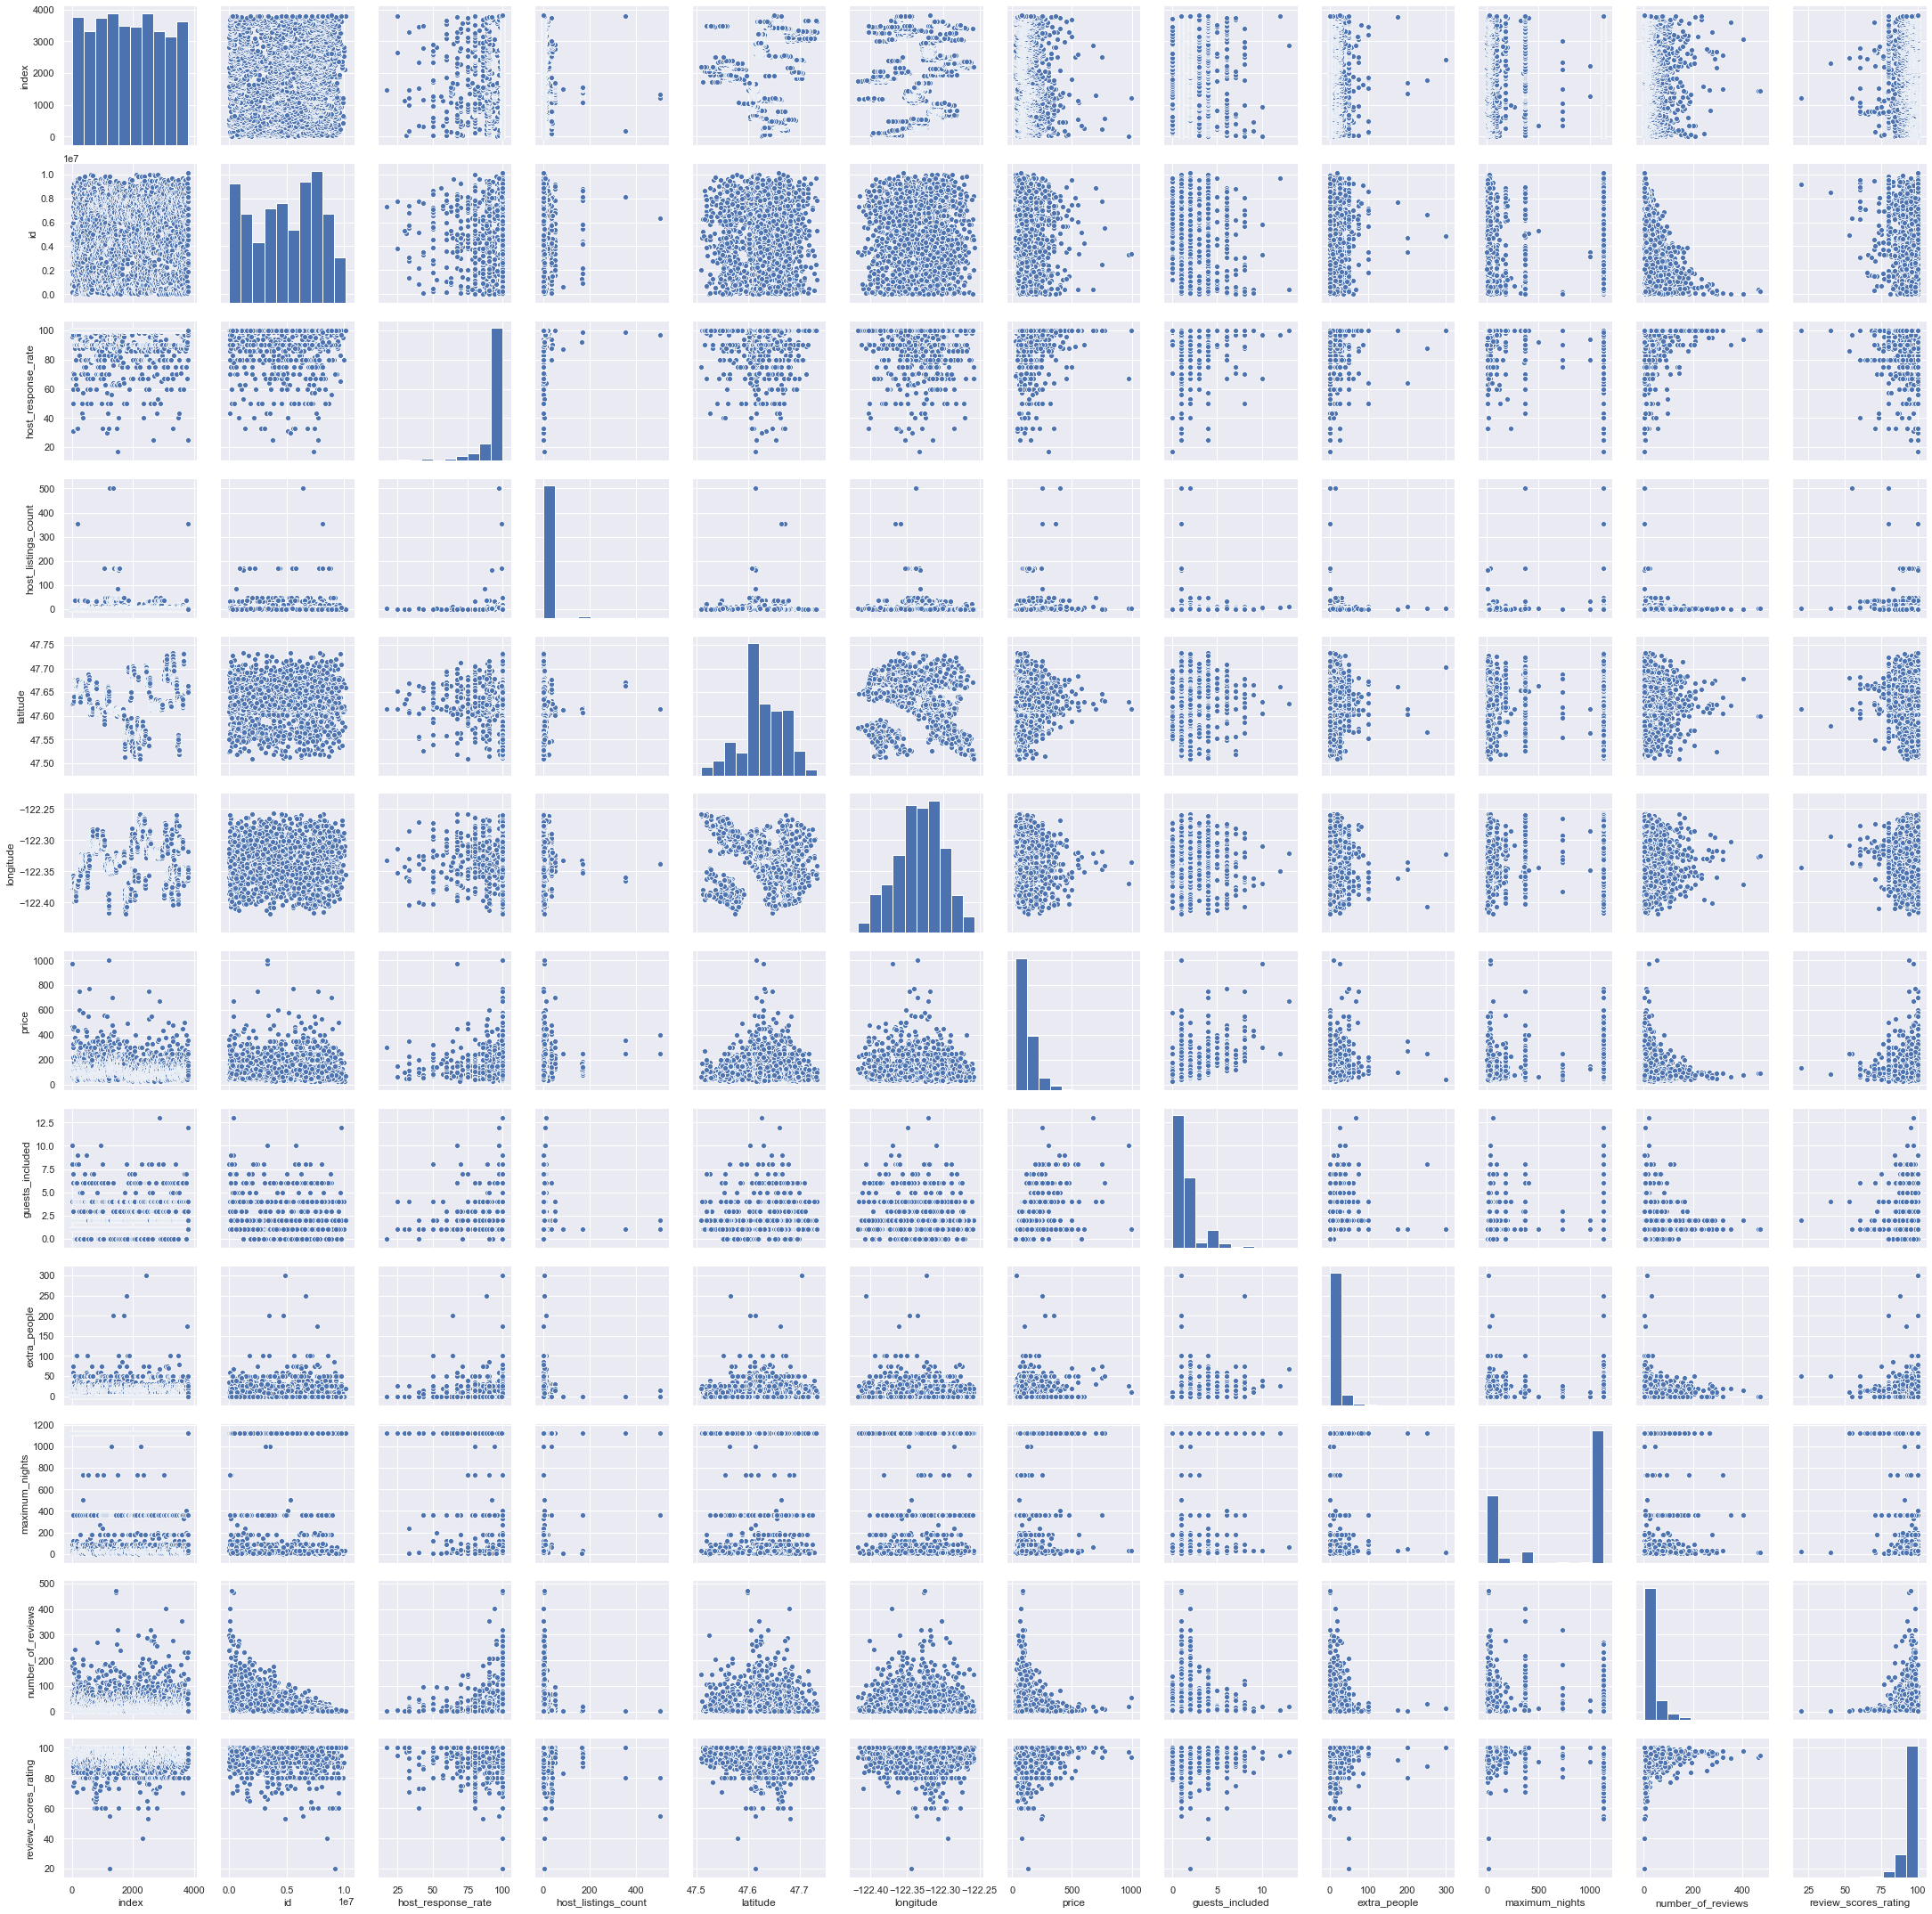

In [24]:
#printing out the pairplots for all the numerical variables
sb.pairplot(data=numerical_listings)

                         index        id  host_response_rate  \
index                 1.000000  0.027673            0.076991   
id                    0.027673  1.000000            0.020522   
host_response_rate    0.076991  0.020522            1.000000   
host_listings_count  -0.078171 -0.053362            0.005881   
latitude              0.035312 -0.020284           -0.007595   
longitude             0.074547  0.014067           -0.028775   
price                -0.103404 -0.042466           -0.030514   
guests_included      -0.009197 -0.078916            0.056176   
extra_people         -0.007478 -0.048881           -0.002776   
maximum_nights       -0.052346  0.289440           -0.070681   
number_of_reviews    -0.002635 -0.504400            0.101559   
review_scores_rating  0.021076  0.070236            0.158503   

                      host_listings_count  latitude  longitude     price  \
index                           -0.078171  0.035312   0.074547 -0.103404   
id             

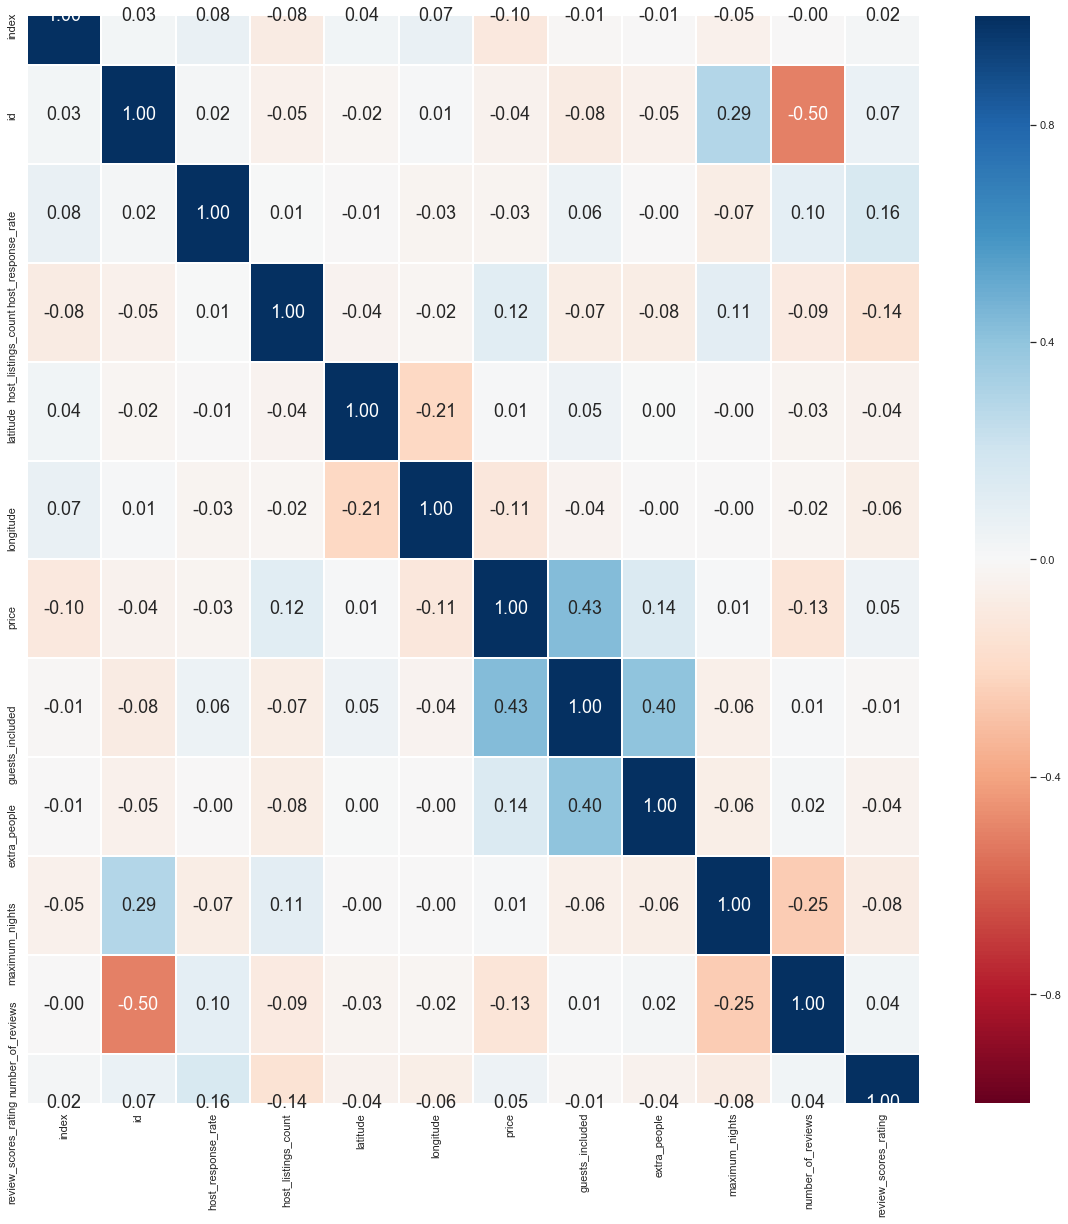

In [25]:
# Correlation Matrix
print(numerical_listings.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(numerical_listings.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

Different host_response_time :  4
within an hour        1317
within a few hours     704
within a day           358
a few days or more      20
Name: host_response_time, dtype: int64


Different host_acceptance_rate :  2
100    2398
0         1
Name: host_acceptance_rate, dtype: int64


Different host_is_superhost :  2
f    1756
t     643
Name: host_is_superhost, dtype: int64


Different host_neighbourhood :  90
Capitol Hill            266
Belltown                190
Ballard                 157
Minor                   144
Queen Anne              130
                       ... 
Clairemont Mesa East      1
South Beacon Hill         1
Northwest District        1
East Village              1
Hell's Kitchen            1
Name: host_neighbourhood, Length: 90, dtype: int64


Different host_has_profile_pic :  2
t    2396
f       3
Name: host_has_profile_pic, dtype: int64


Different host_identity_verified :  2
t    2015
f     384
Name: host_identity_verified, dtype: int64


Different neighbourhood

C:\Users\Aratrika\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Different review_scores_value :  7
10.0    1351
9.0      883
8.0      124
7.0       27
6.0       12
4.0        1
2.0        1
Name: review_scores_value, dtype: int64


Different instant_bookable :  2
f    1947
t     452
Name: instant_bookable, dtype: int64


Different cancellation_policy :  3
strict      995
moderate    863
flexible    541
Name: cancellation_policy, dtype: int64


Different require_guest_profile_picture :  2
f    2139
t     260
Name: require_guest_profile_picture, dtype: int64


Different require_guest_phone_verification :  2
f    2090
t     309
Name: require_guest_phone_verification, dtype: int64




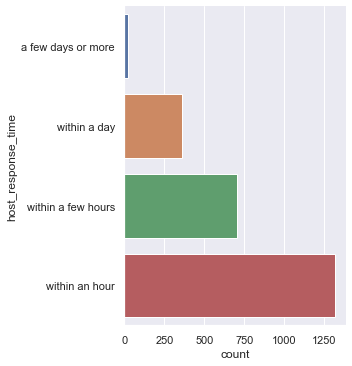

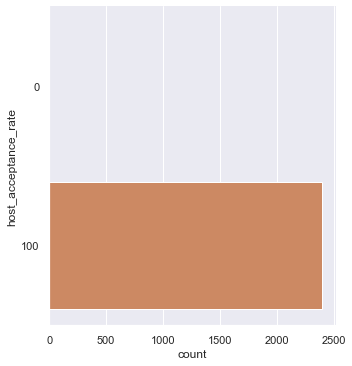

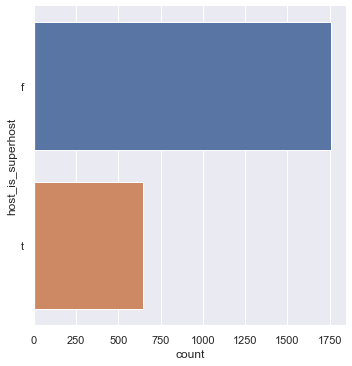

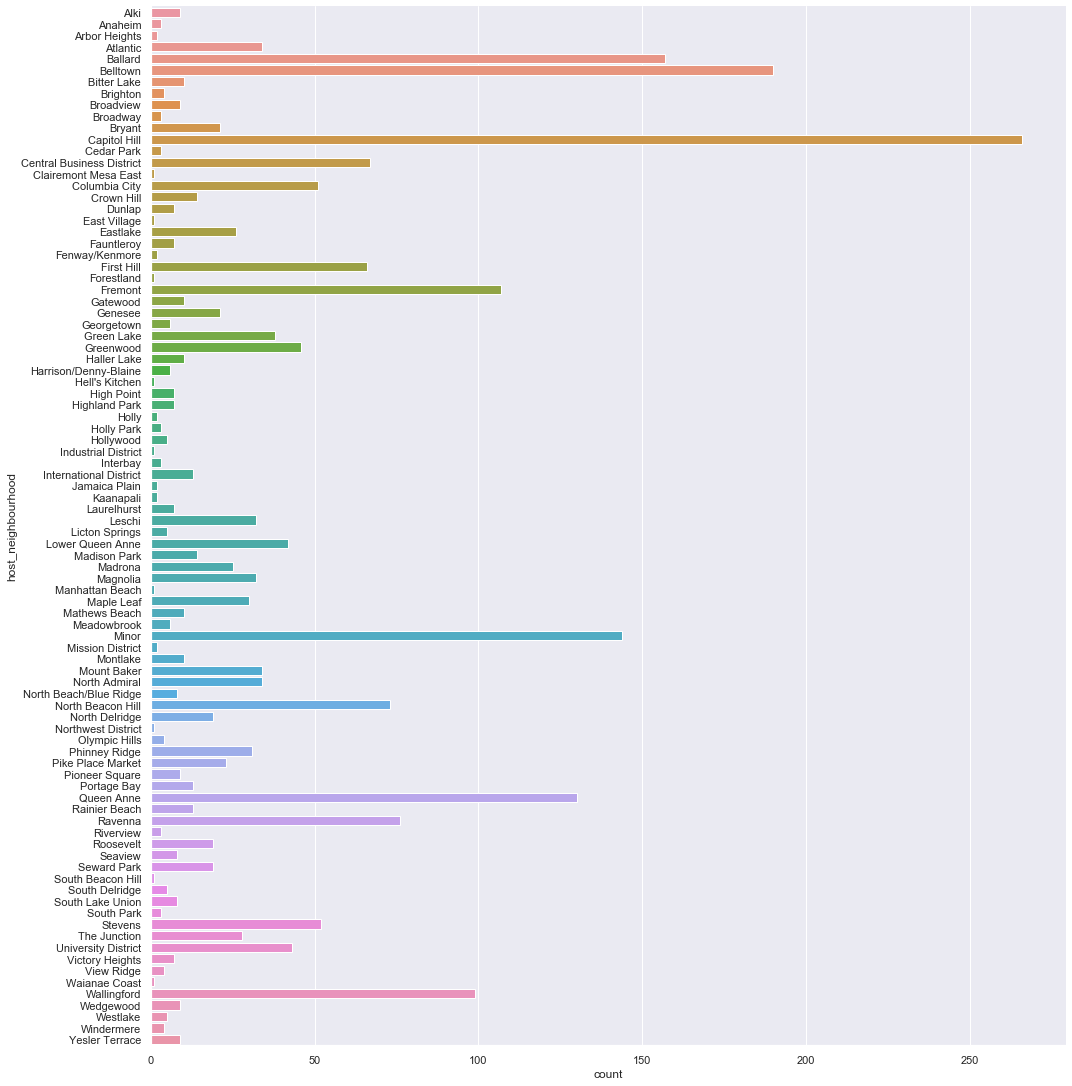

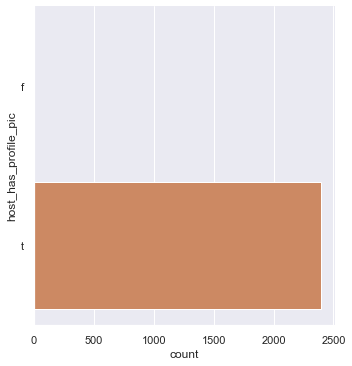

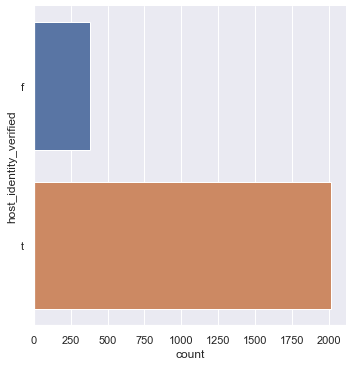

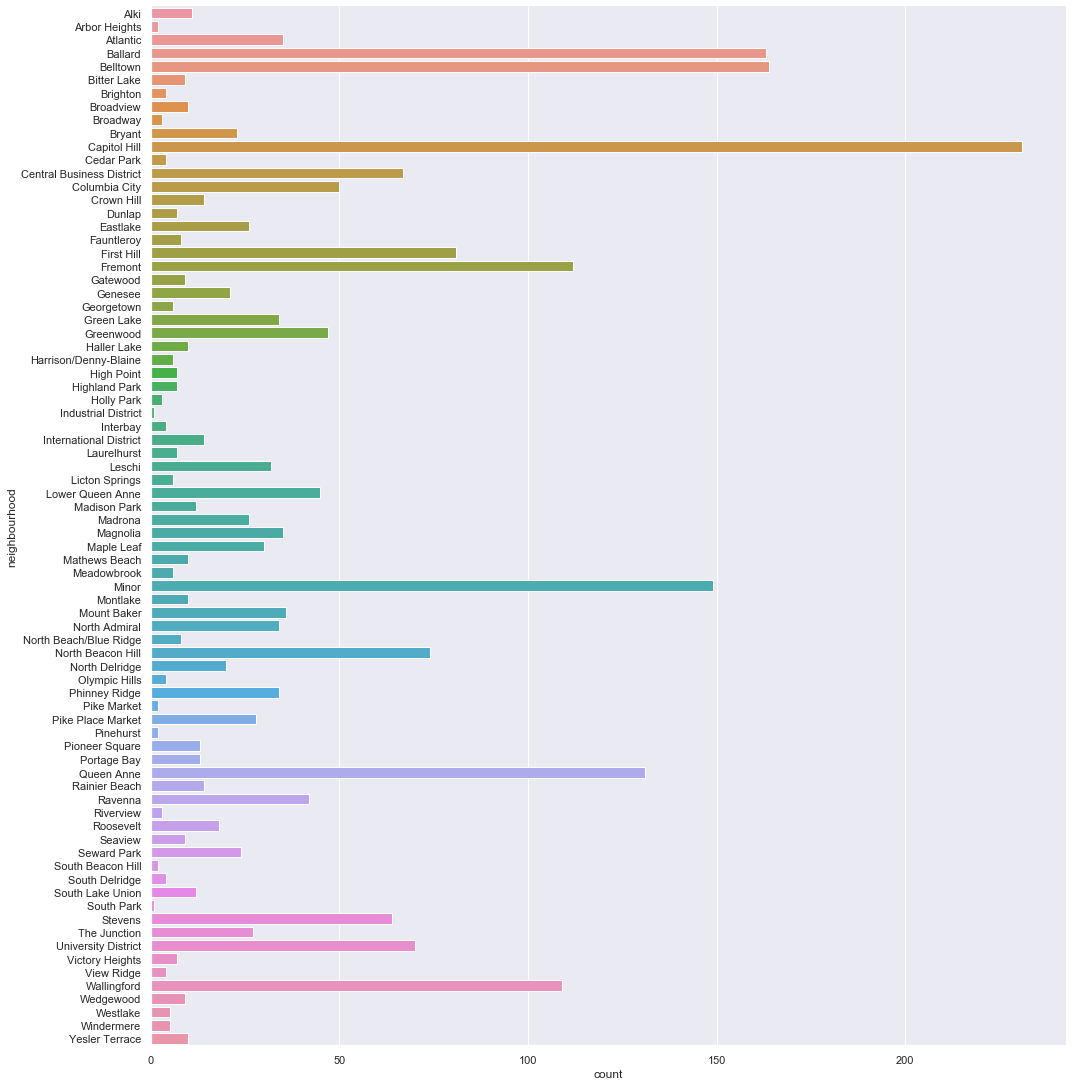

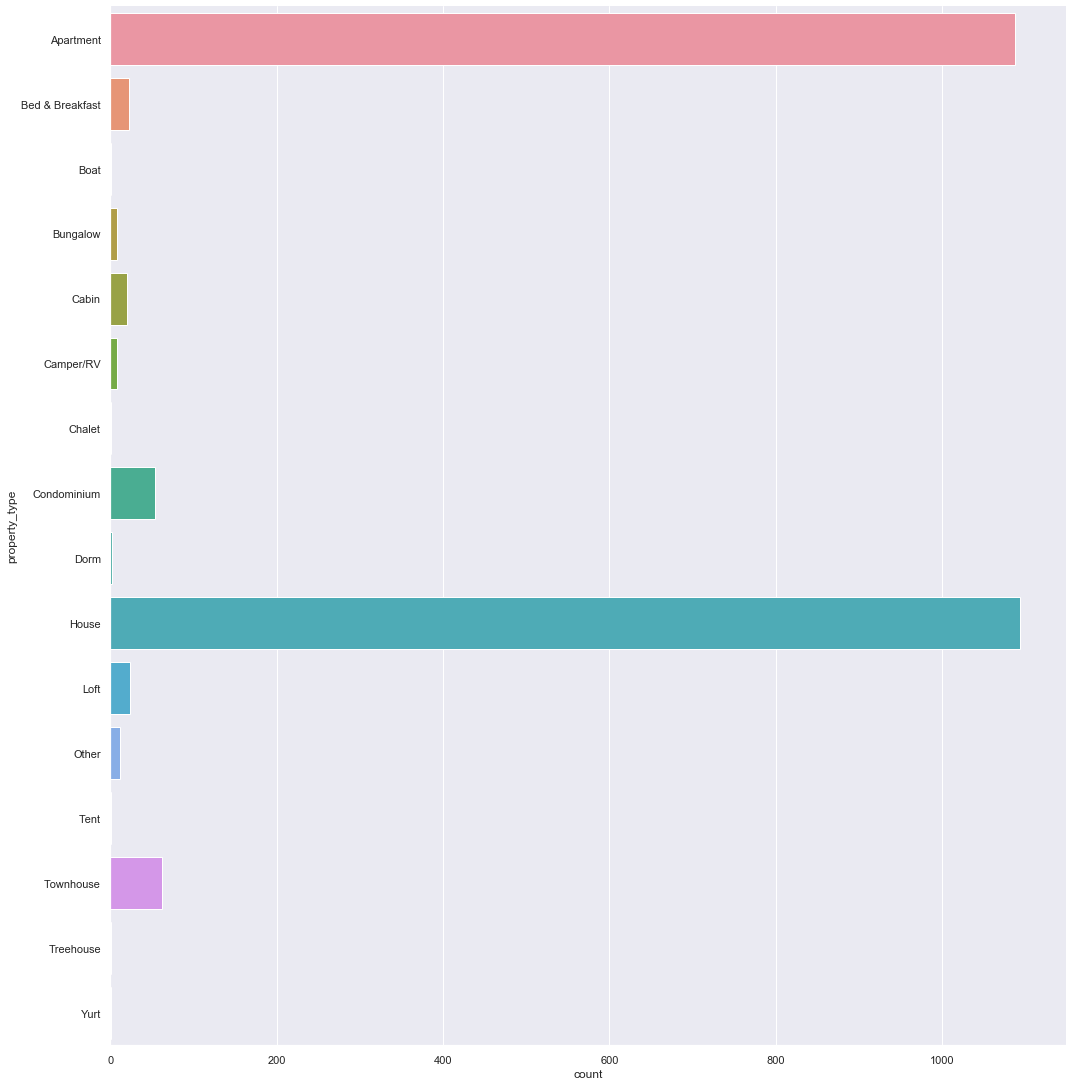

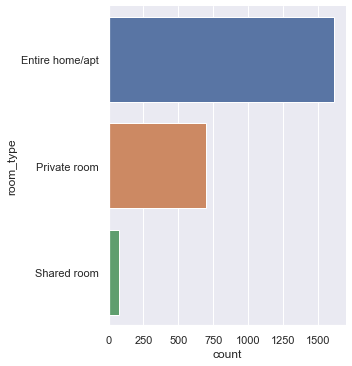

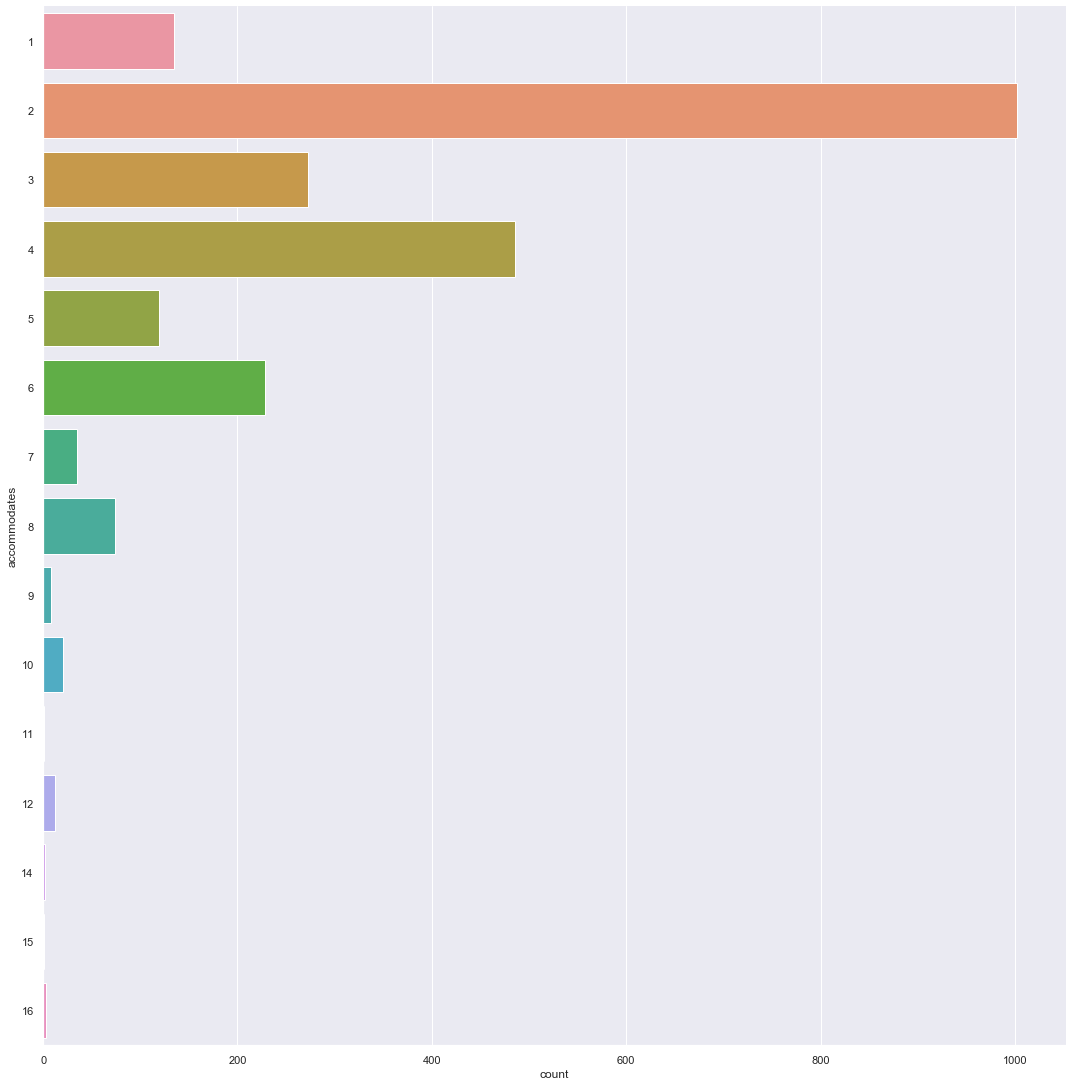

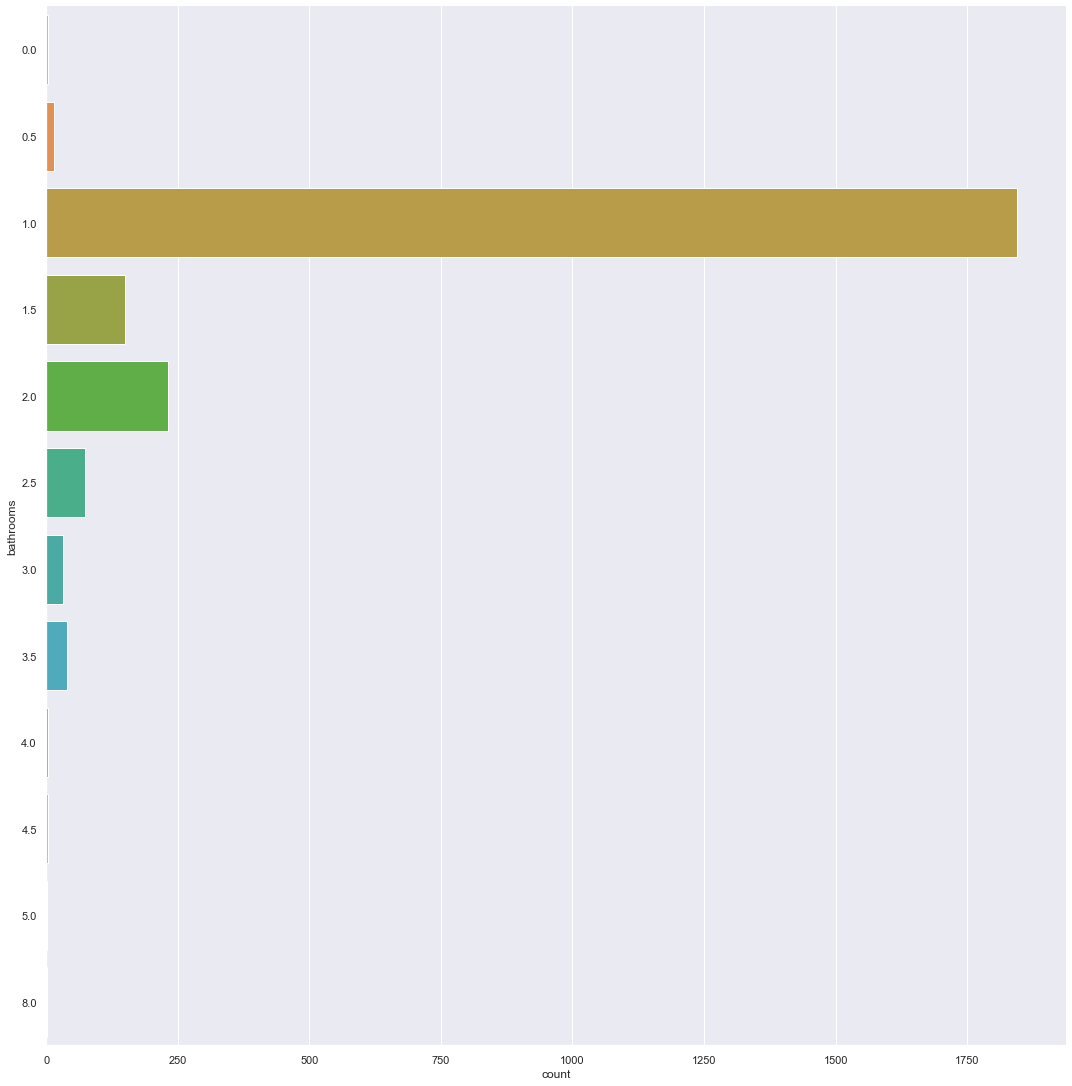

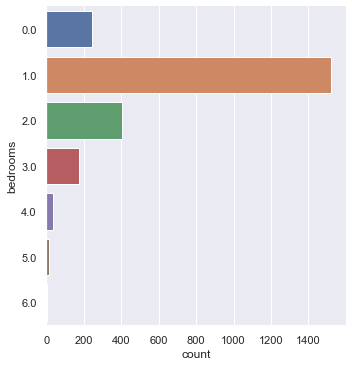

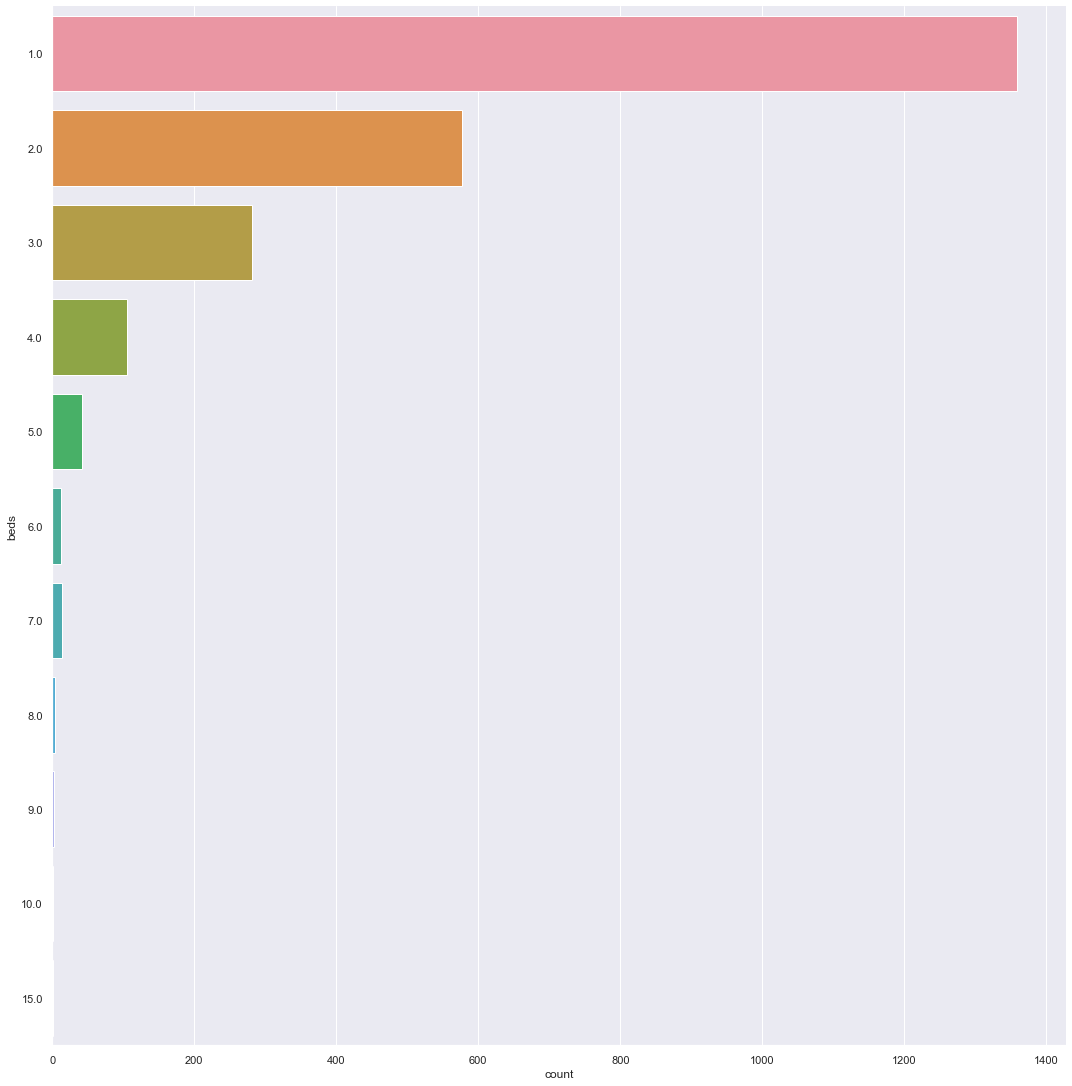

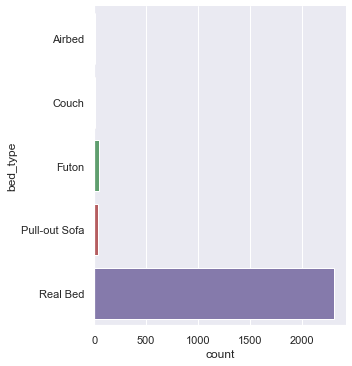

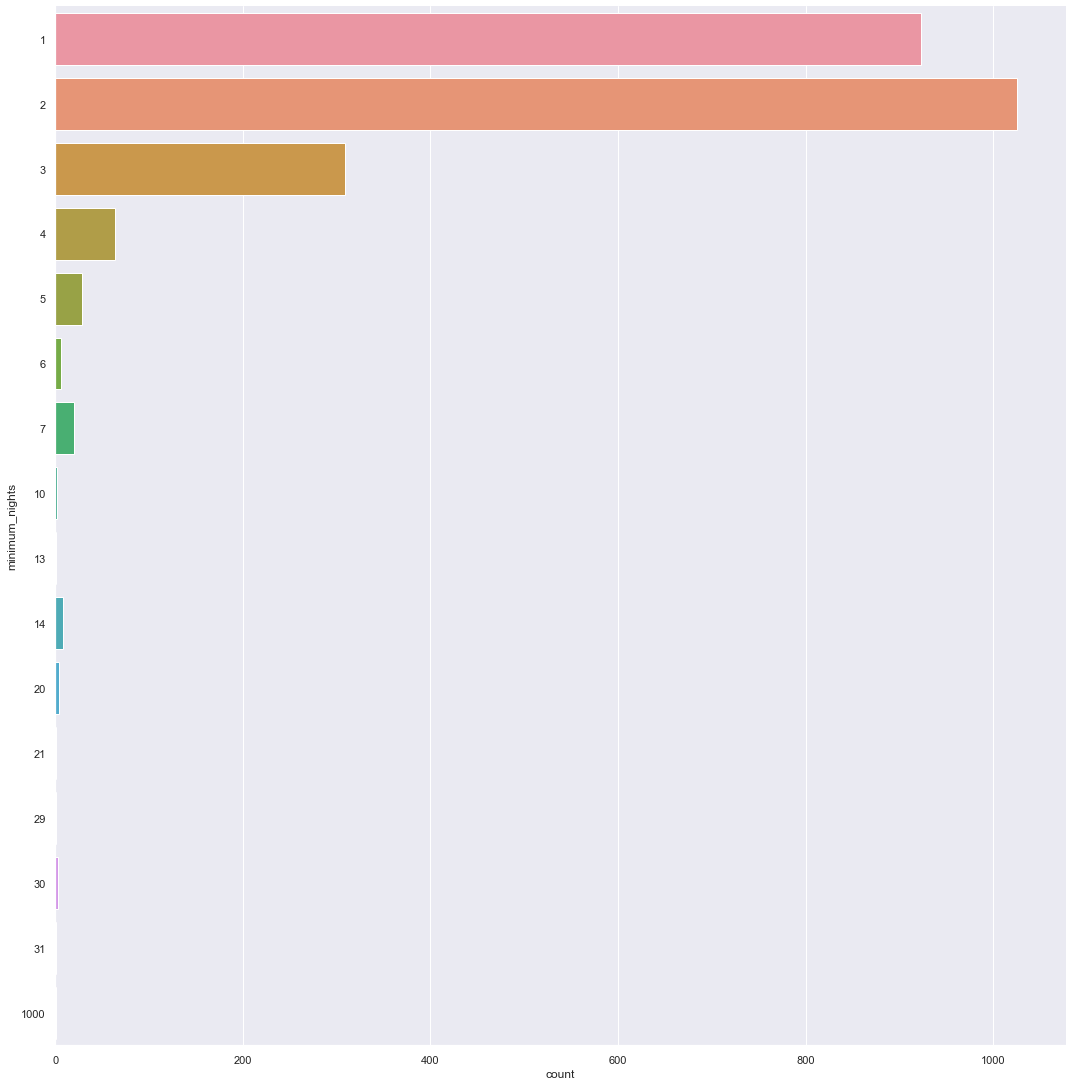

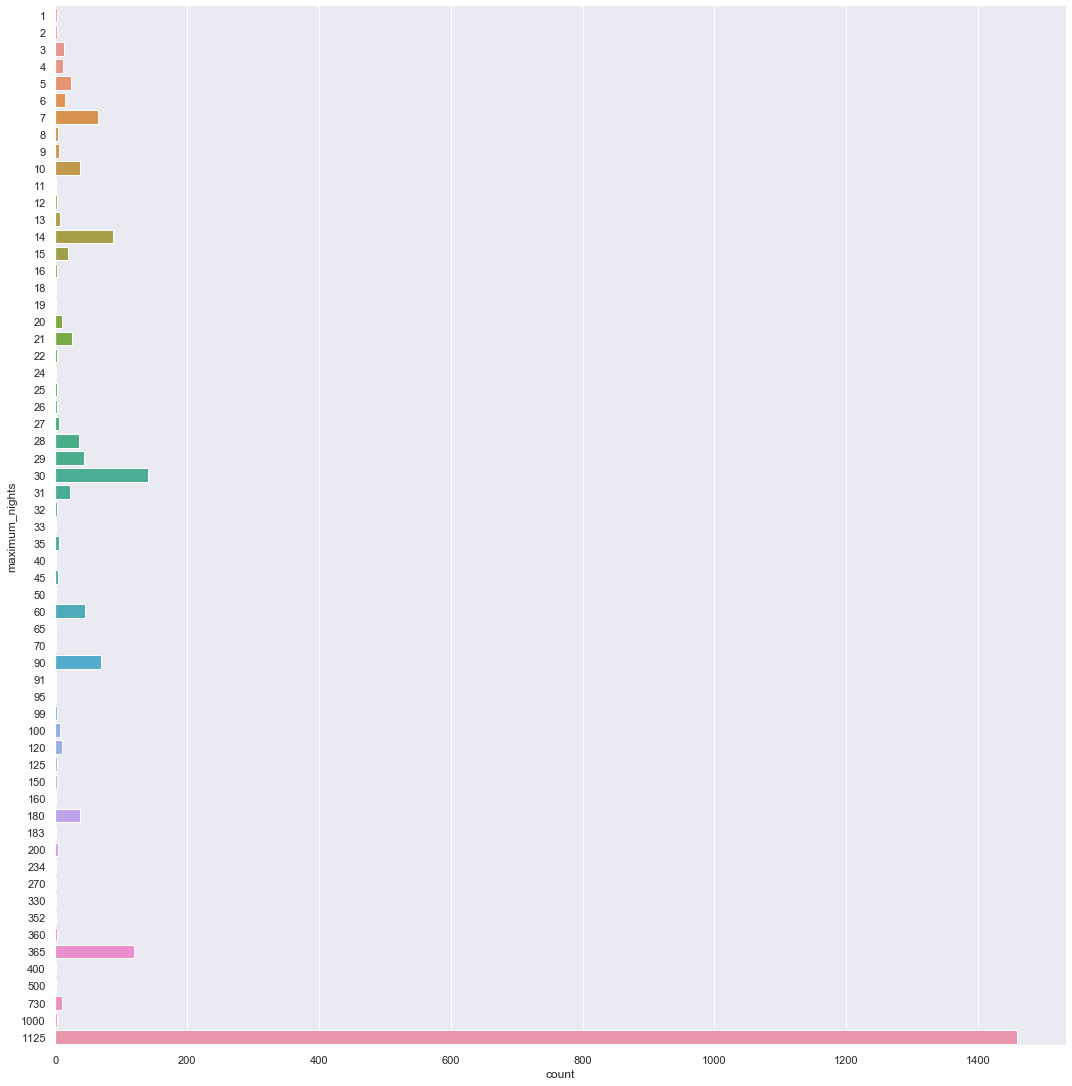

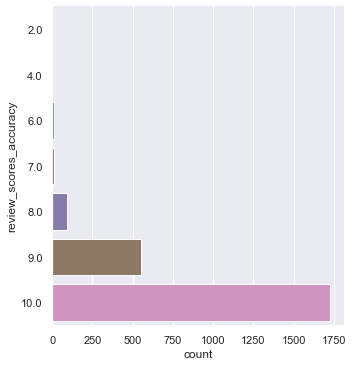

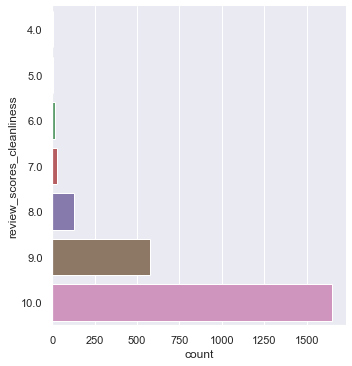

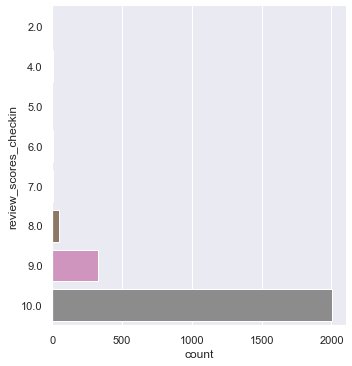

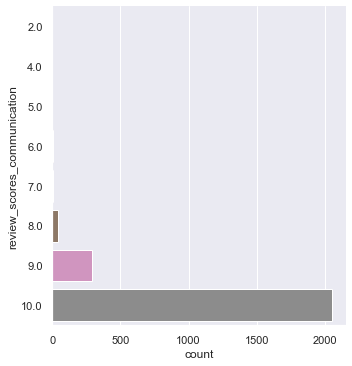

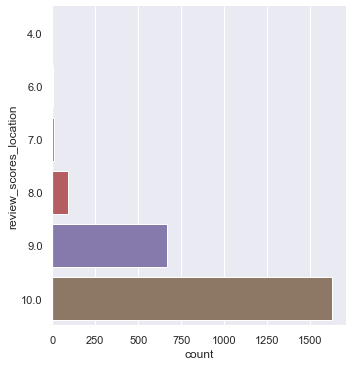

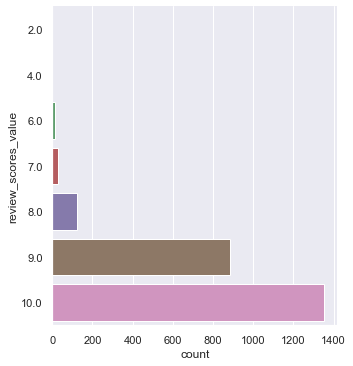

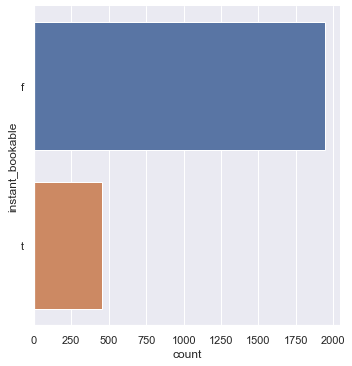

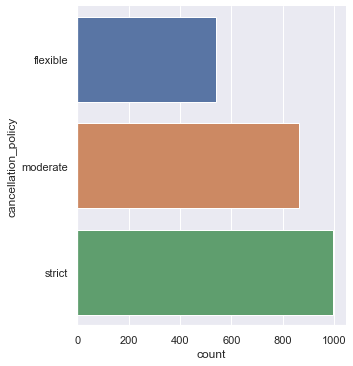

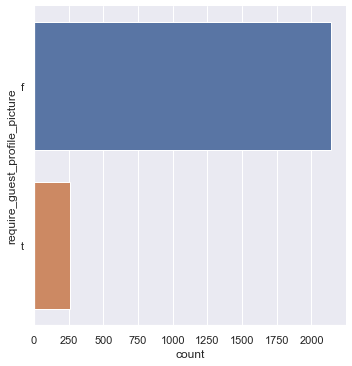

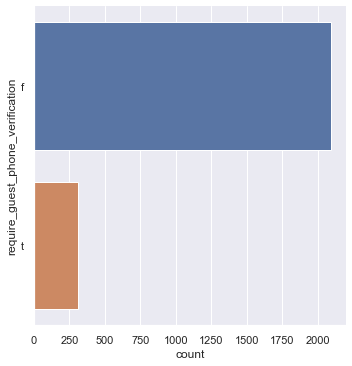

In [29]:
#exploratory data analysis of the categorical variables is done
for (column_name, column_data) in categorical_listings.iteritems():
  if(column_name!="price"):
    #the number of different categories and the counts of each are printed
    print("Different "+column_name+" : ", len(categorical_listings[column_name].unique()))
    print(categorical_listings[column_name].value_counts())
    print() 
    print()
  #plotting a catplot to denote the distribution of the categorical variable
    if(len(categorical_listings[column_name].unique())>8):
      sb.catplot(y = column_name, data = categorical_listings, kind = "count", height=15)
    else:
      sb.catplot(y = column_name, data = categorical_listings, kind = "count")

C:\Users\Aratrika\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aratrika\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aratrika\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the py

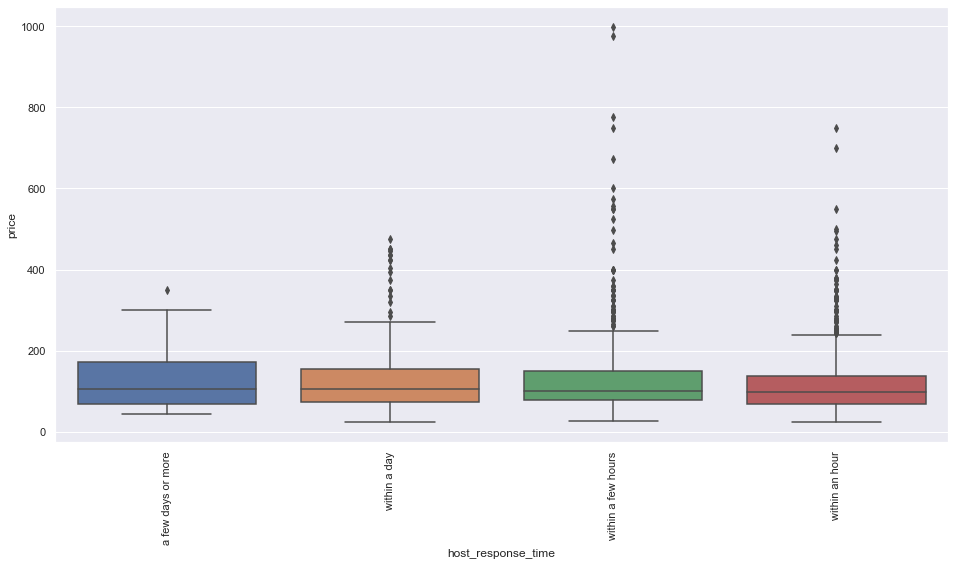

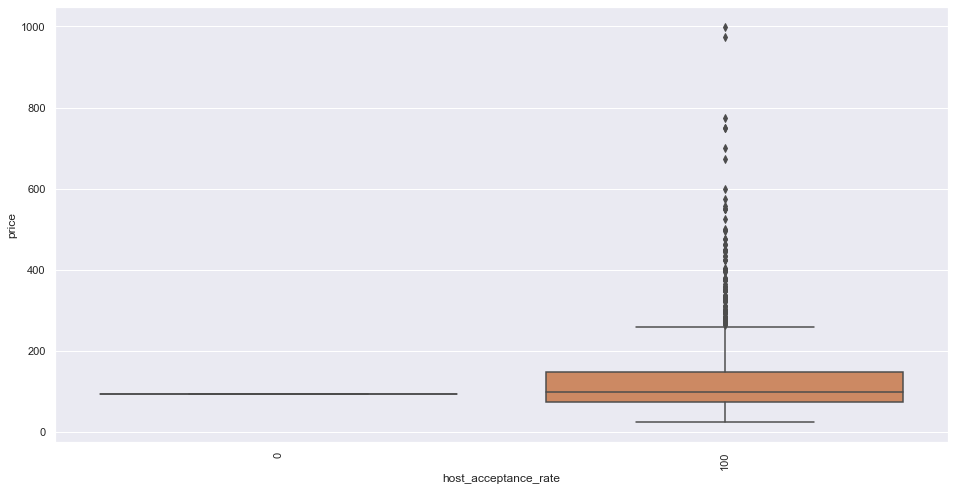

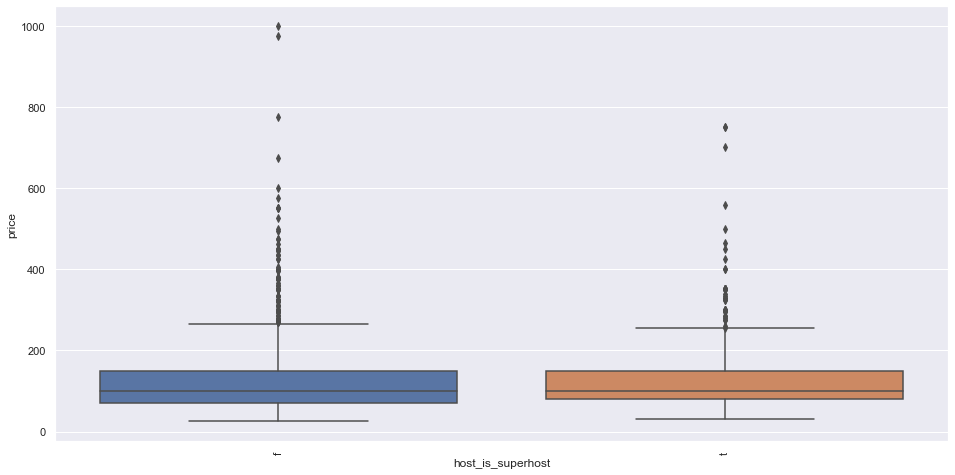

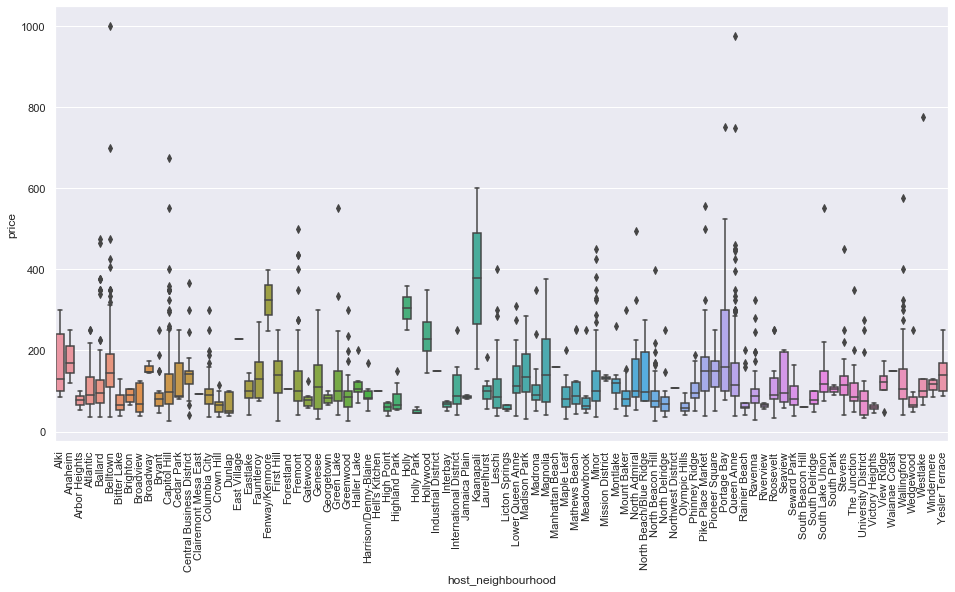

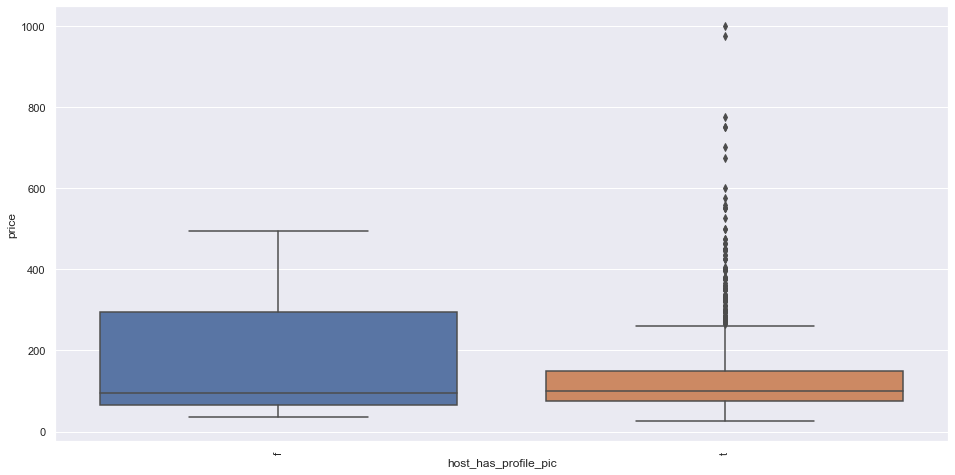

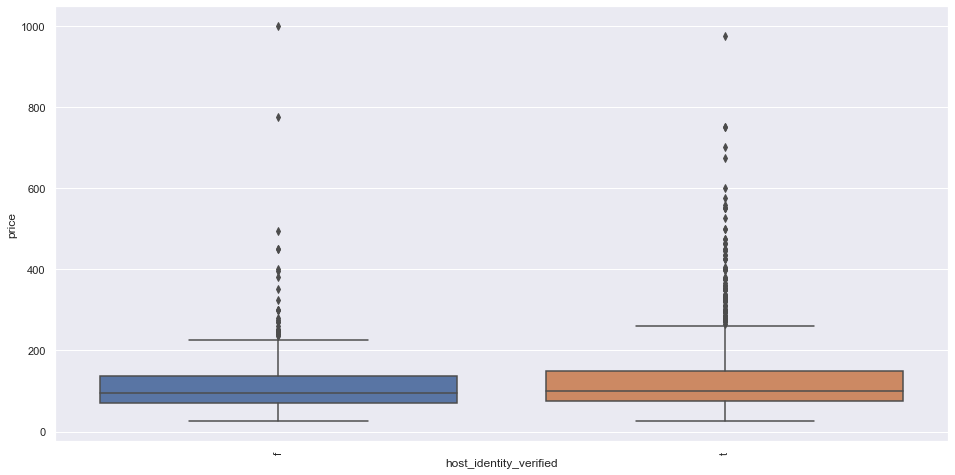

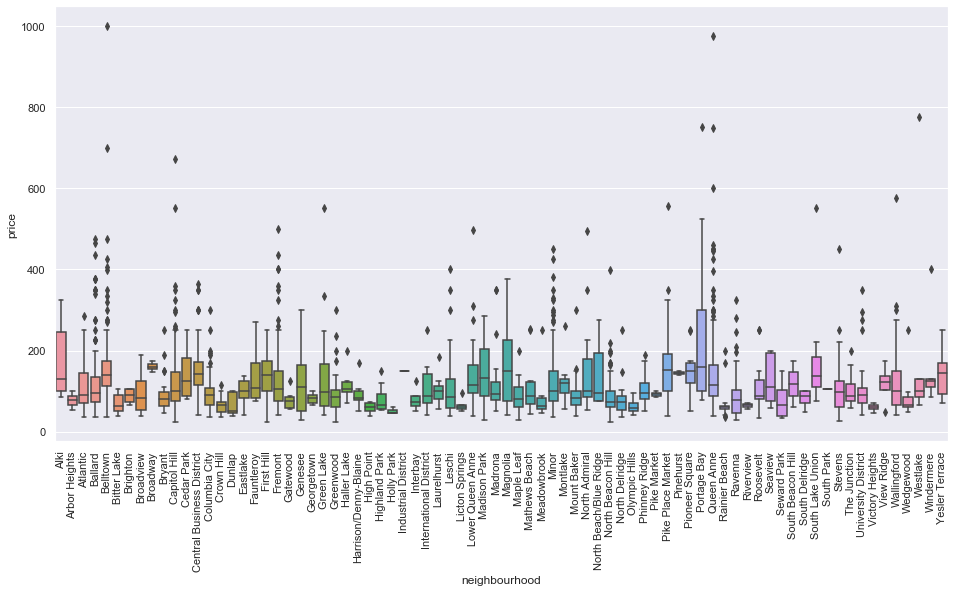

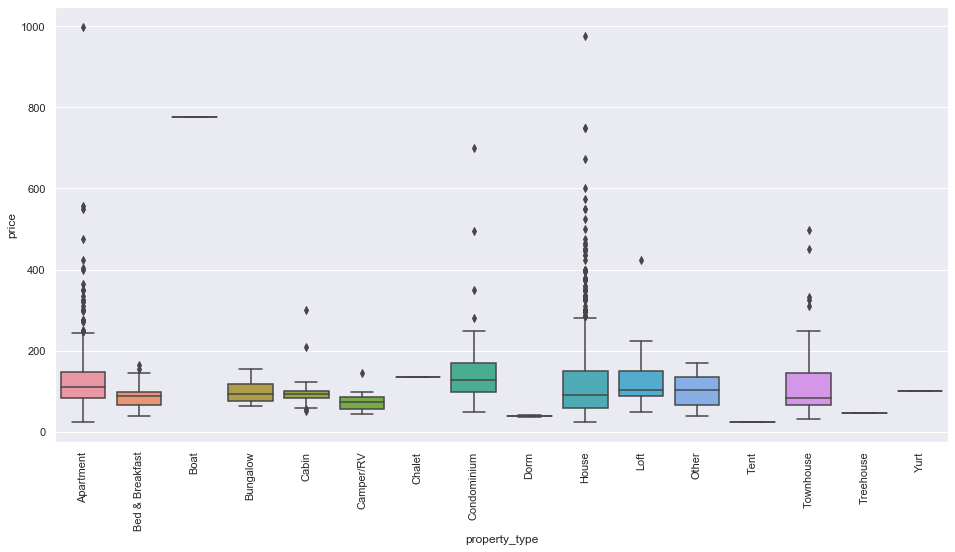

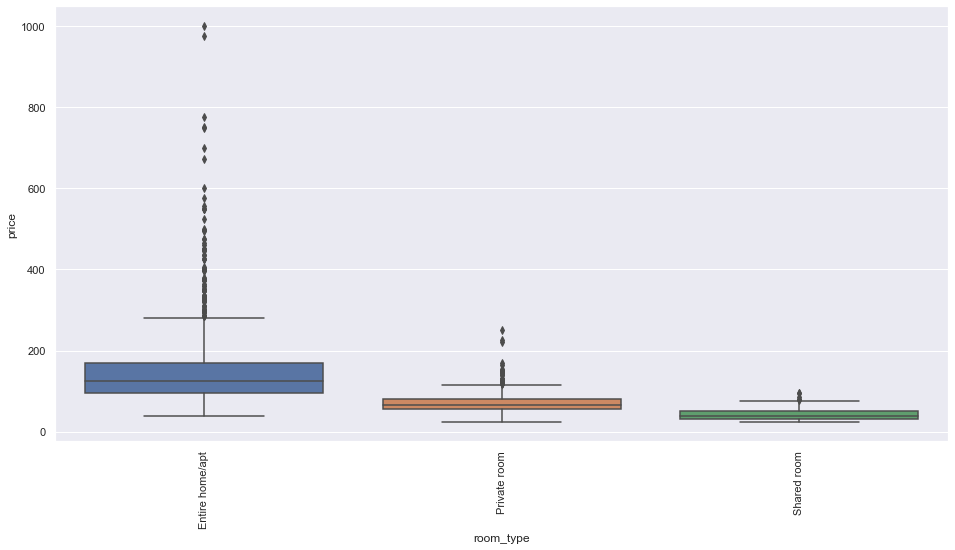

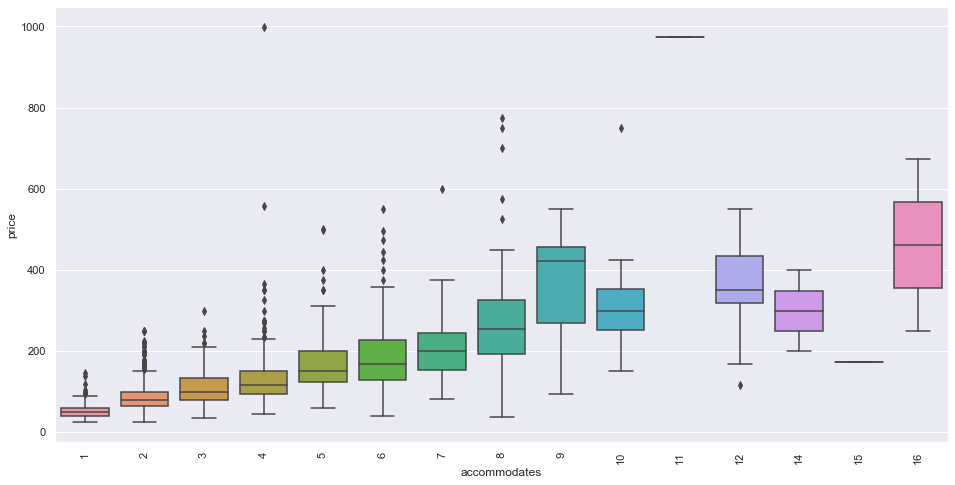

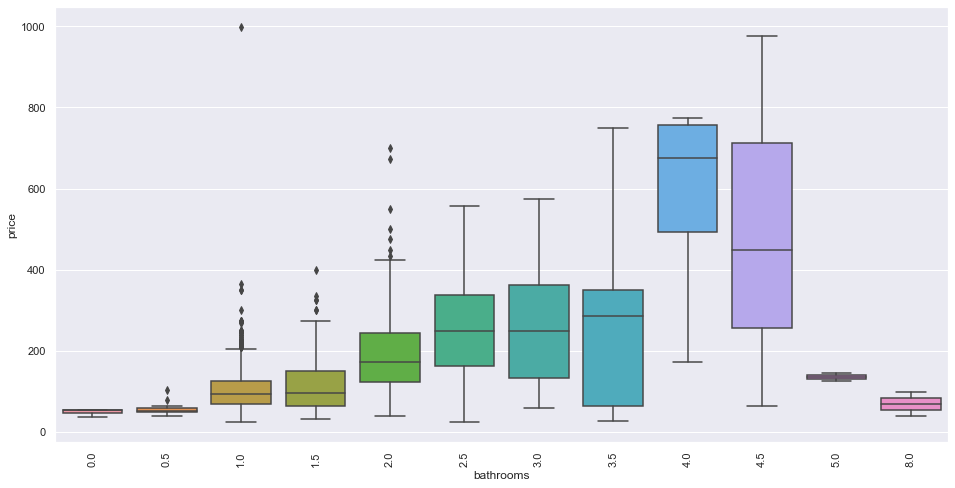

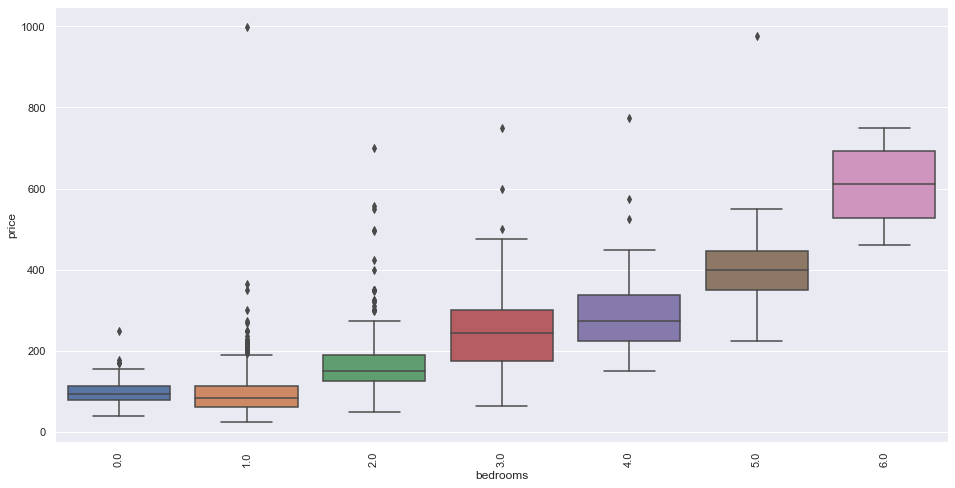

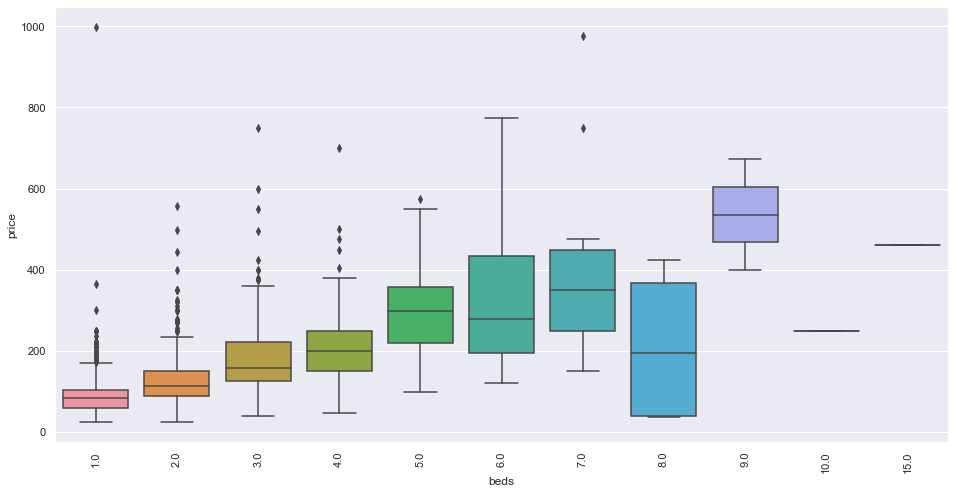

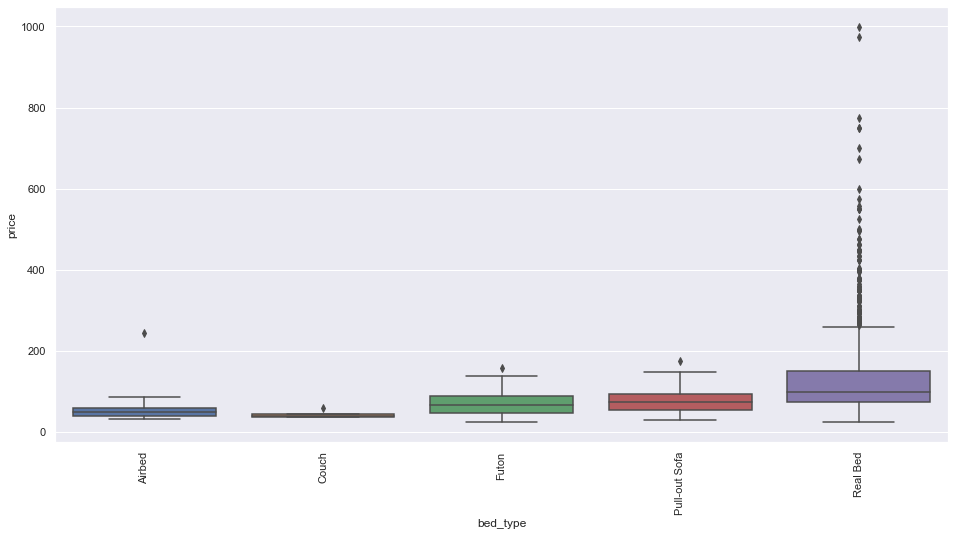

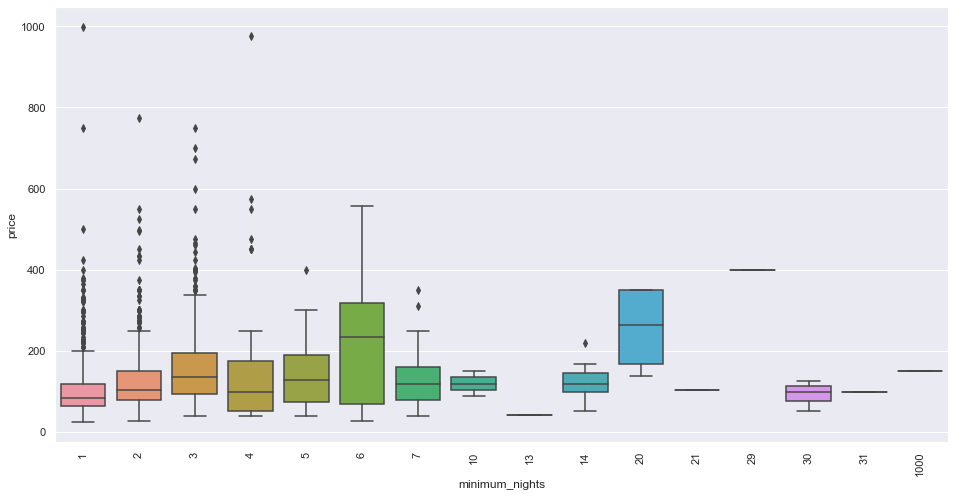

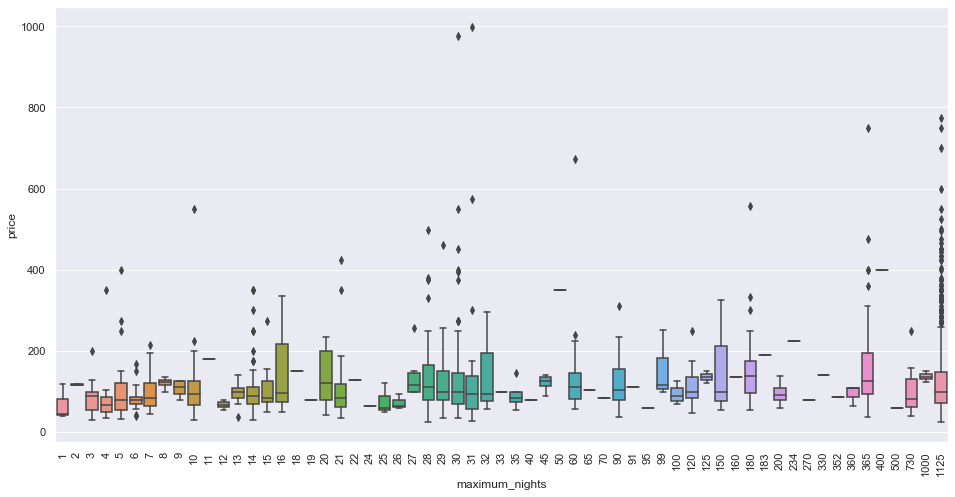

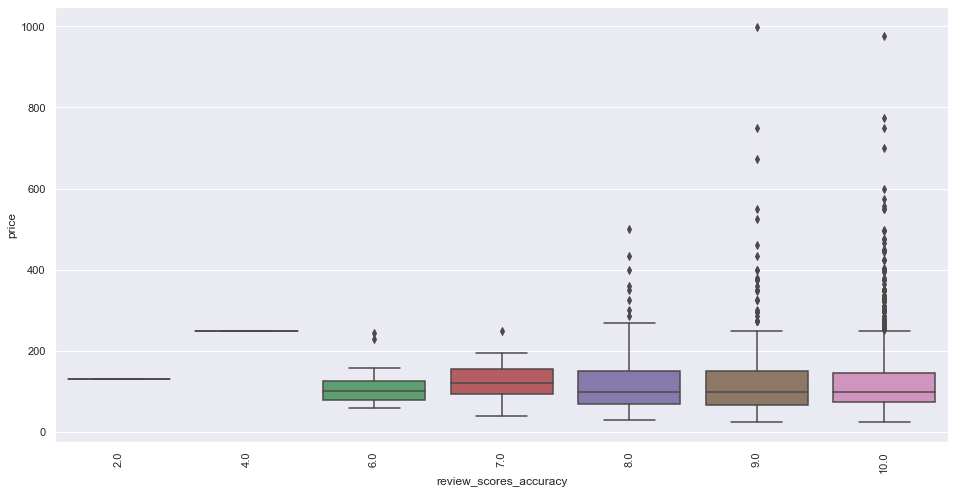

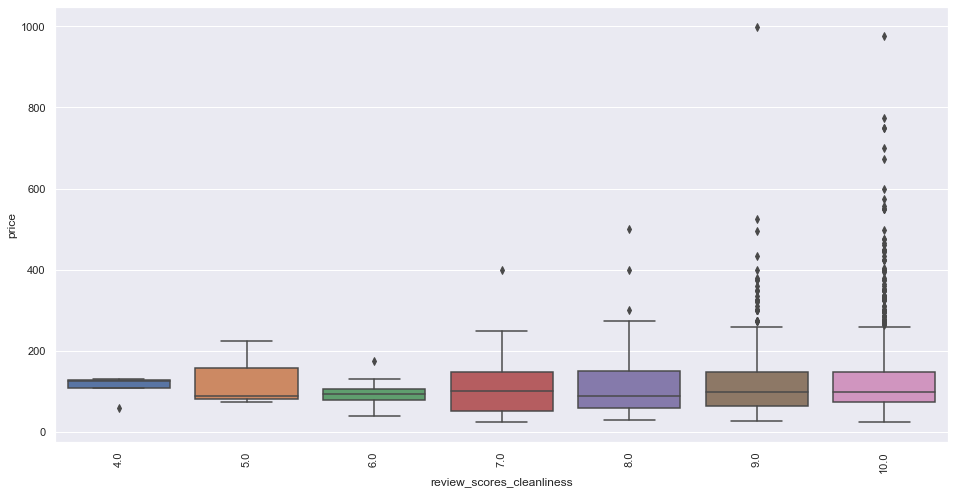

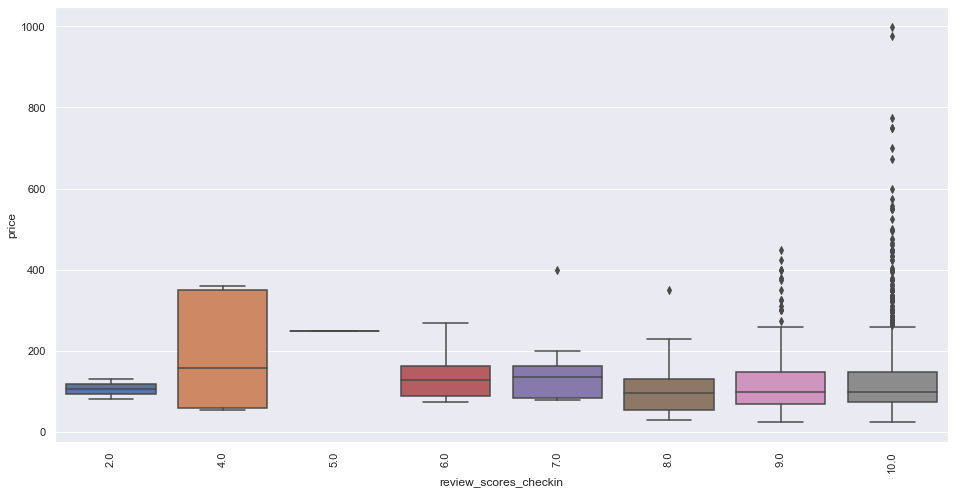

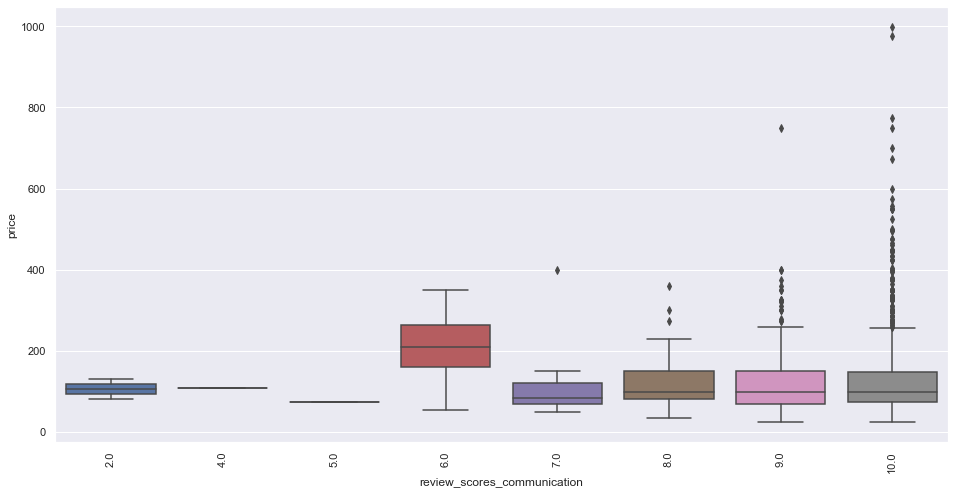

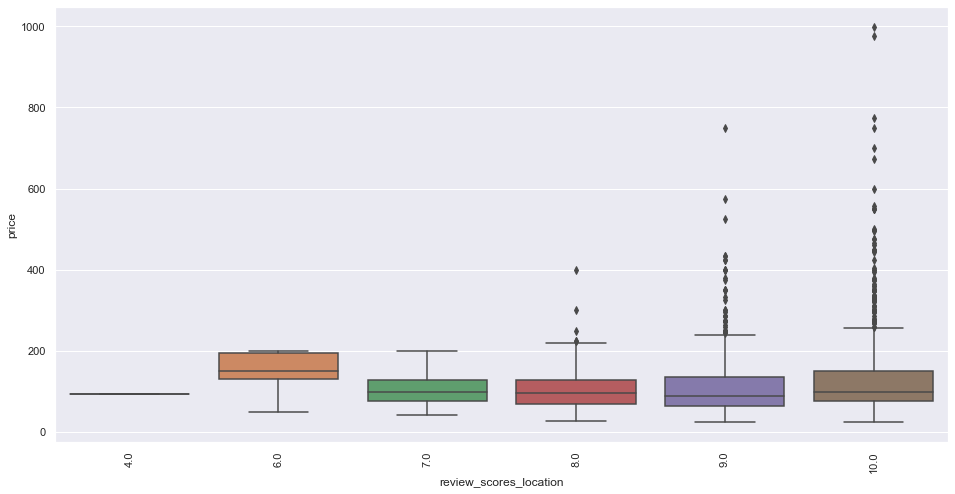

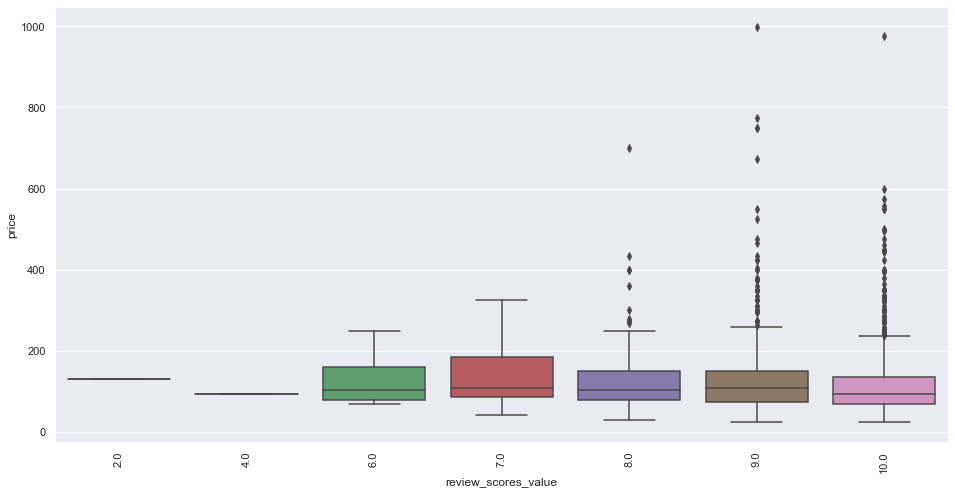

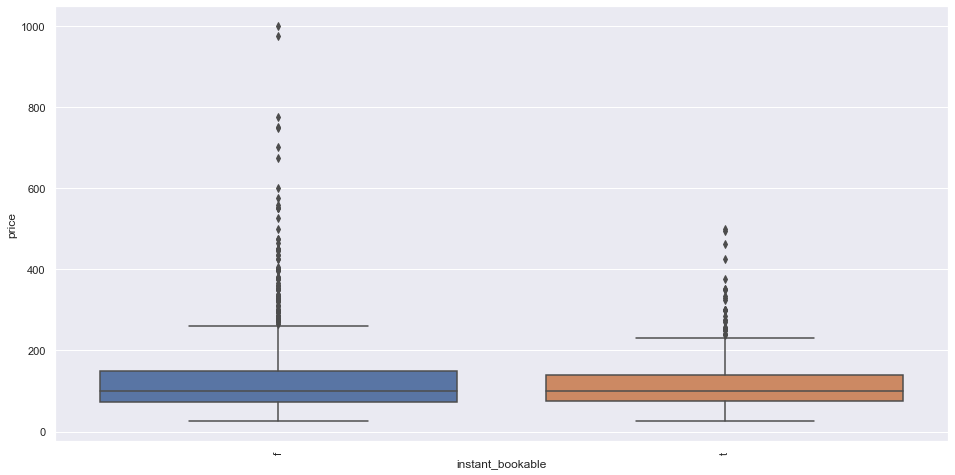

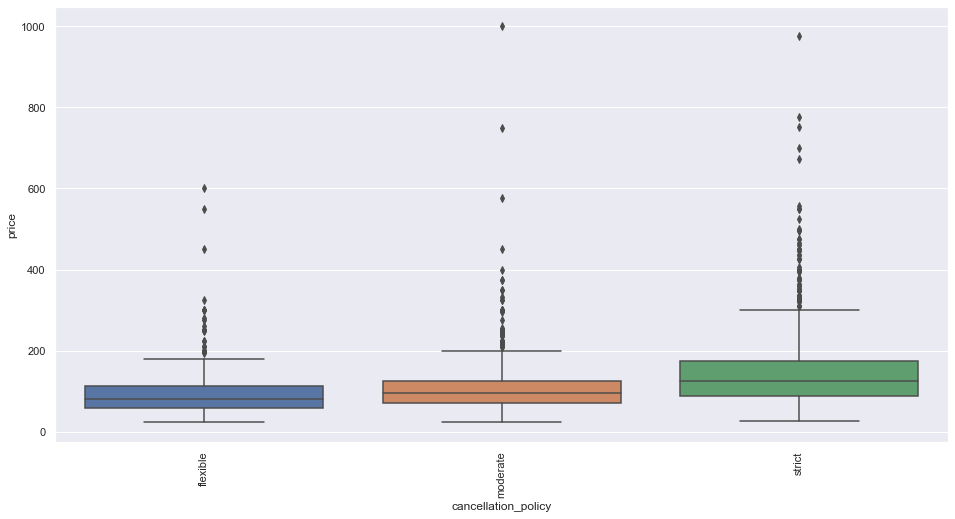

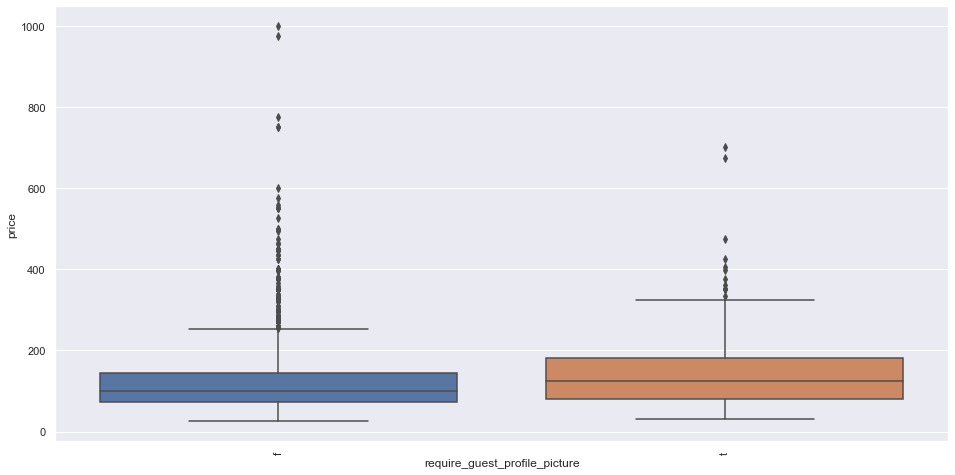

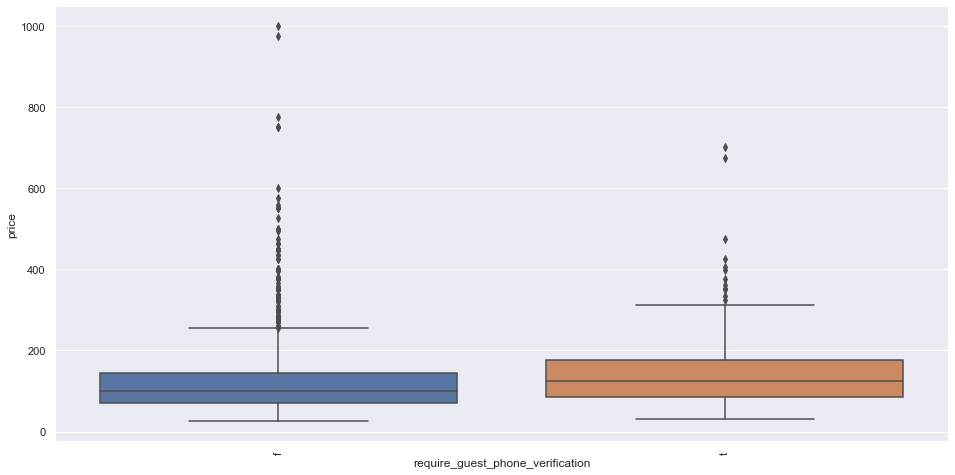

In [30]:
#printing the boxplots of all the categorical variables vs price
for (column_name, column_data) in categorical_listings.iteritems():
  if(column_name!="price"):
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    sb.boxplot(x = column_name, y = 'price', data = categorical_listings)
    plt.xticks(rotation=90)
    
    

C:\Users\Aratrika\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

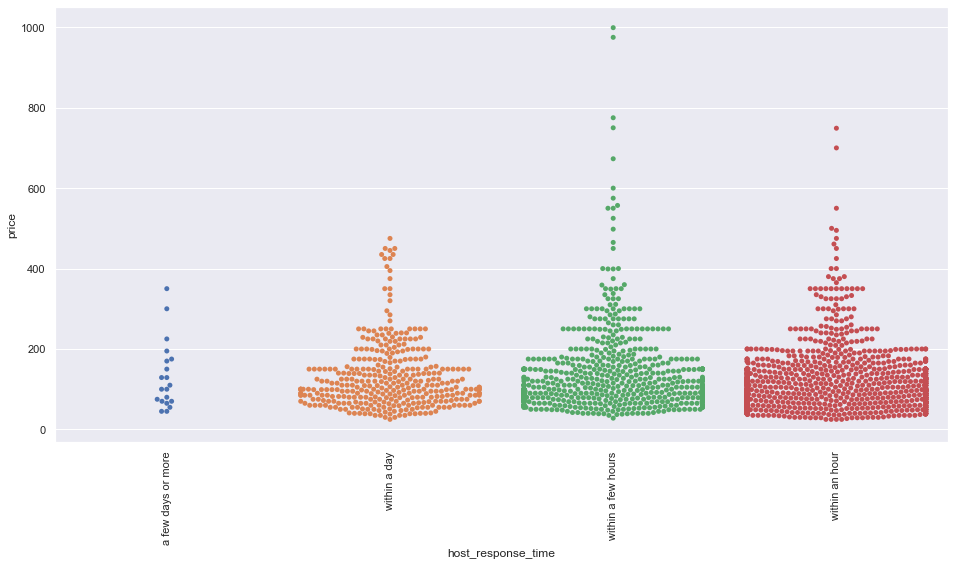

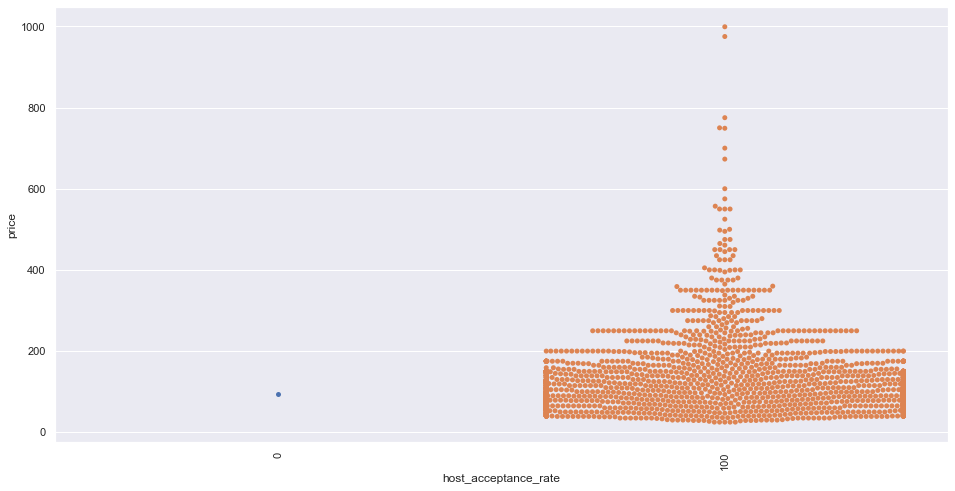

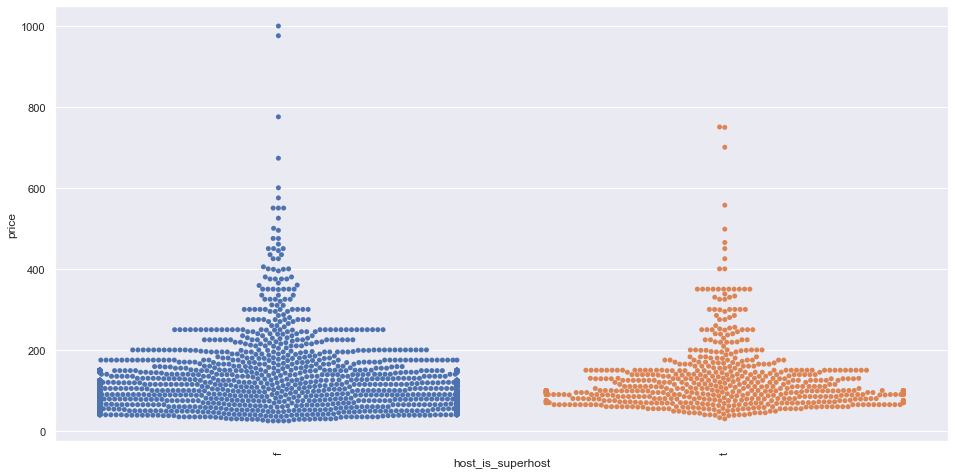

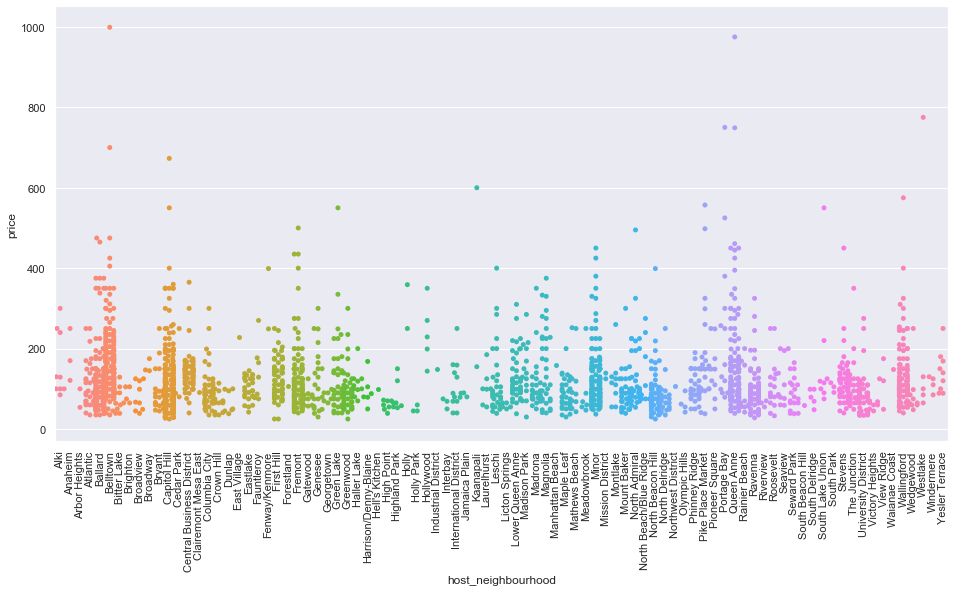

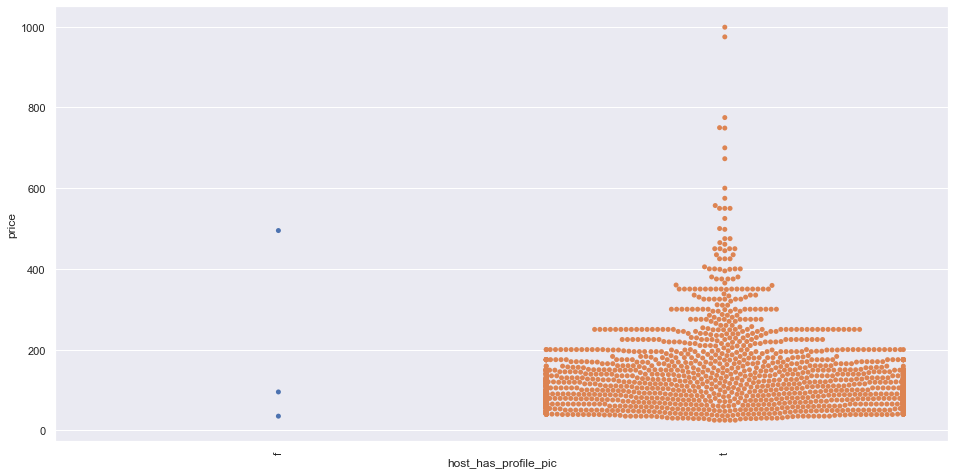

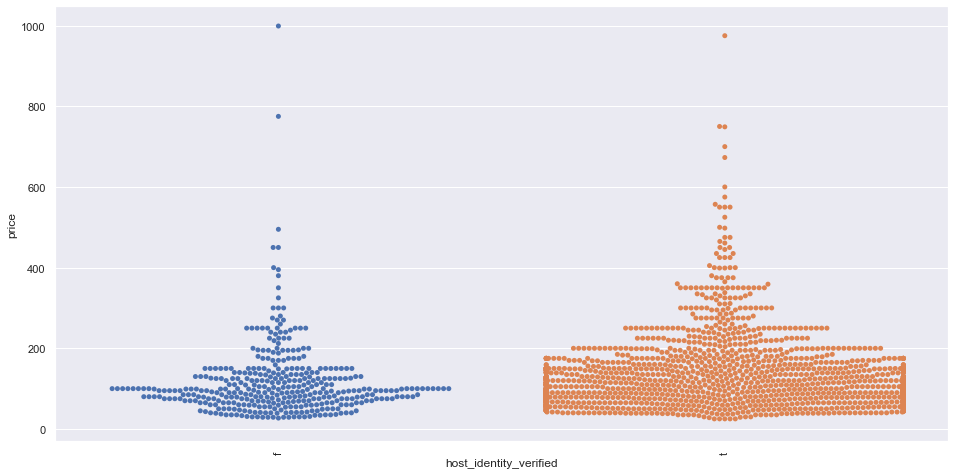

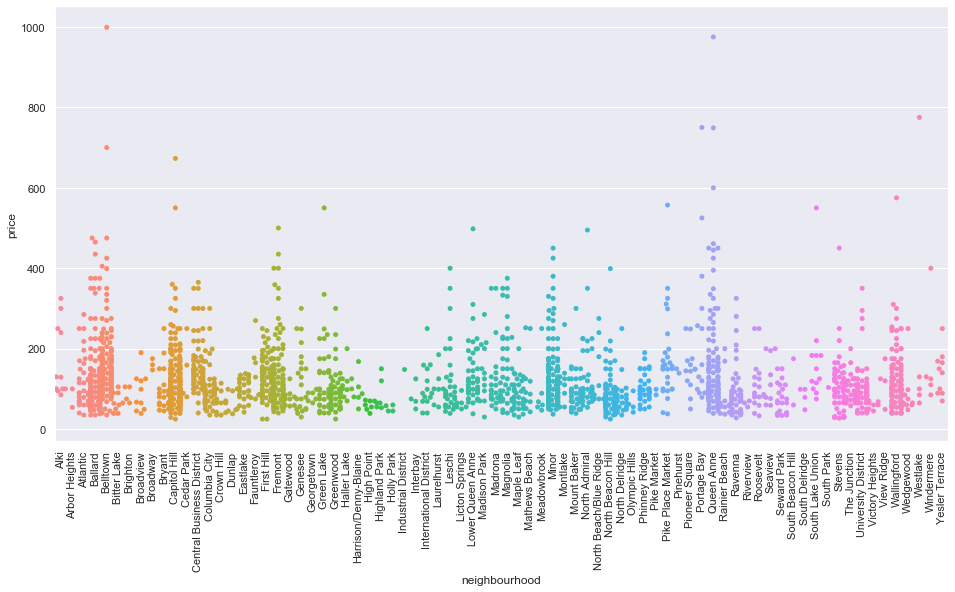

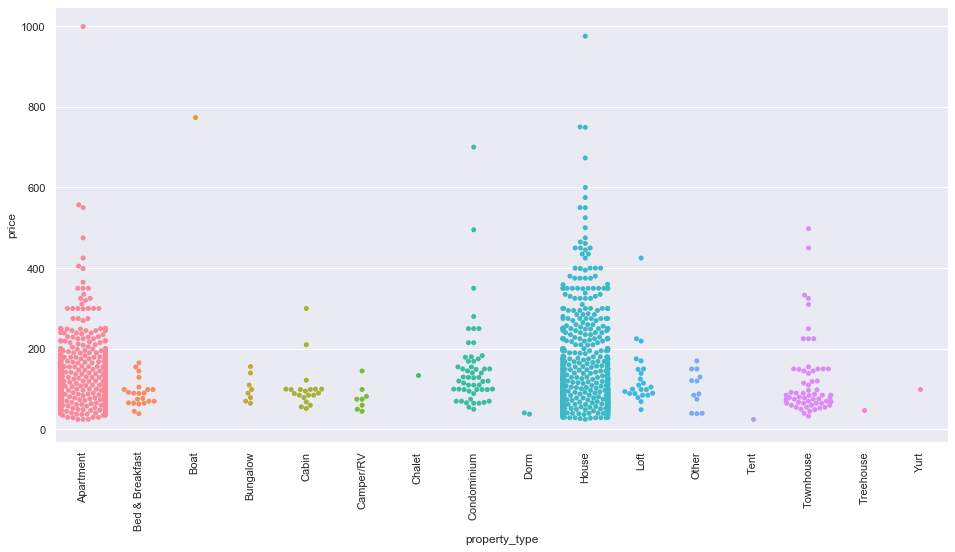

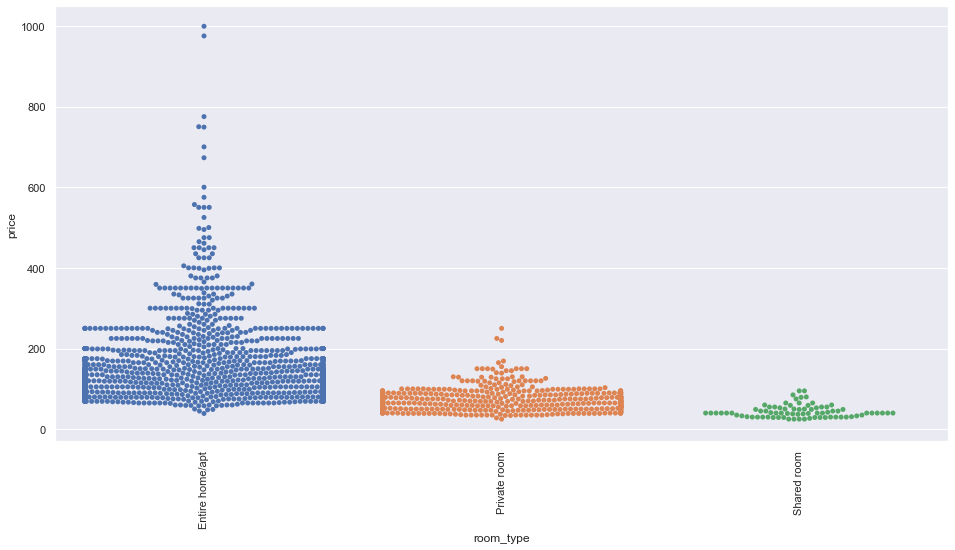

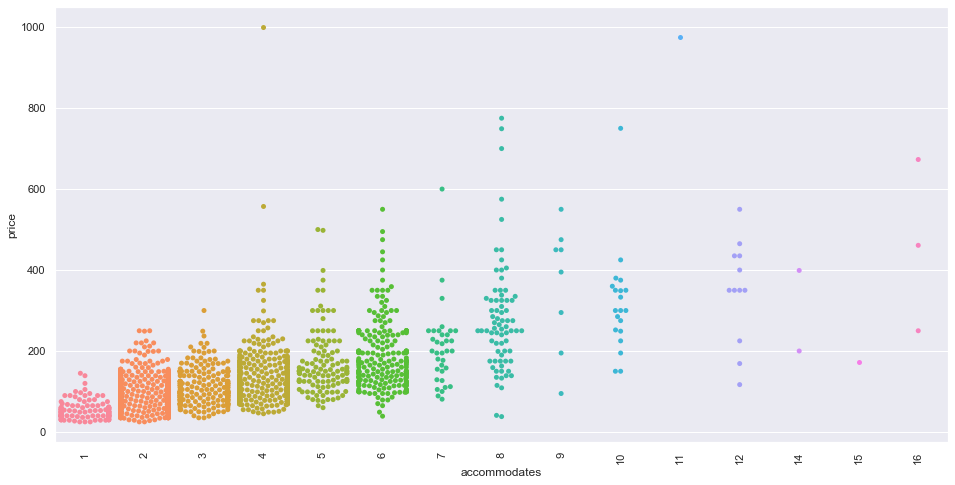

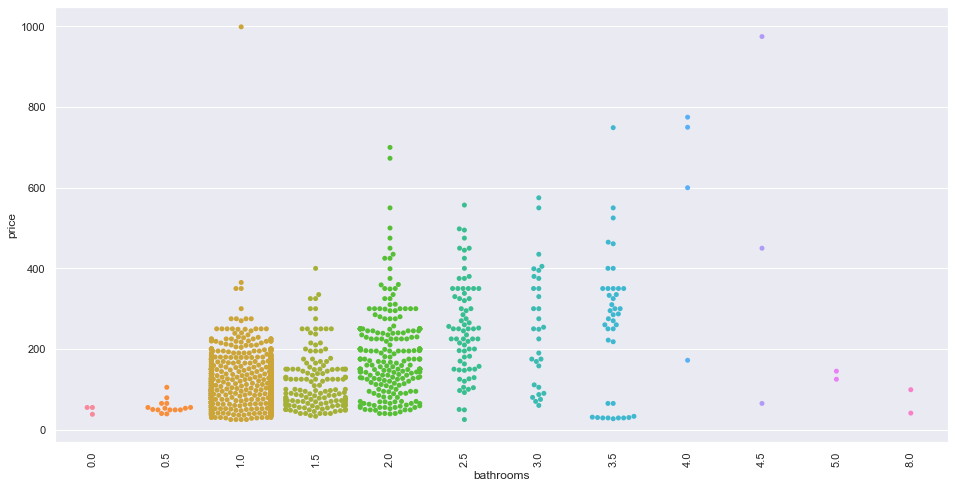

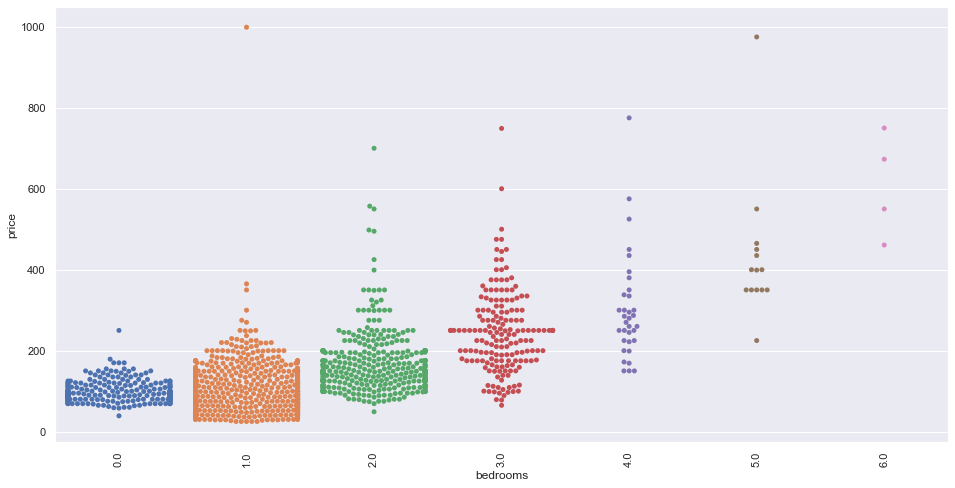

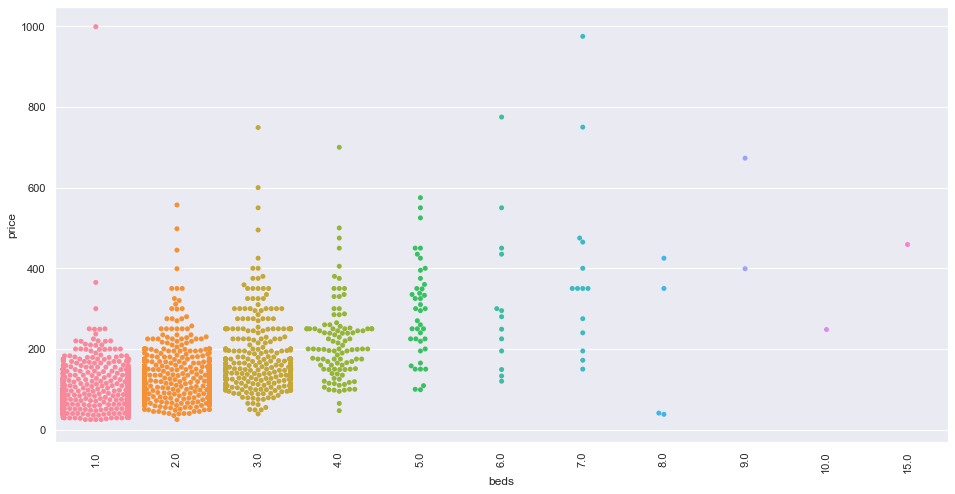

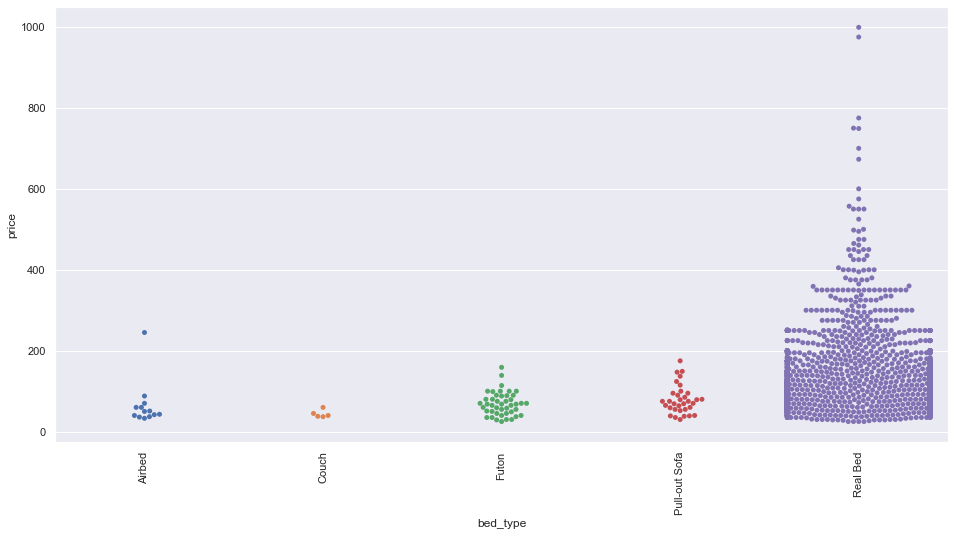

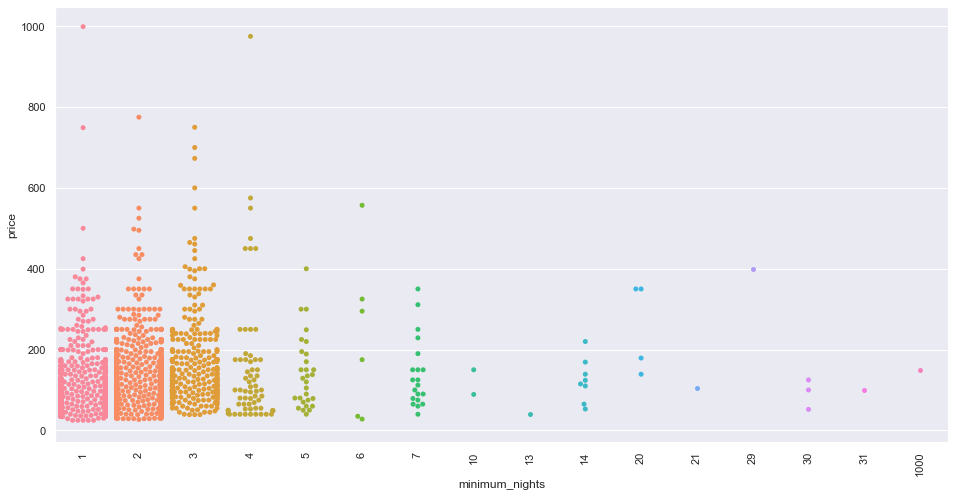

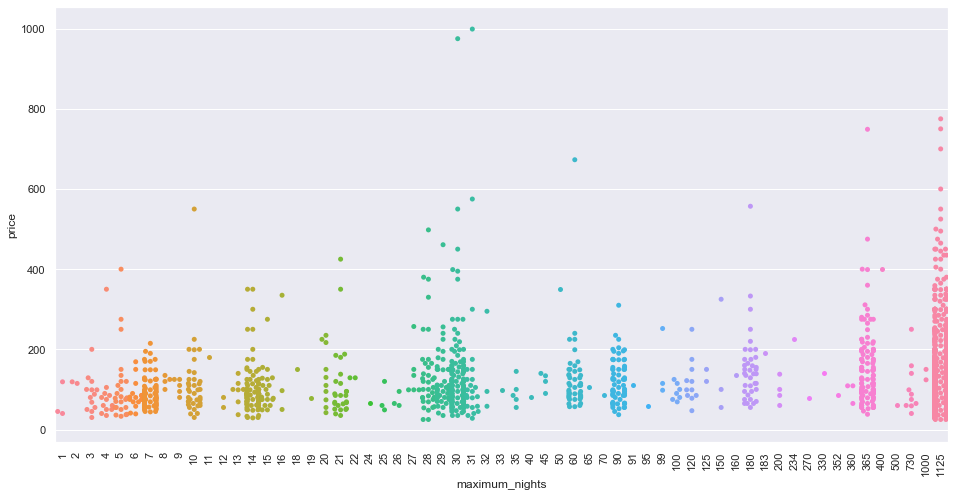

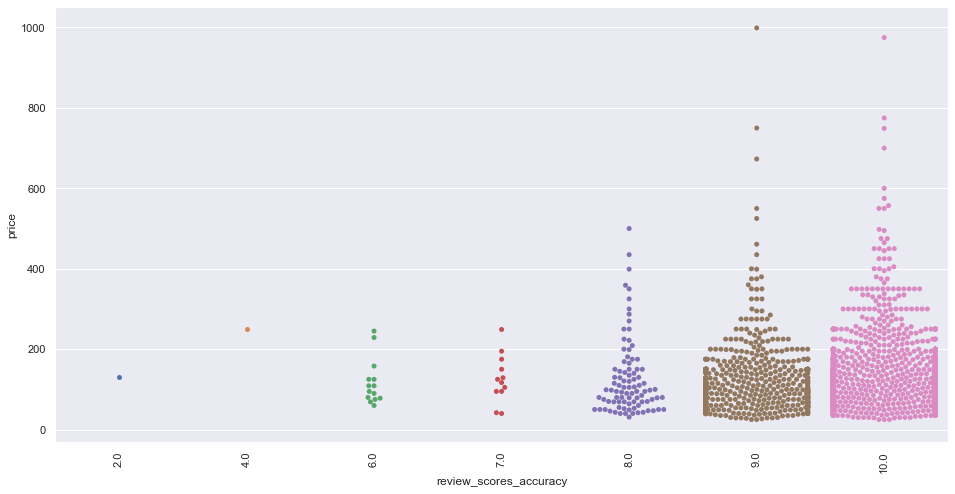

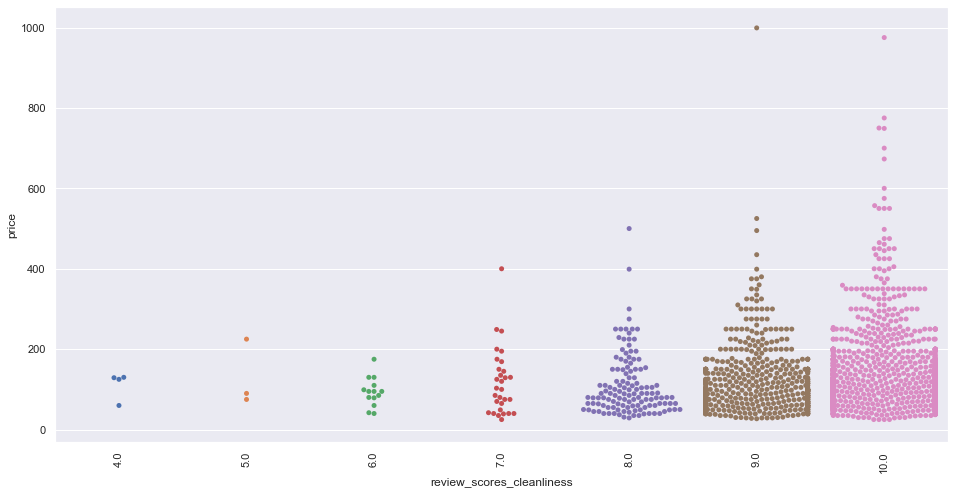

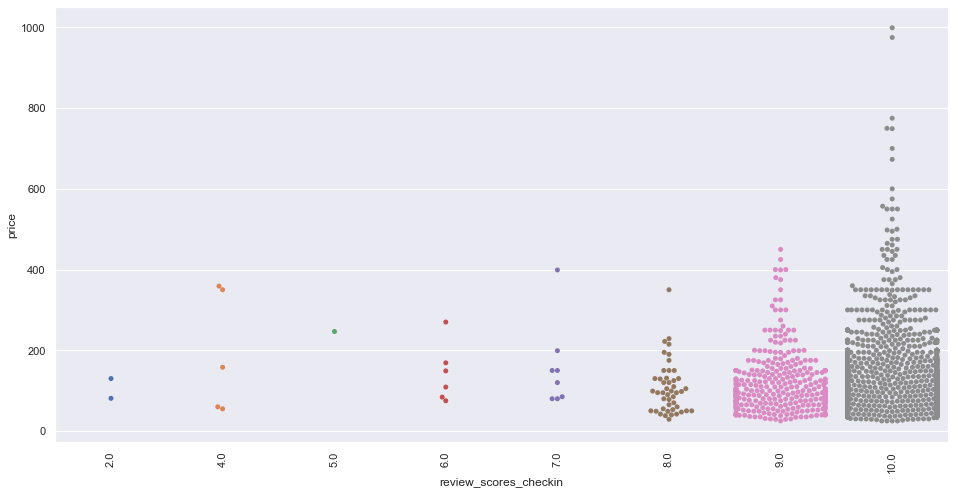

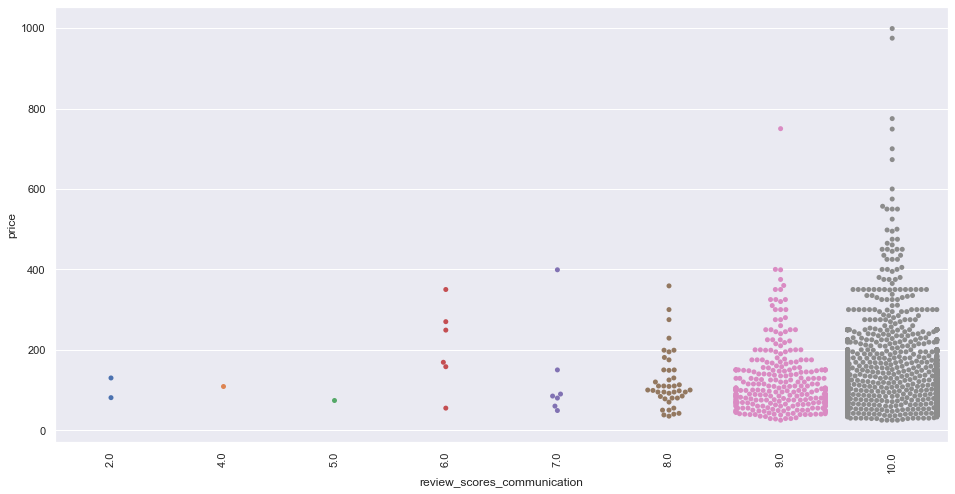

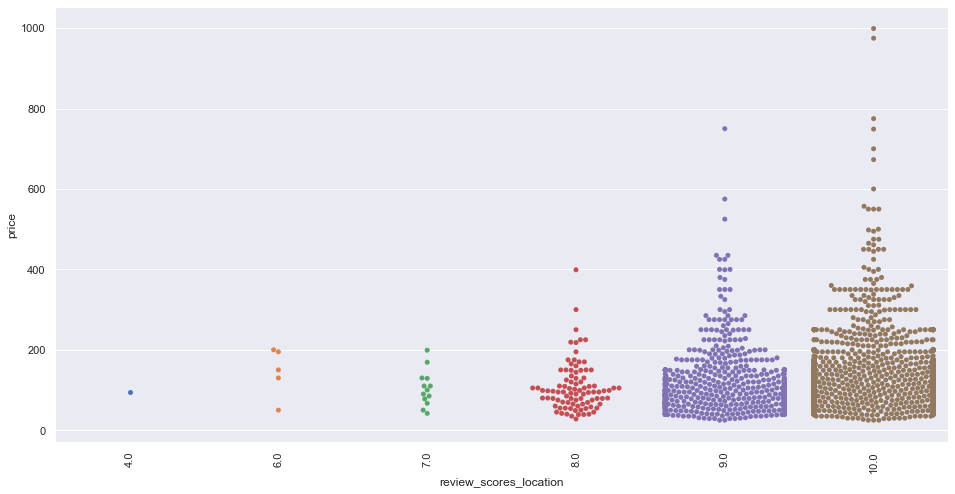

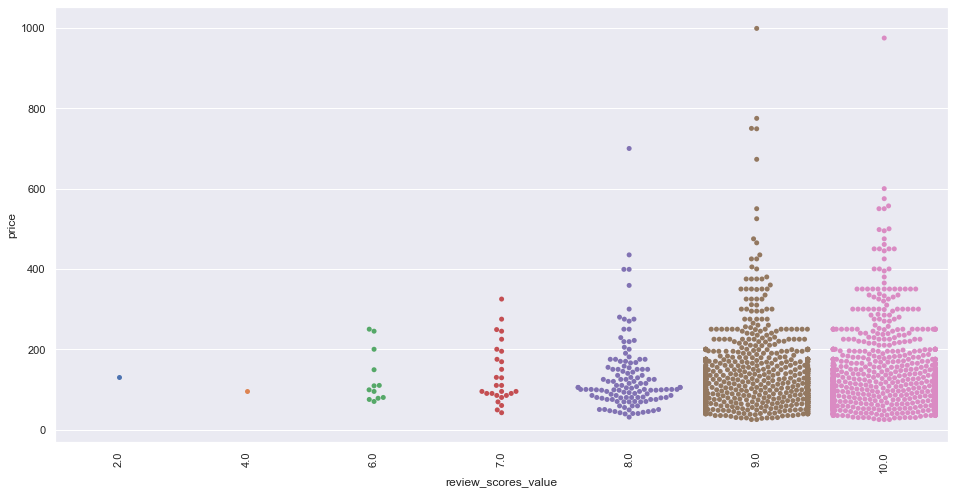

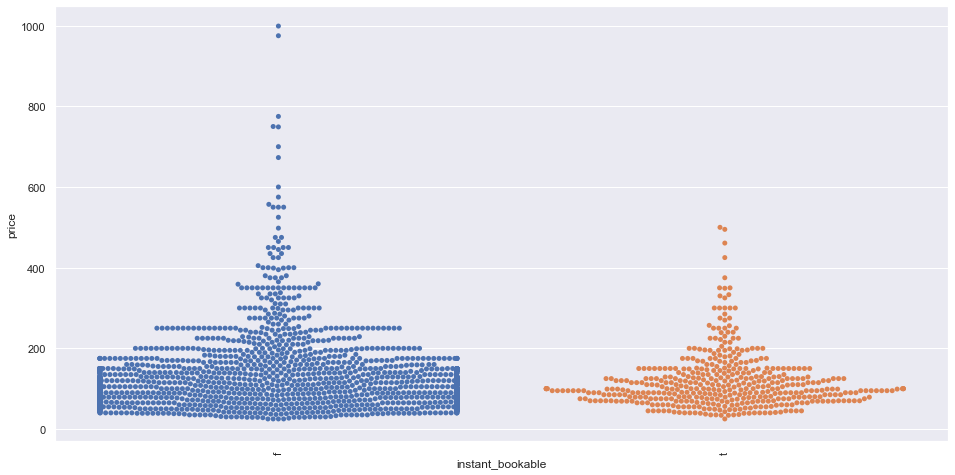

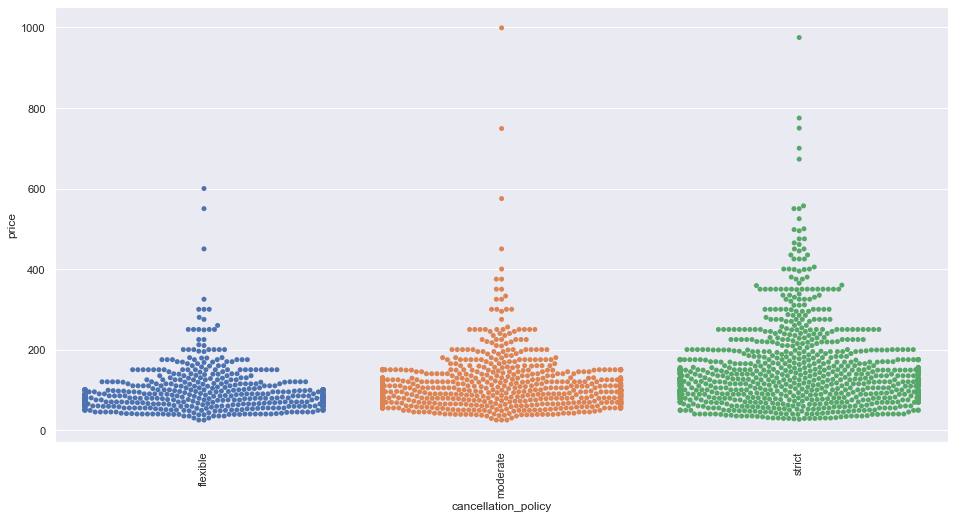

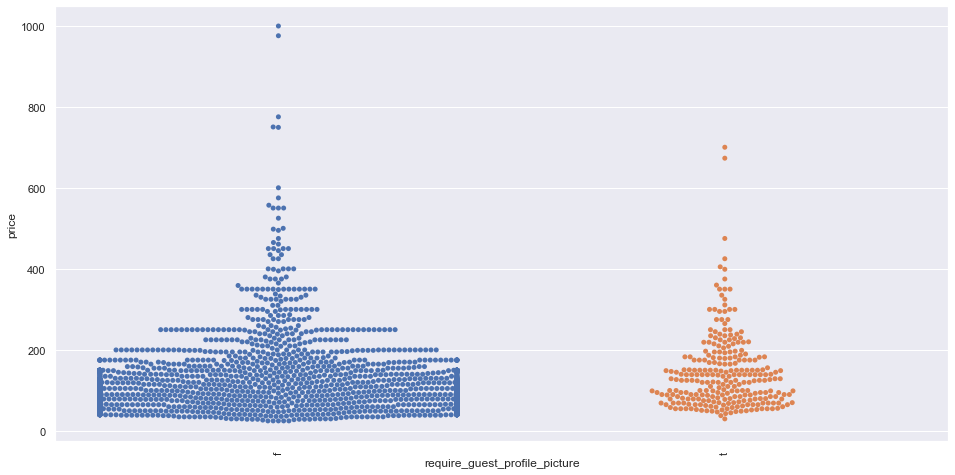

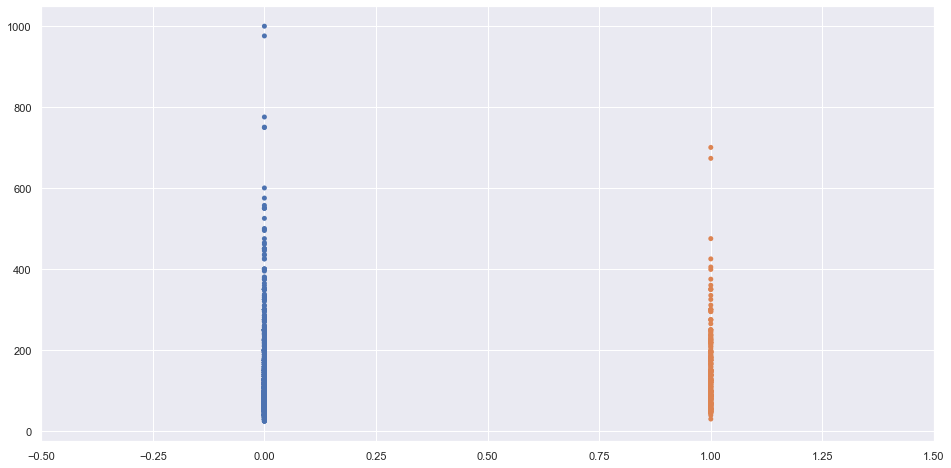

In [31]:
#printing the swarmplots of categorical variables against price
for (column_name, column_data) in categorical_listings.iteritems():
  if(column_name!="price"):
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    sb.swarmplot(x = column_name, y = 'price', data = categorical_listings)
    plt.xticks(rotation=90)
    

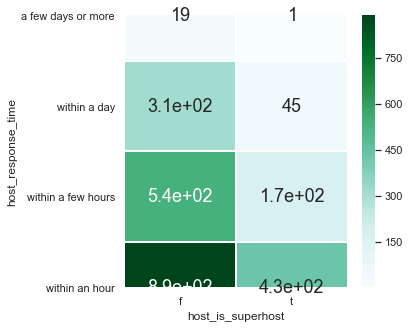

In [26]:
#Heatmap of host_response_time and host_is_superhost
f, axes = plt.subplots(1, 1, figsize=(5, 5))
sb.heatmap(categorical_listings.groupby(['host_response_time', 'host_is_superhost']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")
#the response time is mostly very fast- within an hour for both superhosts and normal hosts   
         
         

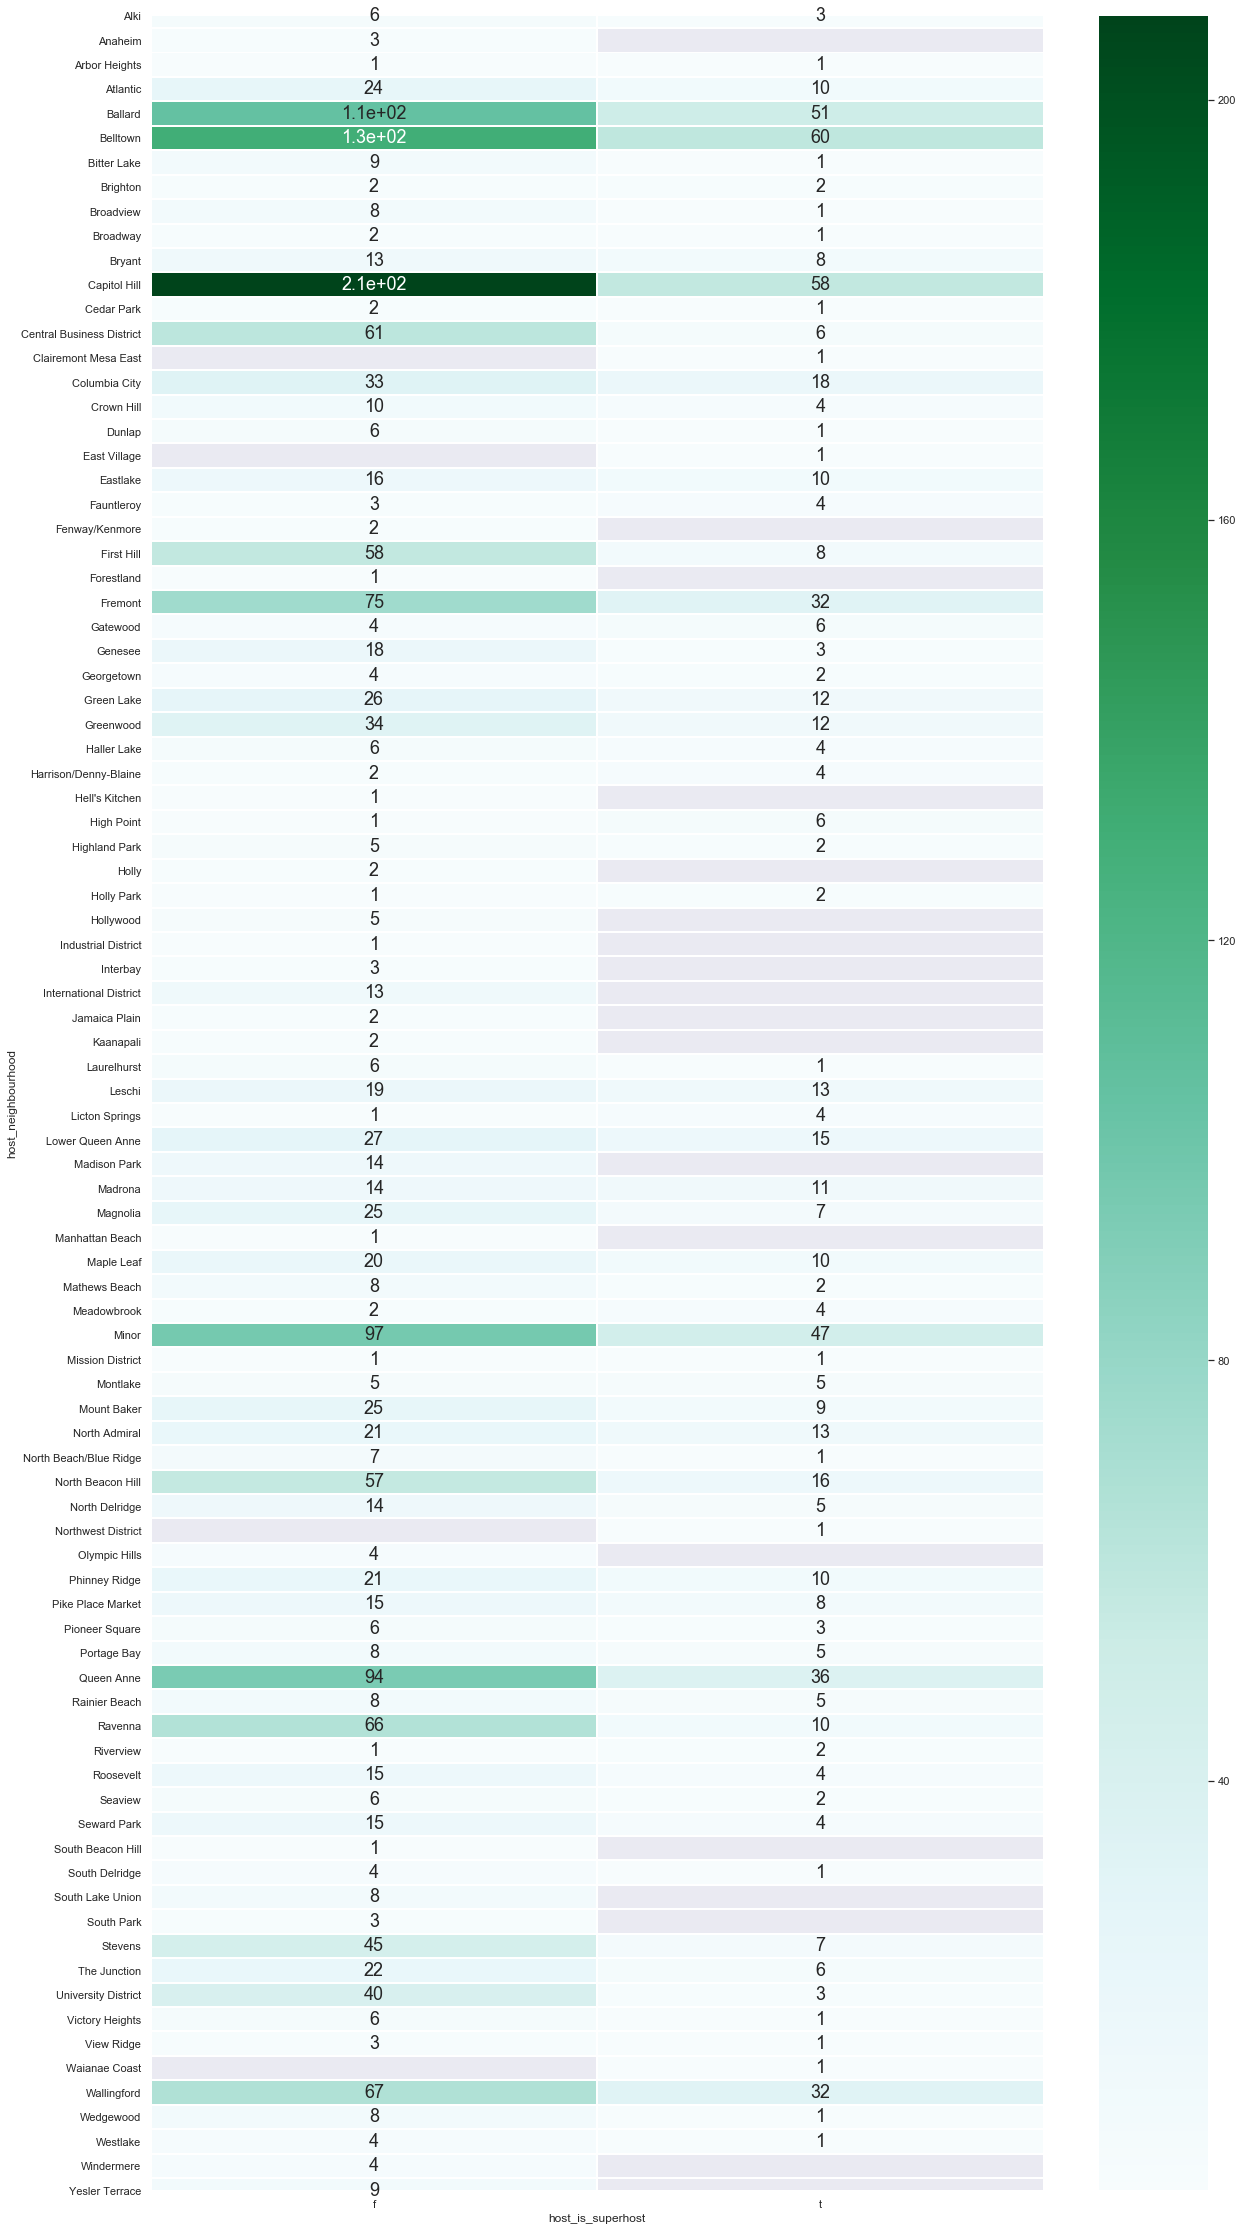

In [27]:
#heatmap of host_neighbourhood and host_is_superhost
f, axes = plt.subplots(1, 1, figsize=(20, 40))
sb.heatmap(categorical_listings.groupby(['host_neighbourhood', 'host_is_superhost']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")
# quite a lot of superhosts are from Belltown, Ballard, Capitol Hill
# High point has more superhosts than only normal hosts

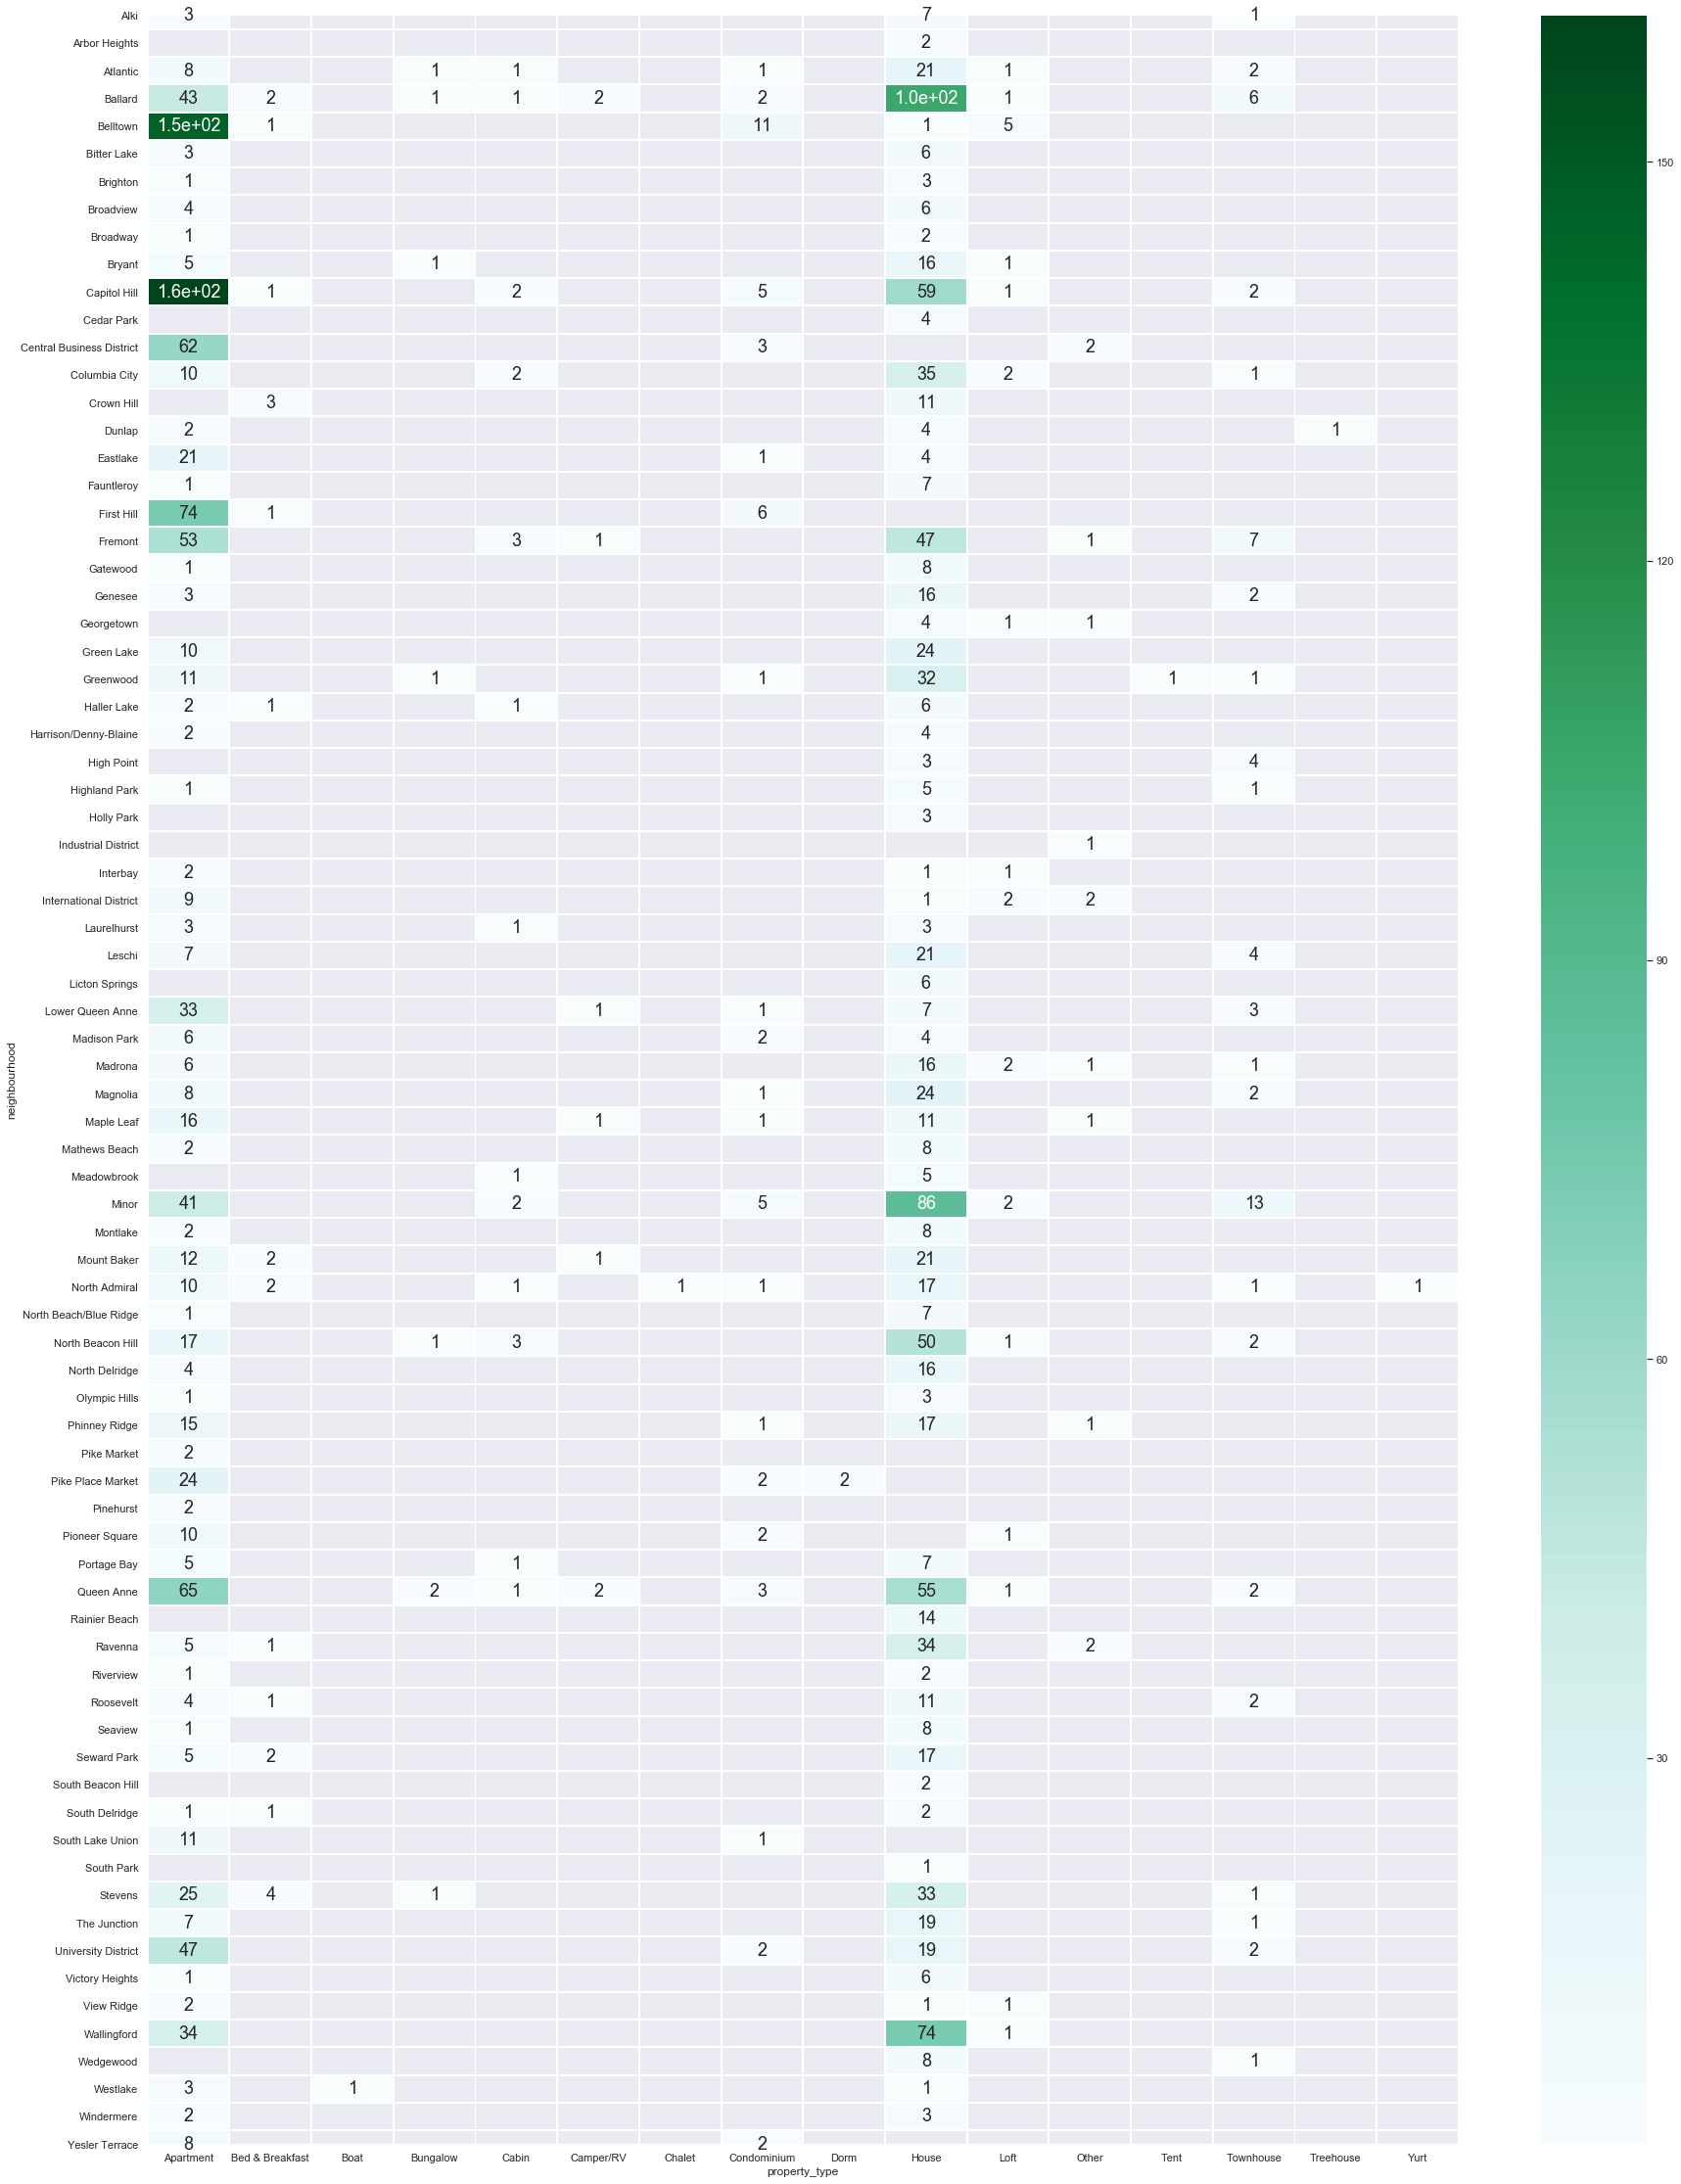

In [28]:
#heatmap for property_type vs neighbourhood
f, axes = plt.subplots(1, 1, figsize=(30, 40))
sb.heatmap(categorical_listings.groupby(['neighbourhood', 'property_type']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")
#Boat propertytype is there only in WestLake
#Treehouse only in Dunlap
#most common property types are House and Apartment

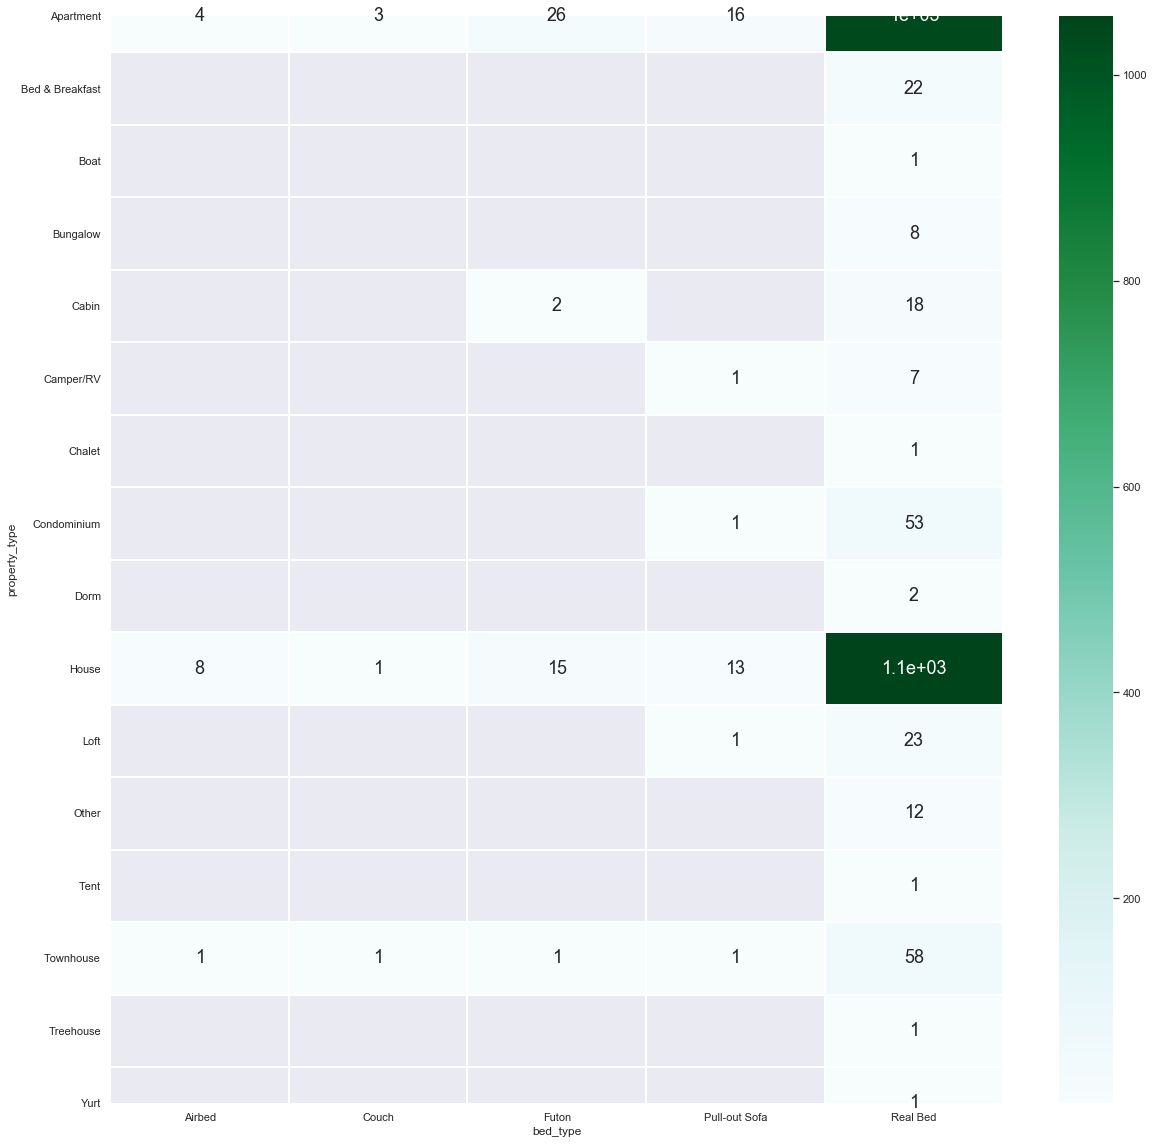

In [29]:
#heatmap for bed_type vs property_type
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(categorical_listings.groupby(['property_type', 'bed_type']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")
#we can see that Real Bed is most commonly used in all property types
#some also have pull out sofa but Airbed and Couch are not in much use

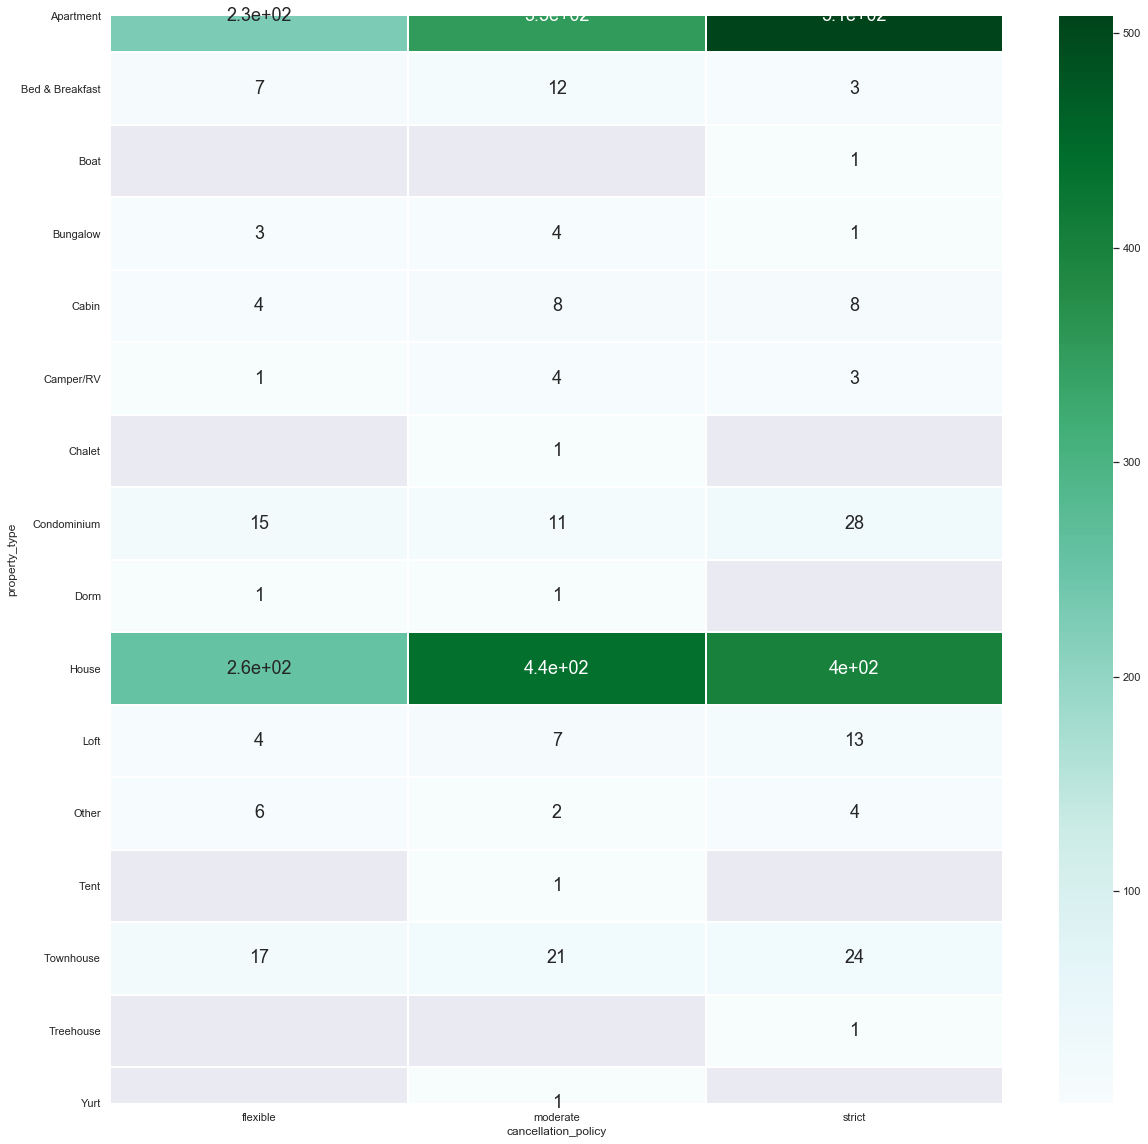

In [30]:
#heatmap for property_type vs cancellation_policy
f, axes = plt.subplots(1, 1, figsize=(20,20))
sb.heatmap(categorical_listings.groupby(['property_type', 'cancellation_policy']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")
#Only 1 Bungalow has a strict cancellation policy, the rest are moderate or flexible
#There are less Bed and Breakfasts with strict cancellation policy
#most Apartments have strict cancellation policies

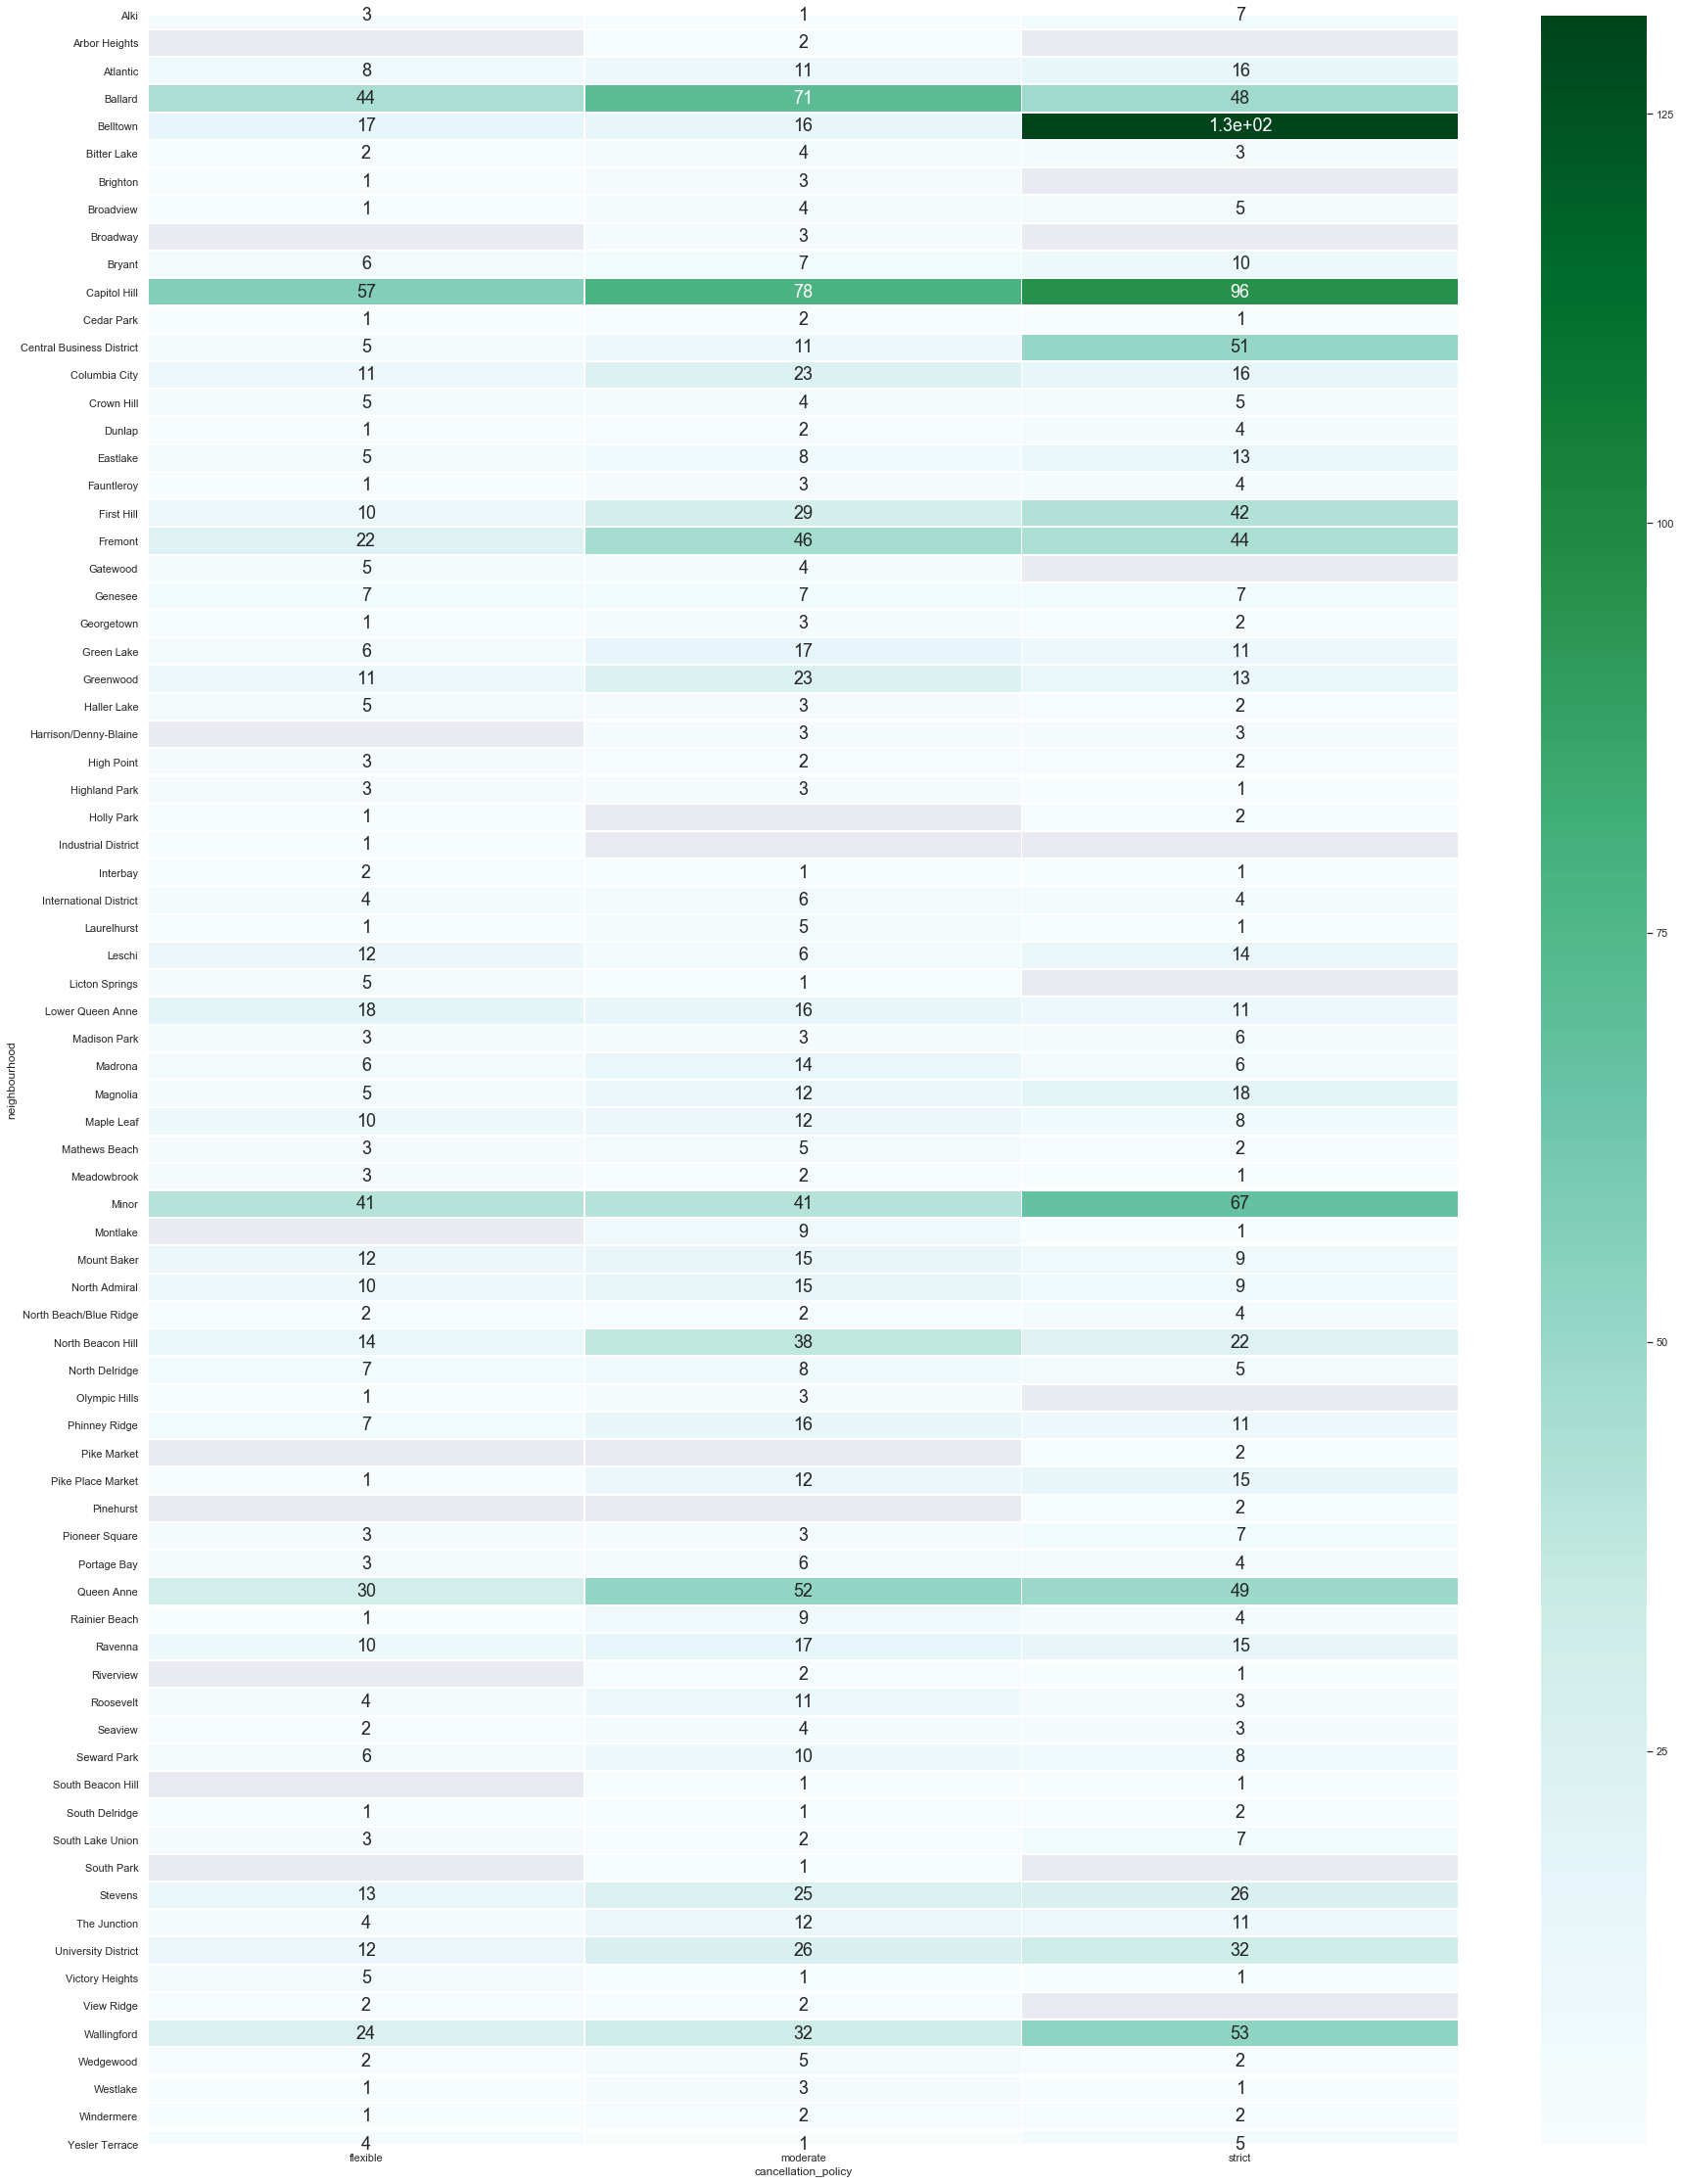

In [31]:
#heatmap for neighbourhood vs cancellation_policy
f, axes = plt.subplots(1, 1, figsize=(30,40))
sb.heatmap(categorical_listings.groupby(['neighbourhood', 'cancellation_policy']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")
#in BellTown most have strict cancellation policies

In [ ]:
#heatmap for property_type vs room_type
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(categorical_listings.groupby(['property_type', 'room_type']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")
#we can see that Apartment and Entire home/apt is most common

## Preparing the categorical variables which will be predictors, using ONE HOT ENCODING

In [33]:
data=pd.DataFrame(categorical_listings[["property_type","room_type","neighbourhood","beds","accommodates","bathrooms","bedrooms","cancellation_policy","minimum_nights"]])
data
#creating the dataframe with the categorical variables that we think are appropriate to use to predict price

property_type        room_type neighbourhood beds accommodates bathrooms  \
0        Apartment  Entire home/apt    Queen Anne  1.0            4       1.0   
1        Apartment  Entire home/apt    Queen Anne  1.0            4       1.0   
2            House  Entire home/apt    Queen Anne  7.0           11       4.5   
3            House     Private room    Queen Anne  1.0            2       1.0   
4            Cabin     Private room    Queen Anne  1.0            2       1.0   
...            ...              ...           ...  ...          ...       ...   
2394         House  Entire home/apt       Fremont  3.0            5       1.0   
2395     Apartment  Entire home/apt       Fremont  1.0            3       1.0   
2396     Apartment  Entire home/apt       Fremont  2.0            4       1.0   
2397         House  Entire home/apt       Fremont  3.0            6       2.0   
2398     Apartment  Entire home/apt   Portage Bay  2.0            4       1.0   

     bedrooms cancellation_policy minimum_nights  
0         1.0            moderate              1  
1         1.0              strict              2  
2         5.0              strict              4  
3         1.0            moderate              3  
4         1.0              strict              2  
...       ...                 ...            ...  
2394      2.0              strict              2  
2395      1.0            moderate              1  
2396      1.0            moderate              3  
2397      3.0              strict              3  
2398      1.0            moderate              2  

[2399 rows x 9 columns]

In [34]:
#using the ONE HOT ENCODER to encode categorical variables
from sklearn.preprocessing import OneHotEncoder# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
for (column_name, column_data) in data.iteritems():

        enc_df = pd.DataFrame(enc.fit_transform(data[[column_name]]).toarray())# merge with main df on key values
        data = data.join(enc_df)
        arr=enc.get_feature_names()
        for i in range(0,len(arr)):
            data.rename(columns={i:(arr[i])[3:]}, inplace=True)


In [35]:
data_to_predict=data.drop(["property_type","room_type","neighbourhood", "beds","bathrooms","bedrooms","accommodates","cancellation_policy", "minimum_nights"], axis=1)
data_to_predict

Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  Chalet  \
0           1.0              0.0   0.0       0.0    0.0        0.0     0.0   
1           1.0              0.0   0.0       0.0    0.0        0.0     0.0   
2           0.0              0.0   0.0       0.0    0.0        0.0     0.0   
3           0.0              0.0   0.0       0.0    0.0        0.0     0.0   
4           0.0              0.0   0.0       0.0    1.0        0.0     0.0   
...         ...              ...   ...       ...    ...        ...     ...   
2394        0.0              0.0   0.0       0.0    0.0        0.0     0.0   
2395        1.0              0.0   0.0       0.0    0.0        0.0     0.0   
2396        1.0              0.0   0.0       0.0    0.0        0.0     0.0   
2397        0.0              0.0   0.0       0.0    0.0        0.0     0.0   
2398        1.0              0.0   0.0       0.0    0.0        0.0     0.0   

      Condominium  Dorm  House  ...    7   10   13   14   20   21   29   30  \
0             0.0   0.0    0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1             0.0   0.0    0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2             0.0   0.0    1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3             0.0   0.0    1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4             0.0   0.0    0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...           ...   ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2394          0.0   0.0    1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2395          0.0   0.0    0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2396          0.0   0.0    0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2397          0.0   0.0    1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2398          0.0   0.0    0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       31  1000  
0     0.0   0.0  
1     0.0   0.0  
2     0.0   0.0  
3     0.0   0.0  
4     0.0   0.0  
...   ...   ...  
2394  0.0   0.0  
2395  0.0   0.0  
2396  0.0   0.0  
2397  0.0   0.0  
2398  0.0   0.0  

[2399 rows x 161 columns]

## Separating out the amenities and creating new features by combining some amenities together

In [36]:
Bnb = pd.DataFrame(listings)
Bnb["amenities"]
Bnb["amenities"]=Bnb["amenities"].str.replace('"','')
Bnb["amenities"]=Bnb["amenities"].str.replace(", ",",")
Bnb["amenities"]=Bnb["amenities"].str.replace(',','","')
Bnb["amenities"]=Bnb["amenities"].str.replace('{','{"')
Bnb["amenities"]=Bnb["amenities"].str.replace('}','"}')
#firstly, we did some data cleaning to make the amenities into proper format for data handling
amenities = Bnb.filter(['amenities'], axis=1)

#import ast
#mylist=[]
#for i in range(2399):
    #A=amenities.iloc[i][0]
    #Dict=ast.literal_eval(A)
    #for j in Dict:
        #if j not in mylist:
            #mylist.append(j)

In [37]:
Bnb["amenities"]

0       {"TV","Cable TV","Internet","Wireless Internet...
1       {"TV","Internet","Wireless Internet","Kitchen"...
2       {"TV","Cable TV","Internet","Wireless Internet...
3       {"Wireless Internet","Free Parking on Premises...
4       {"Wireless Internet","Pets live on this proper...
                              ...                        
2394    {"TV","Cable TV","Internet","Wireless Internet...
2395    {"TV","Cable TV","Internet","Wireless Internet...
2396    {"Internet","Wireless Internet","Kitchen","Fre...
2397    {"TV","Cable TV","Internet","Wireless Internet...
2398    {"TV","Cable TV","Internet","Wireless Internet...
Name: amenities, Length: 2399, dtype: object

In [38]:
#creating the list of different amenities
import ast
mylist=[]
for i in range(2399):
    A=amenities.iloc[i][0]
    Dict=ast.literal_eval(A)
    for j in Dict:
        if j not in mylist:
            mylist.append(j)

In [39]:
#creating amenitieslist which is a dataframe having columns for each unique amenity
amenitieslist=pd.DataFrame()
for x in mylist:
    data=[]
    value=0
    flag=0
    for i in range(2399):
        flag=0
        A=amenities.iloc[i][0]
        Dict=ast.literal_eval(A)
        for j in Dict:
            if j==x or flag==1:
                value=1
                flag=1
            elif flag==0:
                value=0
        data.append(value)
    data
    amenitieslist[x]=data

In [40]:
amenitieslist
amenitieslist["price"]=numerical_listings["price"]
amenitieslist

Internet  Kitchen  Cable TV  Air Conditioning  TV  Heating  Washer  \
0            1        1         1                 1   1        1       1   
1            1        1         0                 0   1        1       1   
2            1        1         1                 1   1        1       1   
3            0        0         0                 0   0        1       0   
4            0        0         0                 0   0        1       0   
...        ...      ...       ...               ...  ..      ...     ...   
2394         1        1         1                 0   1        1       1   
2395         1        1         1                 1   1        1       1   
2396         1        1         0                 0   0        1       1   
2397         1        1         1                 1   1        1       1   
2398         1        1         1                 0   1        1       0   

      Dryer  Wireless Internet  Family/Kid Friendly  ...  \
0         1                  1                    1  ...   
1         1                  1                    1  ...   
2         1                  1                    1  ...   
3         0                  1                    0  ...   
4         0                  1                    1  ...   
...     ...                ...                  ...  ...   
2394      1                  1                    1  ...   
2395      1                  1                    0  ...   
2396      1                  1                    1  ...   
2397      1                  1                    1  ...   
2398      0                  1                    1  ...   

      Elevator in Building  Gym  Lock on Bedroom Door  Pool  Other pet(s)  \
0                        0    0                     0     0             0   
1                        0    0                     0     0             0   
2                        0    0                     0     0             0   
3                        0    0                     0     0             0   
4                        0    0                     0     0             0   
...                    ...  ...                   ...   ...           ...   
2394                     0    0                     0     0             0   
2395                     0    0                     0     0             0   
2396                     0    0                     0     0             0   
2397                     0    0                     0     0             0   
2398                     0    0                     0     0             0   

      Smoking Allowed     Doorman  Washer / Dryer  price  
0                   0  0        0               0   85.0  
1                   0  0        0               0  150.0  
2                   0  0        0               0  975.0  
3                   0  0        0               0   80.0  
4                   0  0        0               0   60.0  
...               ... ..      ...             ...    ...  
2394                0  0        0               0  154.0  
2395                0  0        0               0   65.0  
2396                0  0        0               0   95.0  
2397                0  0        0               0  359.0  
2398                0  0        0               0   79.0  

[2399 rows x 43 columns]

C:\Users\Aratrika\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\Aratrika\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\Aratrika\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and

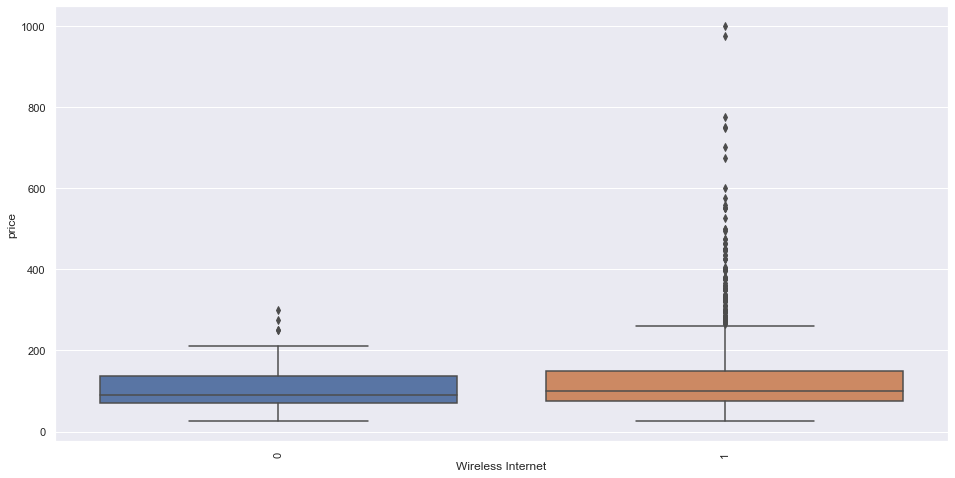

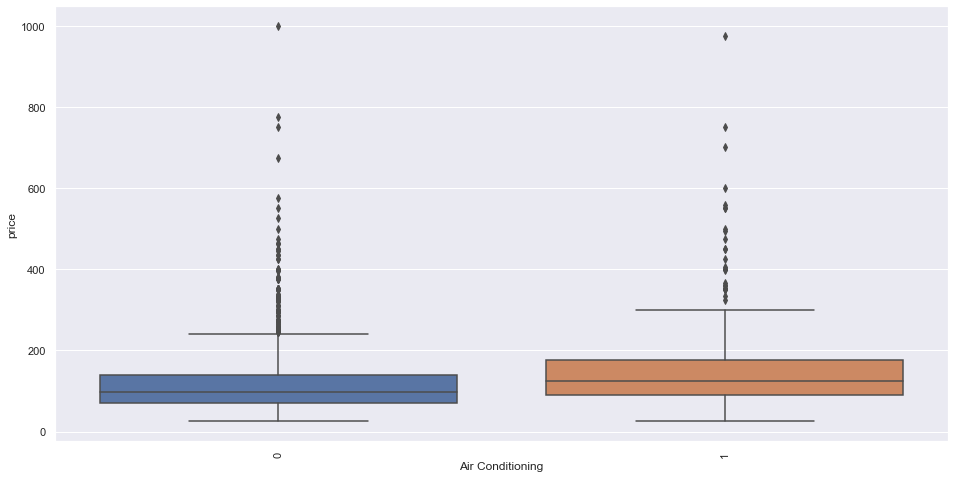

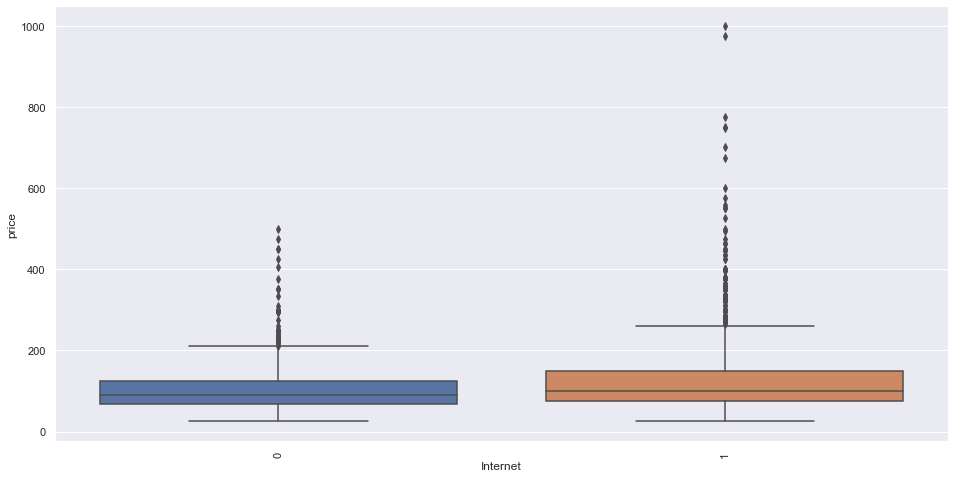

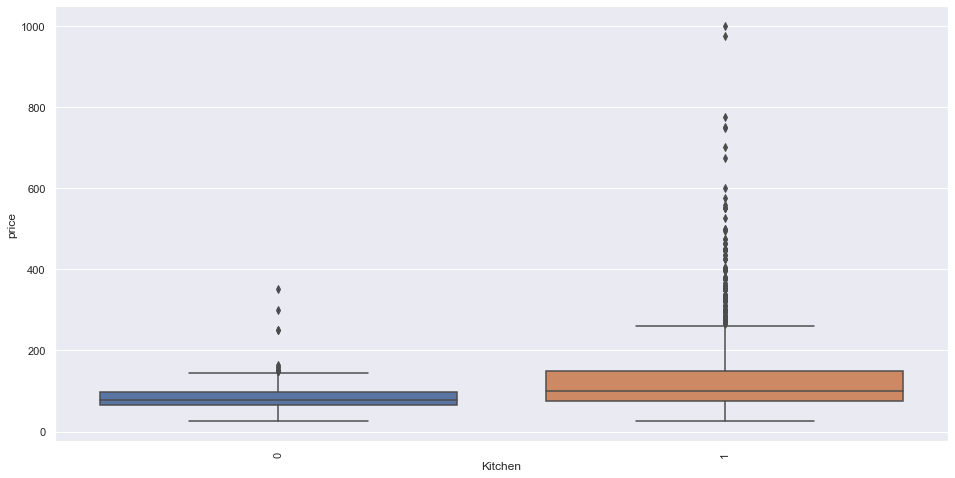

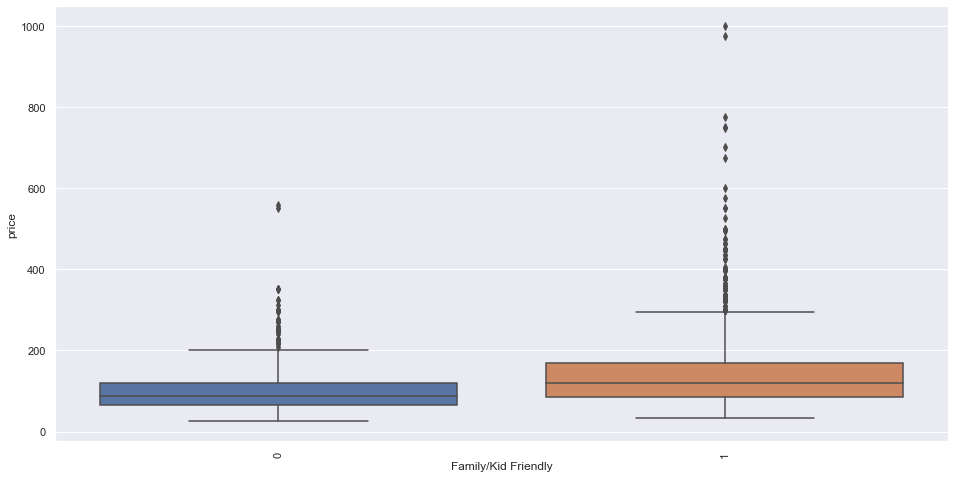

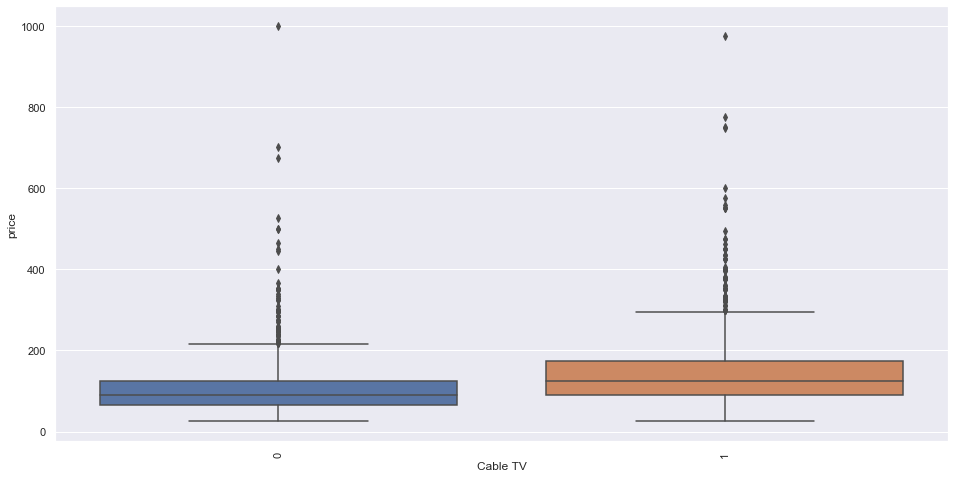

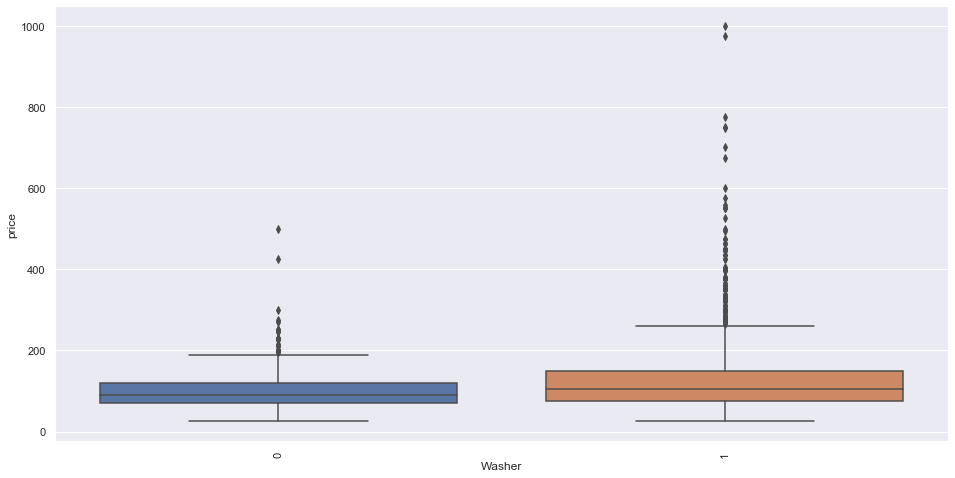

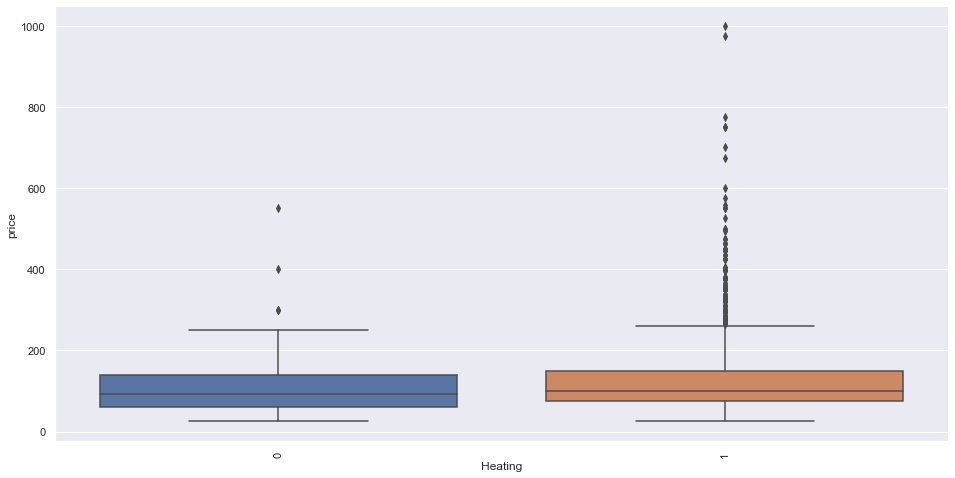

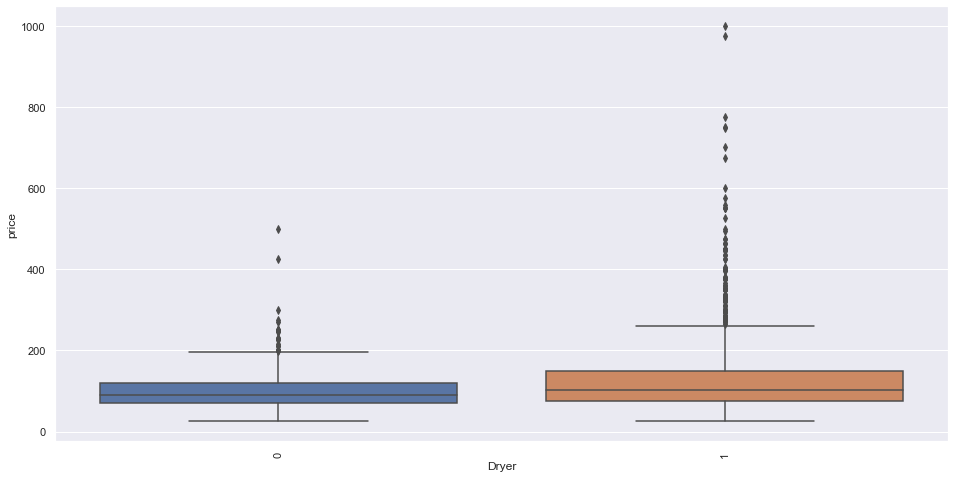

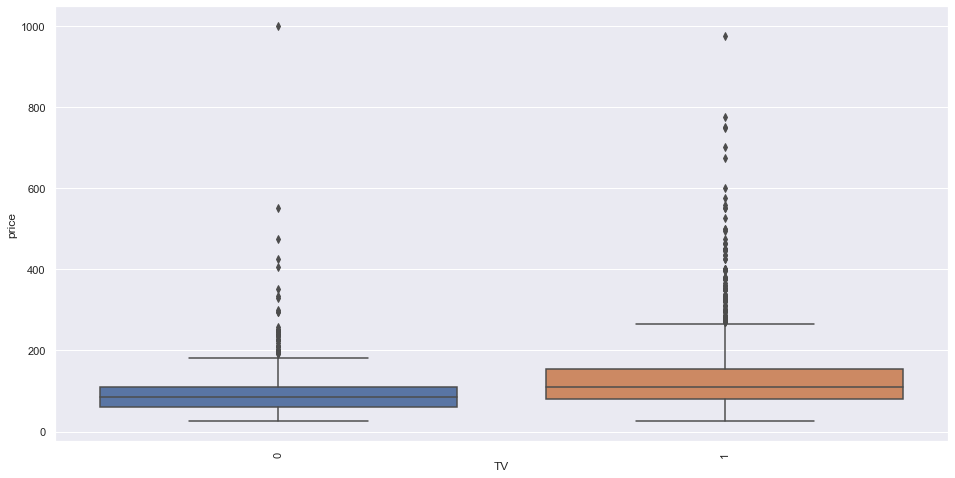

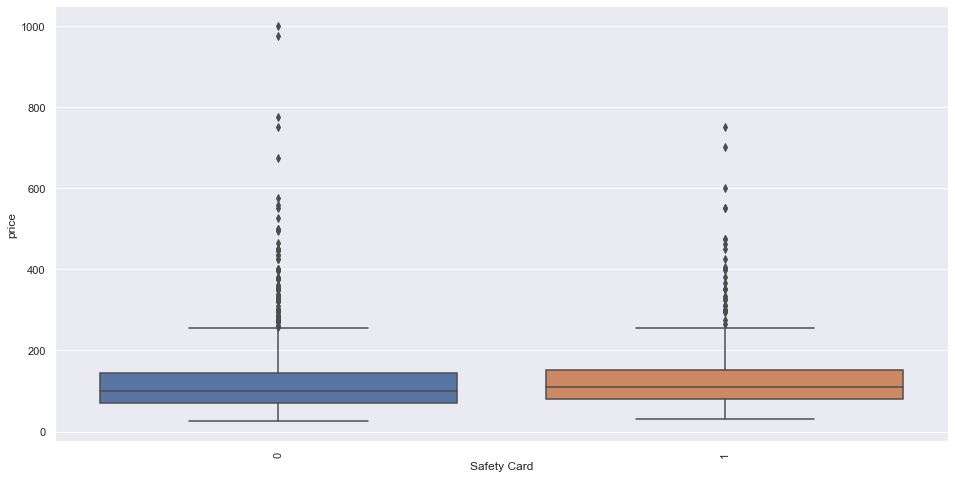

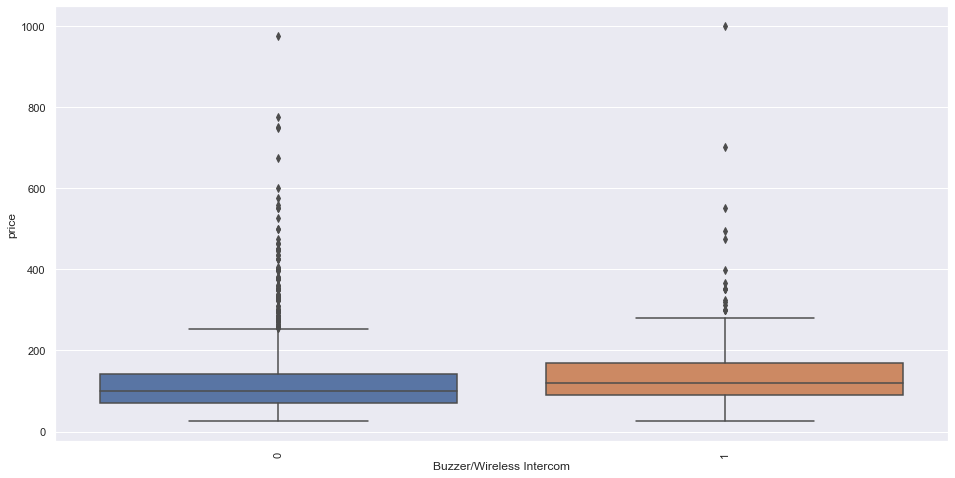

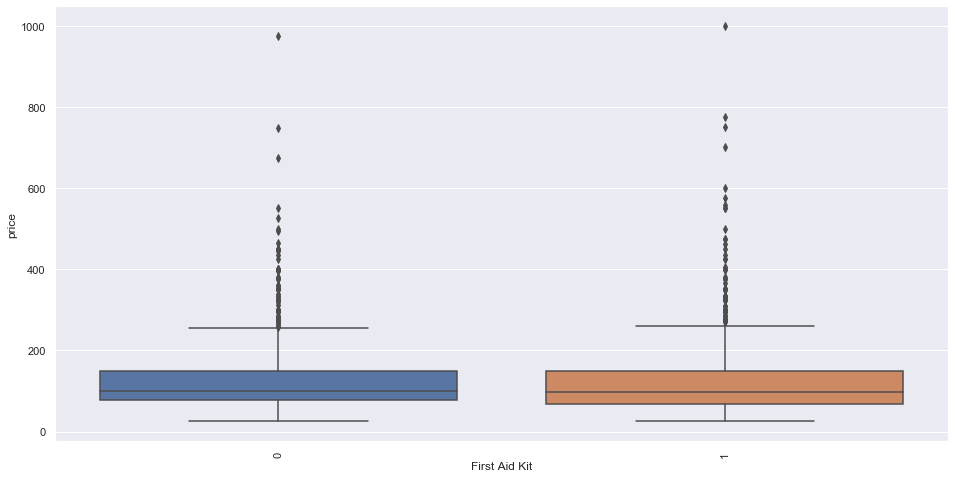

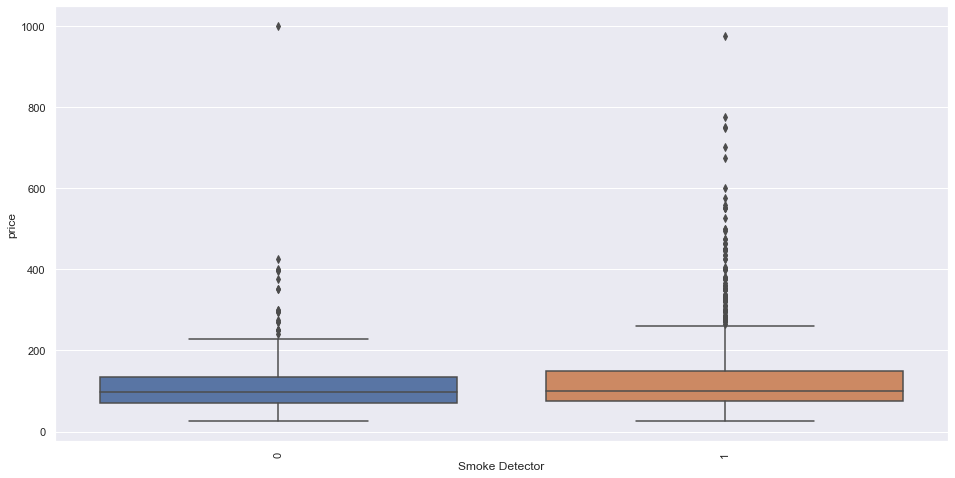

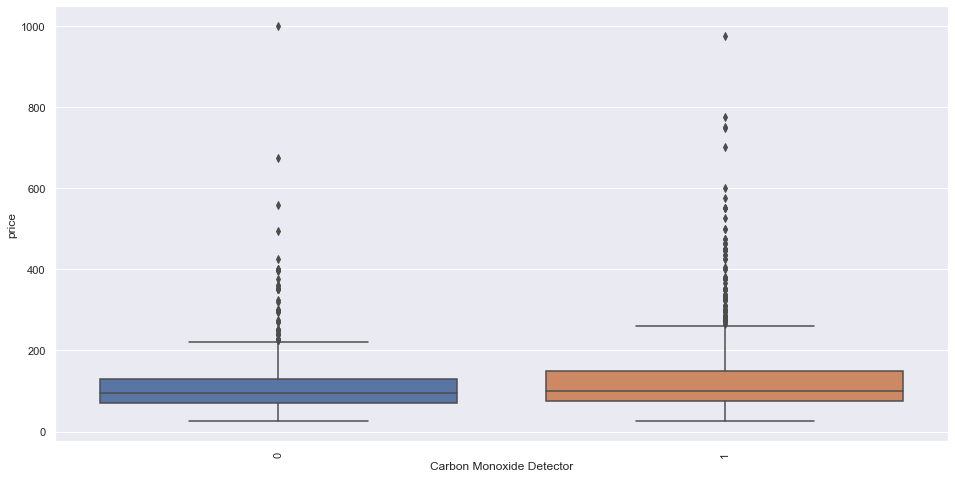

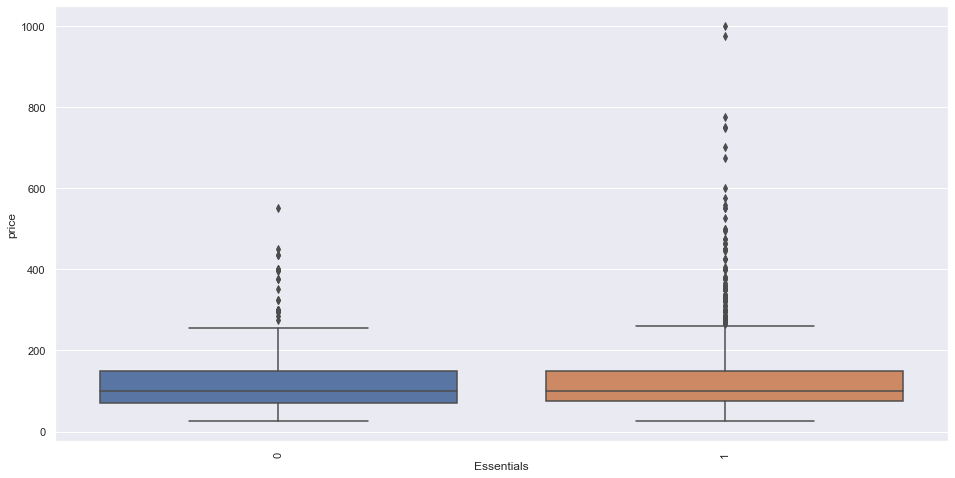

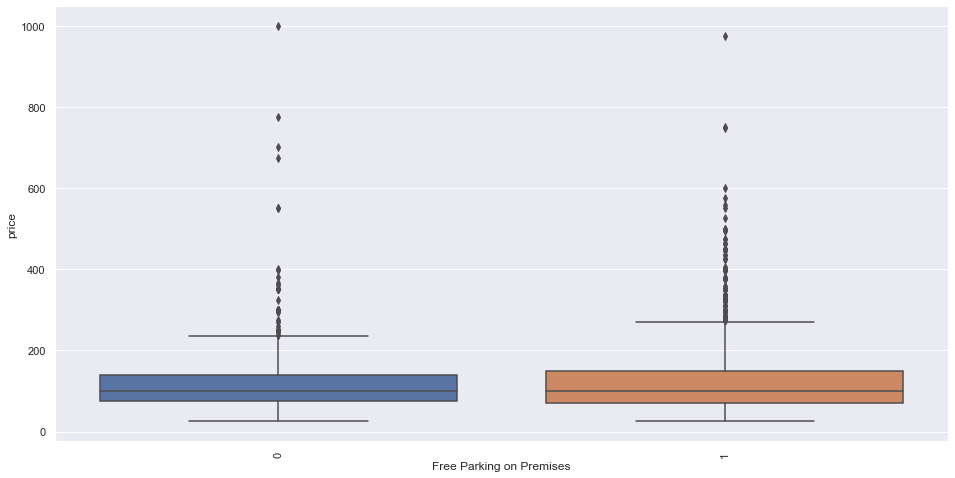

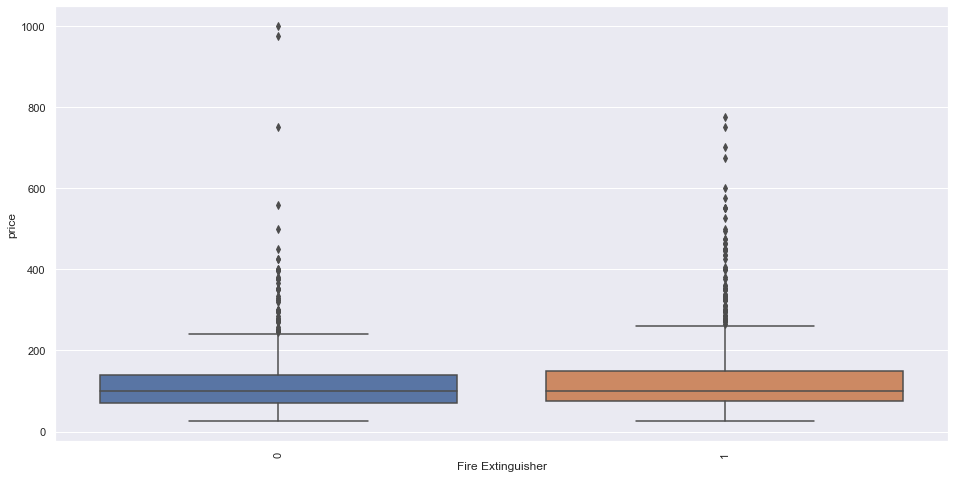

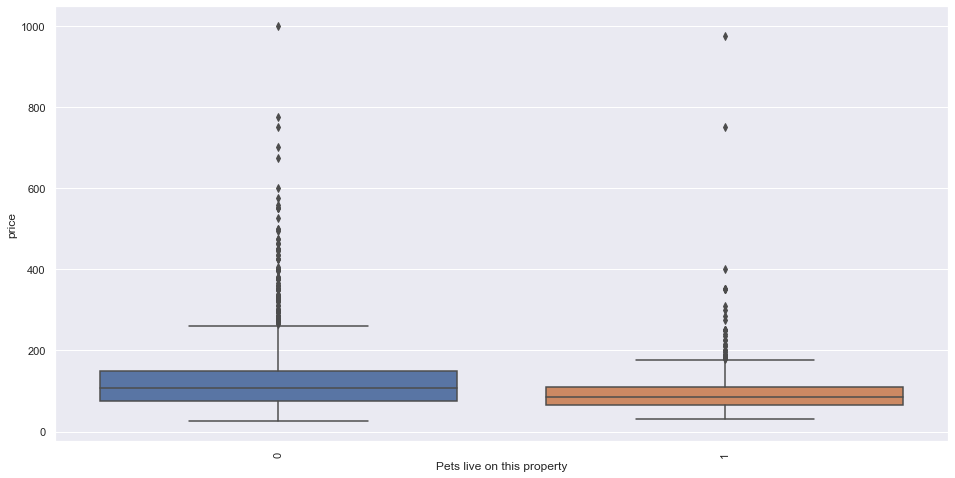

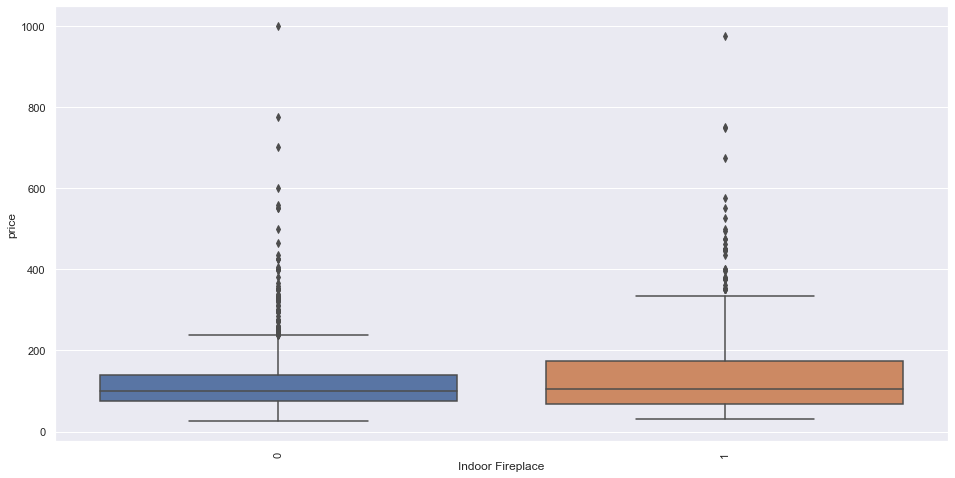

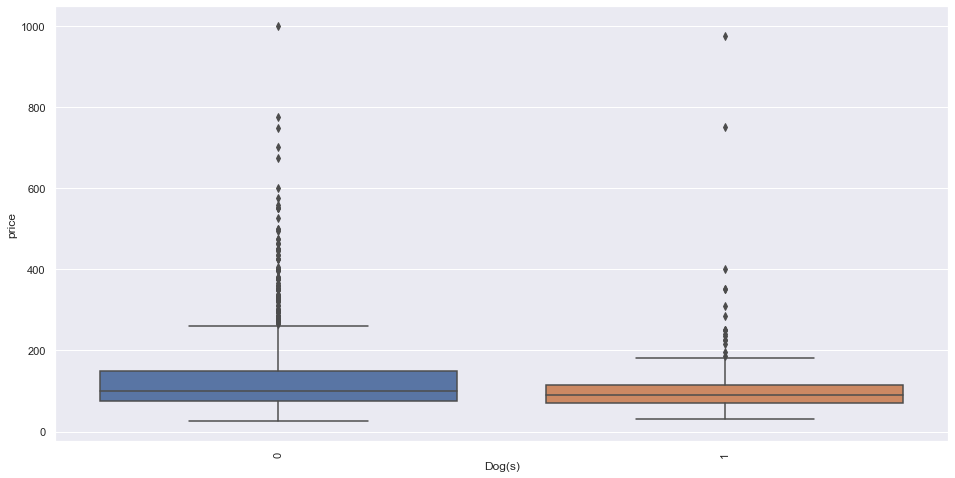

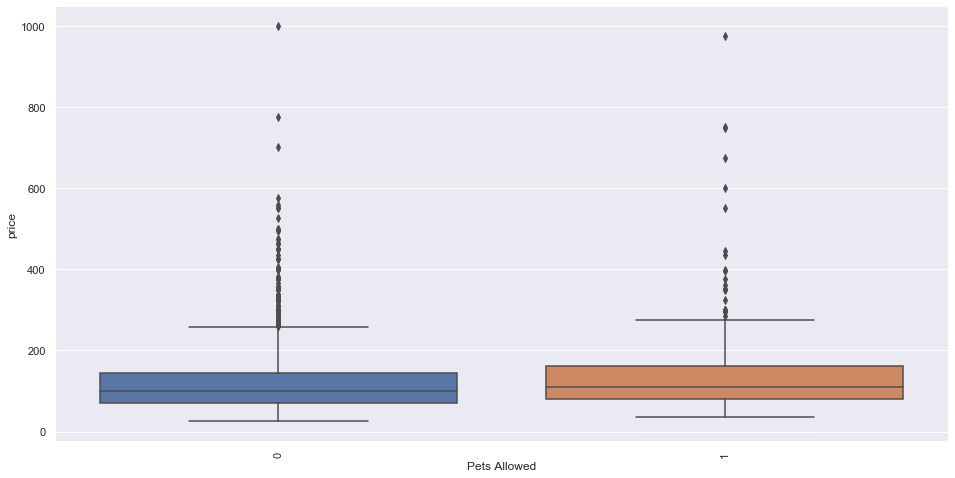

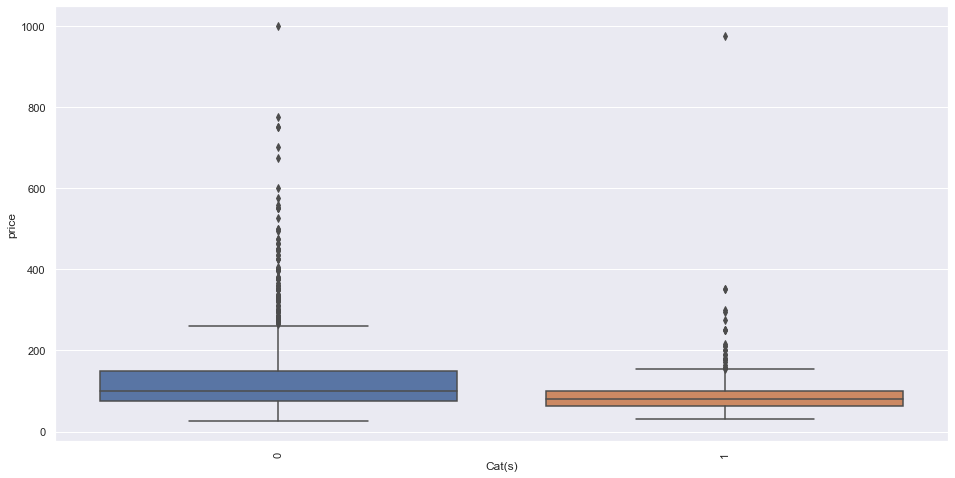

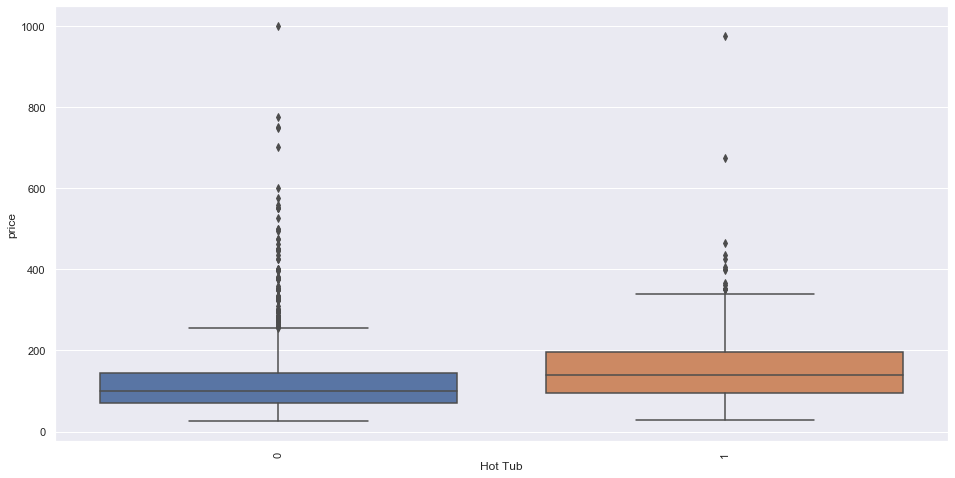

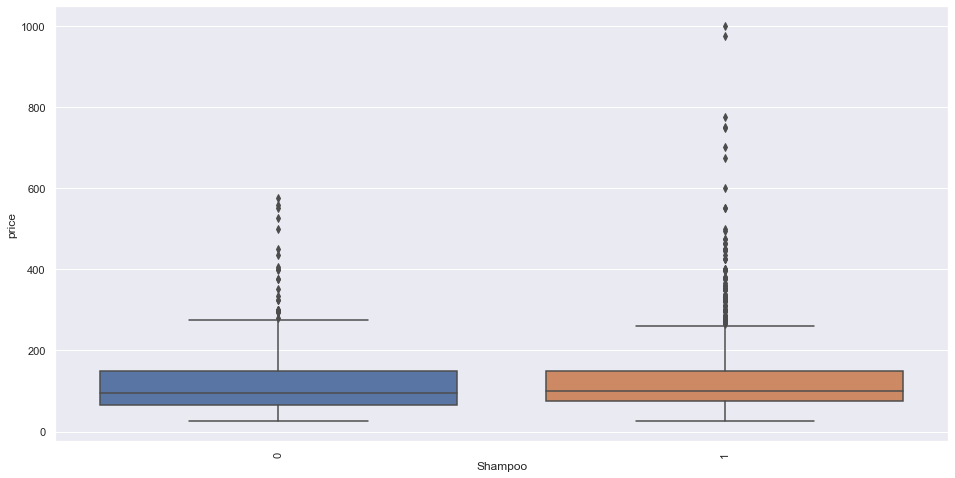

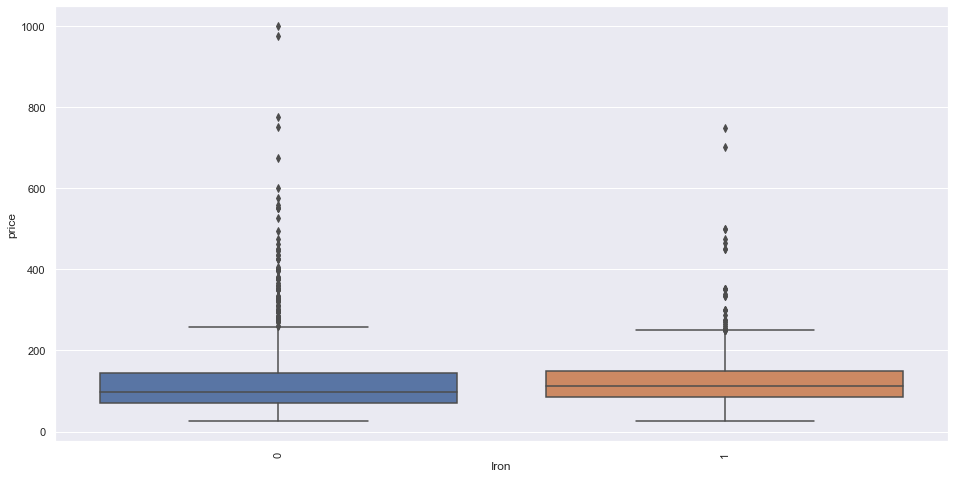

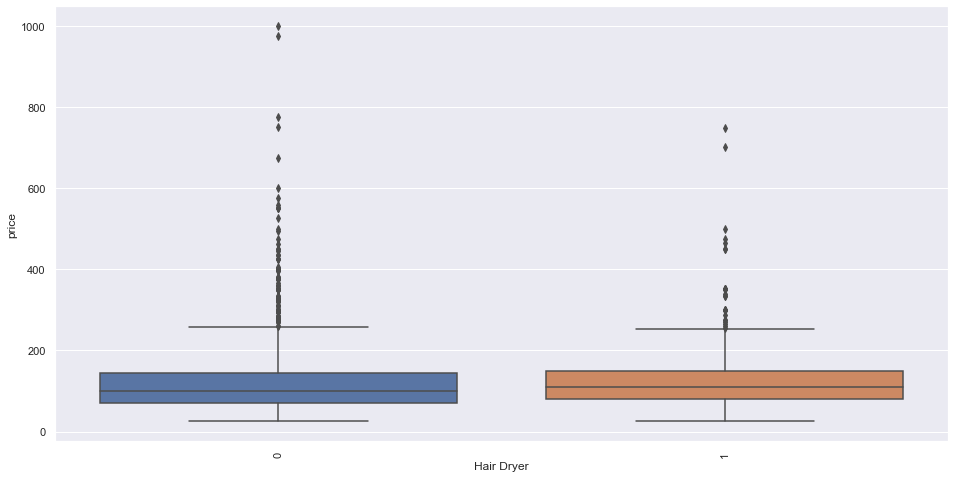

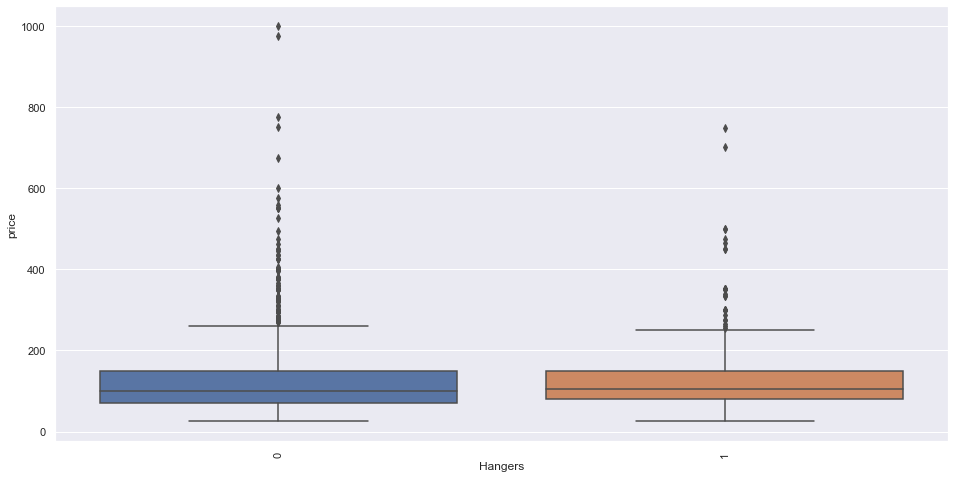

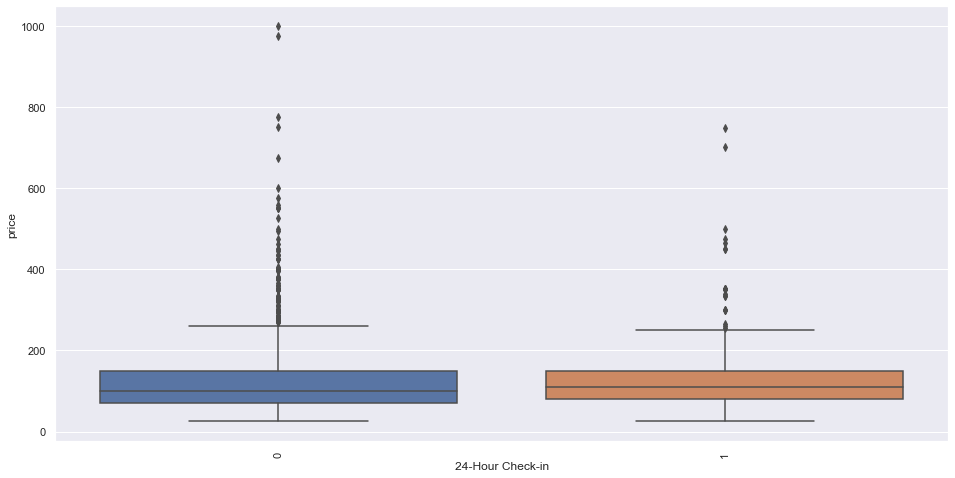

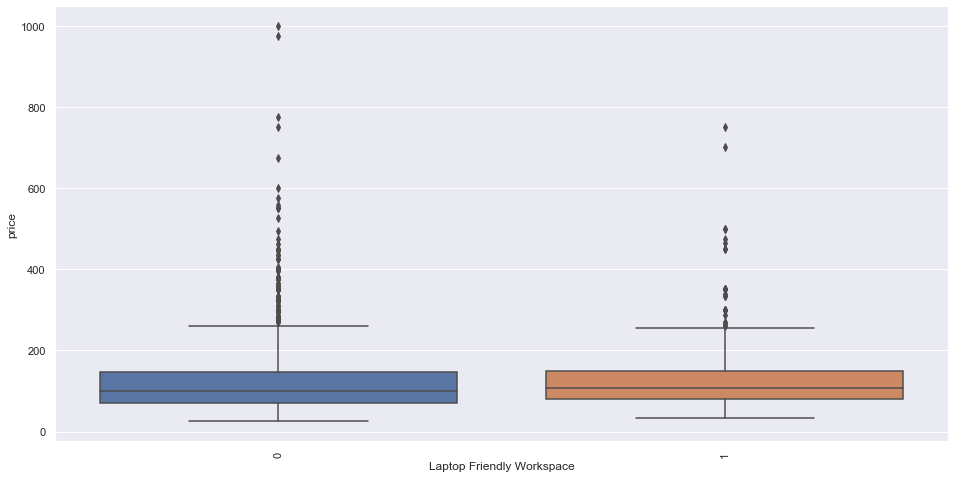

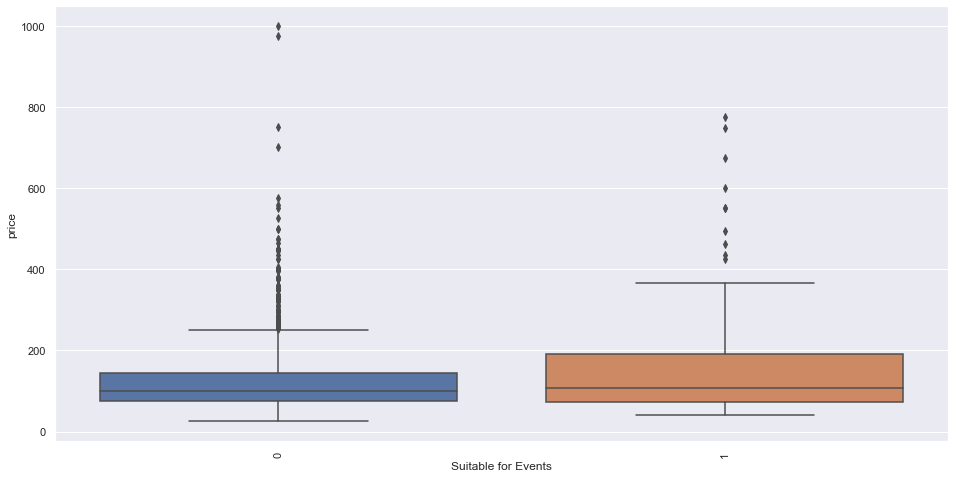

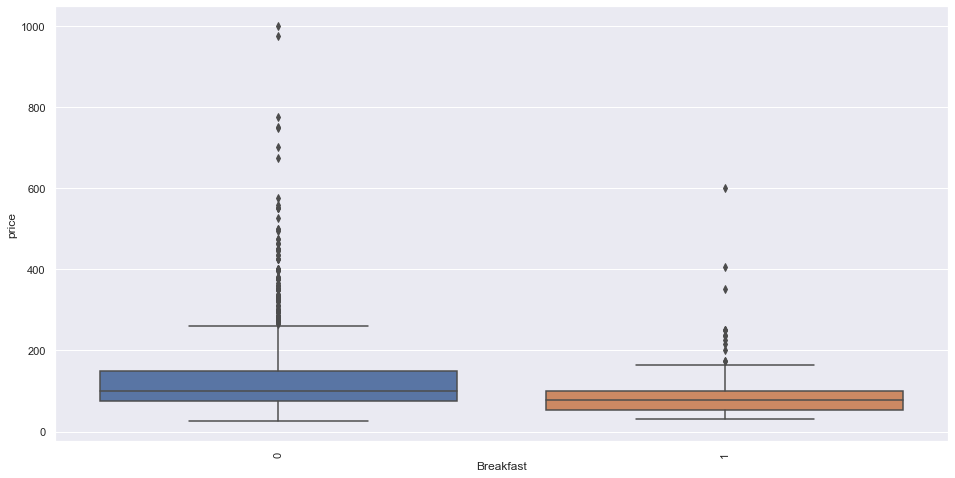

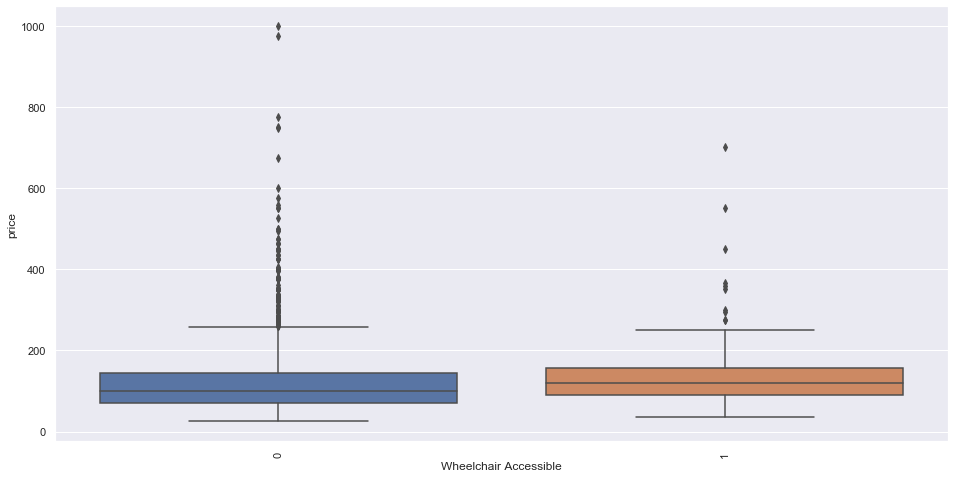

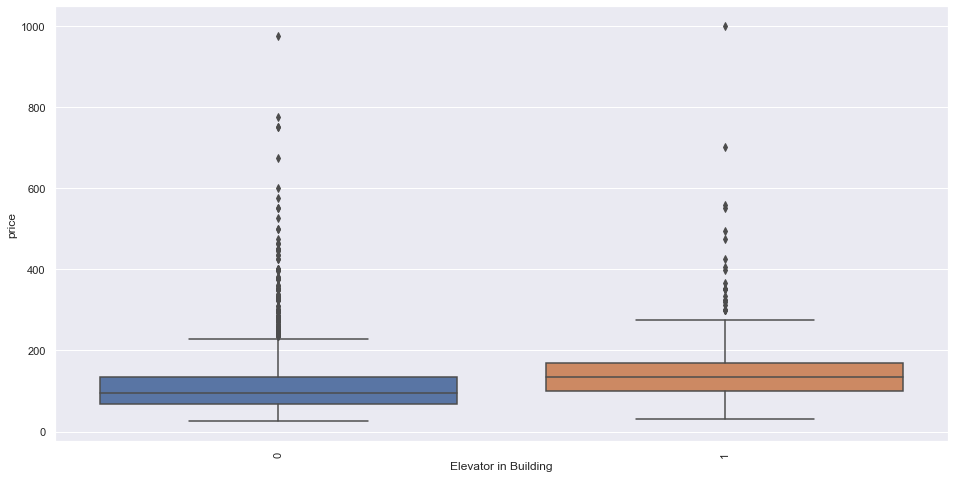

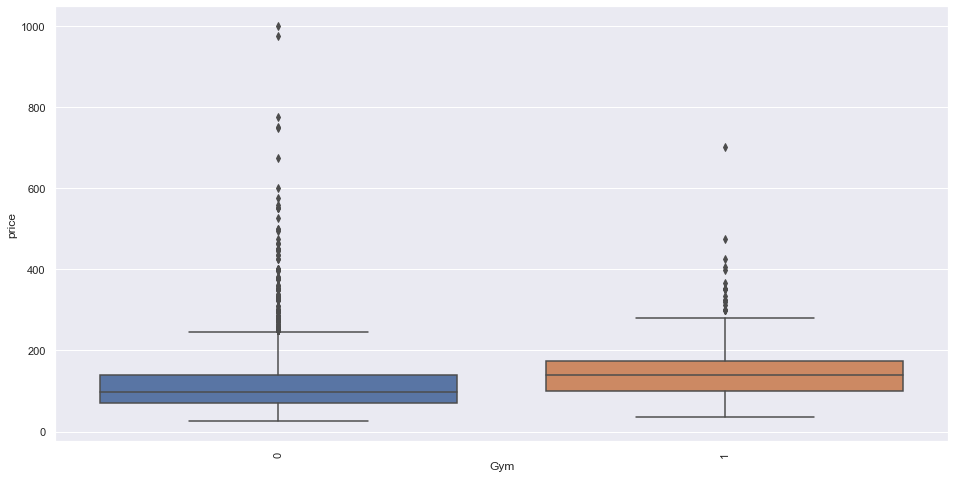

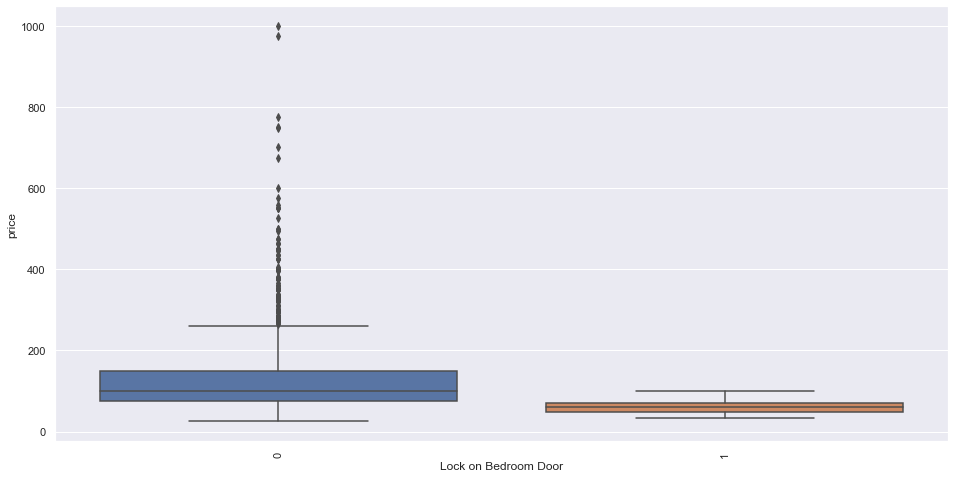

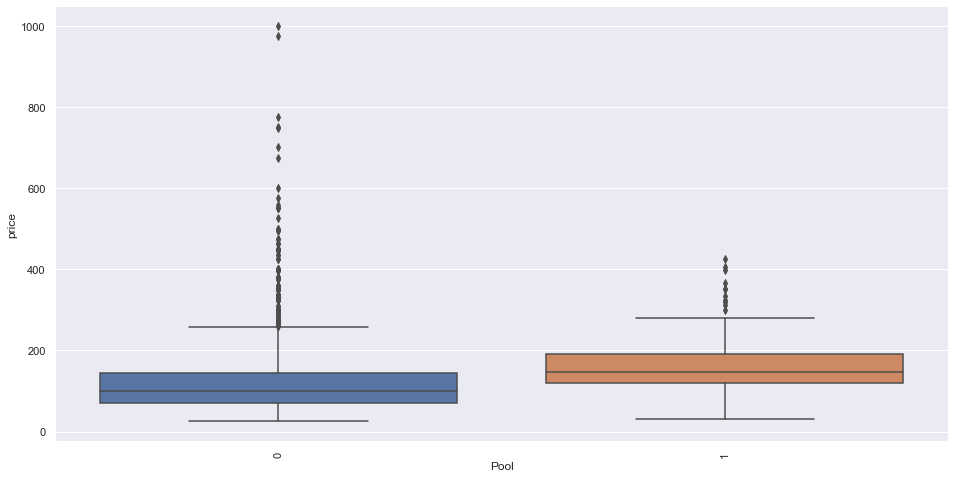

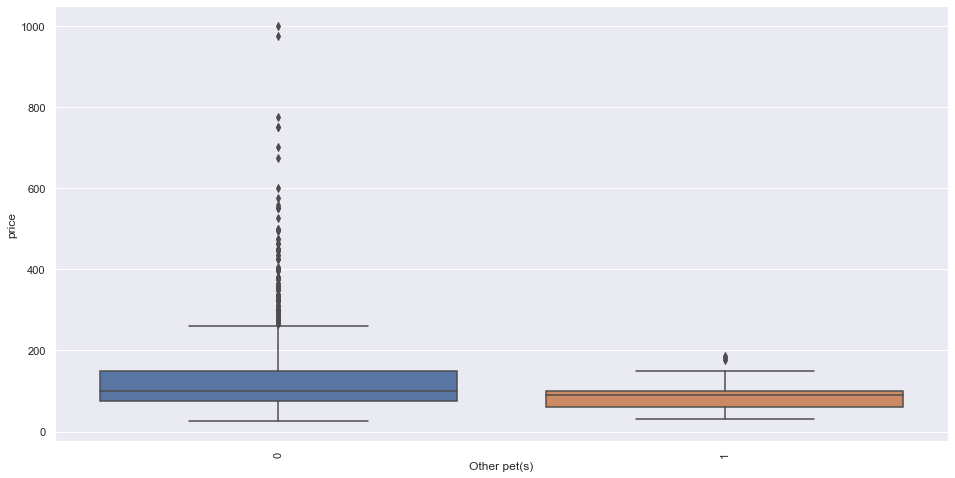

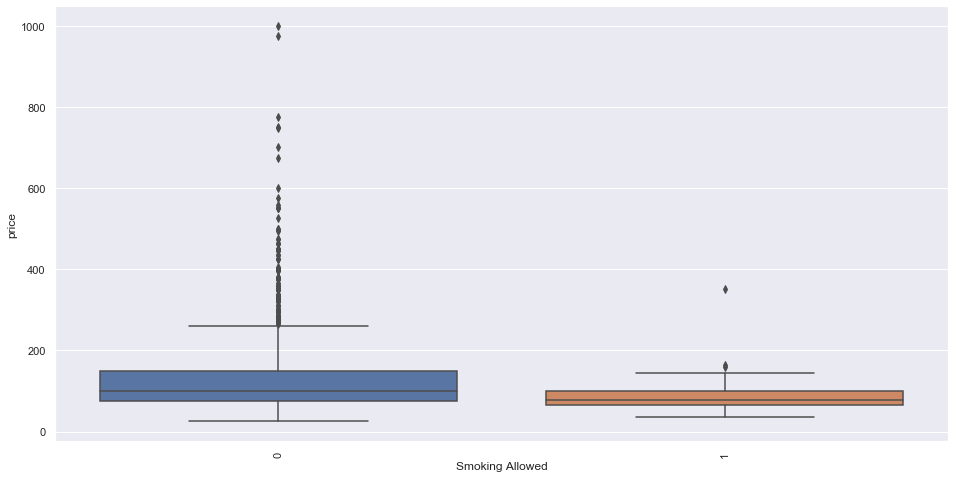

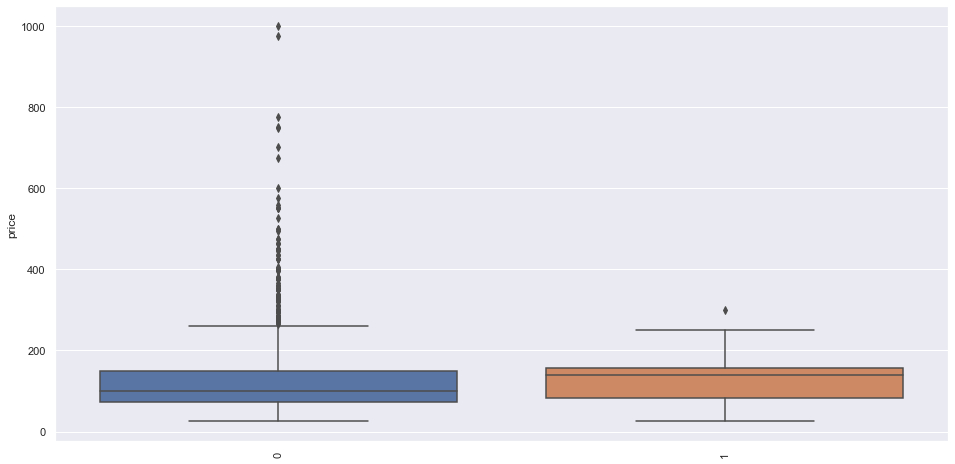

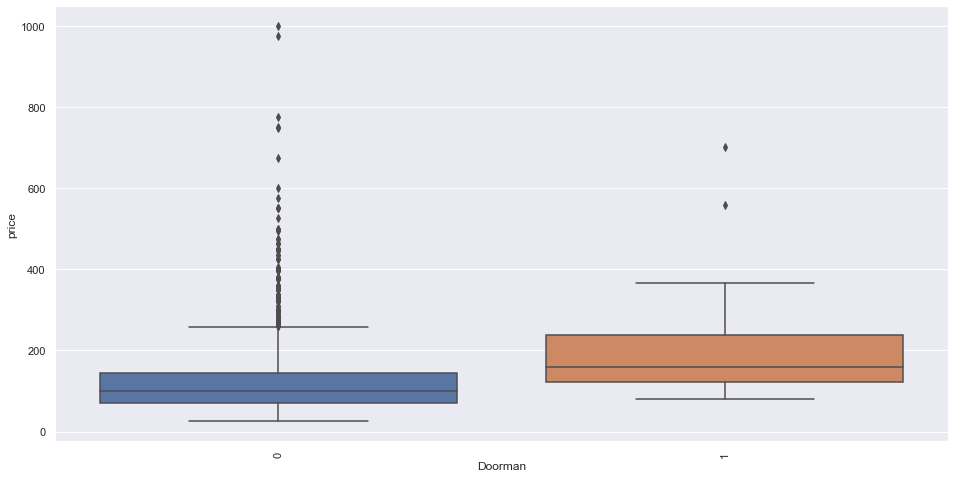

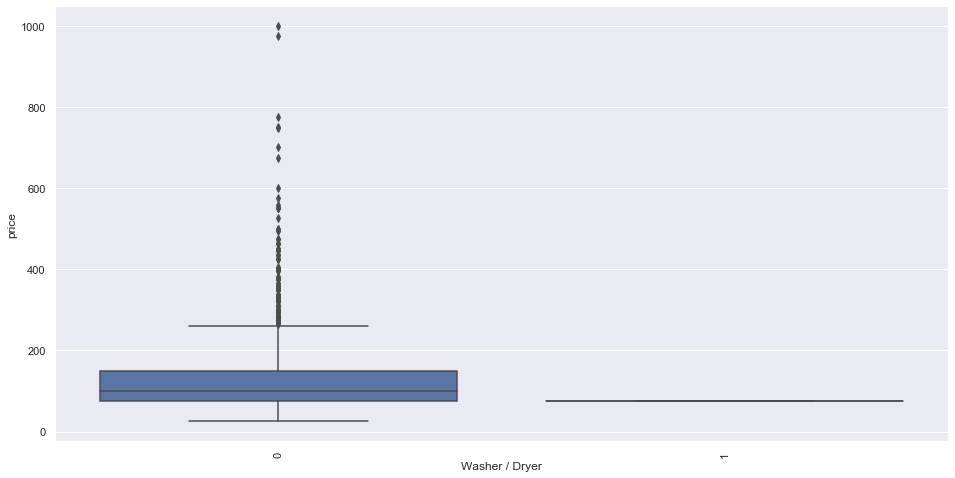

In [141]:
#making boxplots of each column in amenitieslist against price
for (column_name, column_data) in amenitieslist.iteritems():
  if(column_name!="price"):
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    sb.boxplot(x = column_name, y = 'price', data = amenitieslist)
    plt.xticks(rotation=90)
    

In [41]:
amenitieslist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 43 columns):
Internet                      2399 non-null int64
Kitchen                       2399 non-null int64
Cable TV                      2399 non-null int64
Air Conditioning              2399 non-null int64
TV                            2399 non-null int64
Heating                       2399 non-null int64
Washer                        2399 non-null int64
Dryer                         2399 non-null int64
Wireless Internet             2399 non-null int64
Family/Kid Friendly           2399 non-null int64
Smoke Detector                2399 non-null int64
Free Parking on Premises      2399 non-null int64
First Aid Kit                 2399 non-null int64
Fire Extinguisher             2399 non-null int64
Safety Card                   2399 non-null int64
Buzzer/Wireless Intercom      2399 non-null int64
Essentials                    2399 non-null int64
Carbon Monoxide Detector      2399 non-null

In [42]:
#stripping any additional spaces from the names in amenitieslist columns
amenitieslist=amenitieslist.rename(columns=lambda x: x.strip())
print(amenitieslist.columns.tolist())

['Internet', 'Kitchen', 'Cable TV', 'Air Conditioning', 'TV', 'Heating', 'Washer', 'Dryer', 'Wireless Internet', 'Family/Kid Friendly', 'Smoke Detector', 'Free Parking on Premises', 'First Aid Kit', 'Fire Extinguisher', 'Safety Card', 'Buzzer/Wireless Intercom', 'Essentials', 'Carbon Monoxide Detector', 'Pets Allowed', 'Cat(s)', 'Shampoo', 'Pets live on this property', 'Hot Tub', 'Indoor Fireplace', 'Dog(s)', 'Laptop Friendly Workspace', 'Hangers', '24-Hour Check-in', 'Iron', 'Hair Dryer', 'Suitable for Events', 'Breakfast', 'Wheelchair Accessible', 'Elevator in Building', 'Gym', 'Lock on Bedroom Door', 'Pool', 'Other pet(s)', 'Smoking Allowed', '', 'Doorman', 'Washer / Dryer', 'price']


(array([0, 1]), <a list of 2 Text xticklabel objects>)

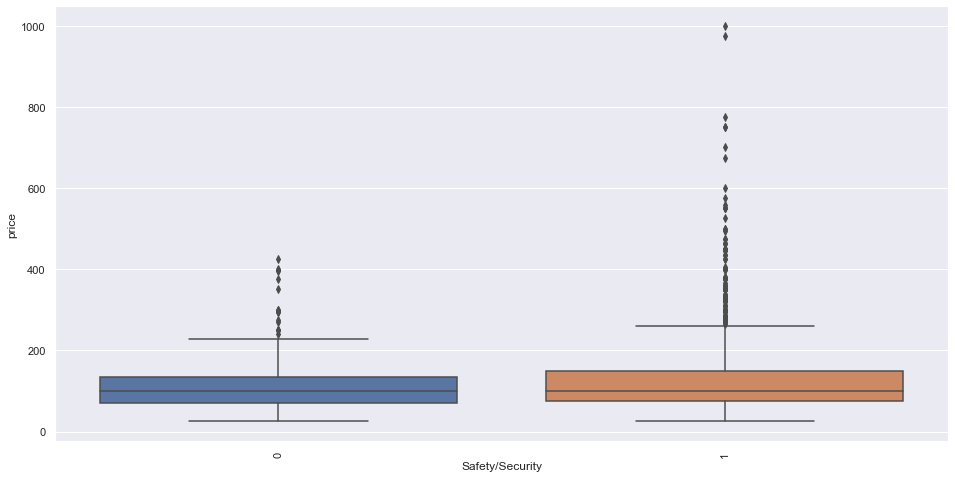

In [139]:
#creating a new feature called Safety/Security which involves amenities like Safety Card, First Aid Kit, Fire Extinguisher etc
list_for_safety=["Safety Card", "First Aid Kit","Fire Extinguisher","Smoke Detector","Carbon Monoxide Detector","Buzzer/Wireless Intercom","Lock on Bedroom Door","Doorman"]
safety=[]
for i in range(2399):
    safety.append(2)
for i in range(2399):
    for j in list_for_safety:
        if (amenitieslist[j].iloc[i]==1):
            safety[i]=1
        elif(safety[i]!=1):
            safety[i]=0
amenities_groups=pd.DataFrame()
amenities_groups["Safety/Security"]=pd.Series(safety)
amenities_groups["price"]=numerical_listings["price"]
amenities_groups
#plotting a boxplot of it vs price
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Safety/Security', y = 'price', data = amenities_groups)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

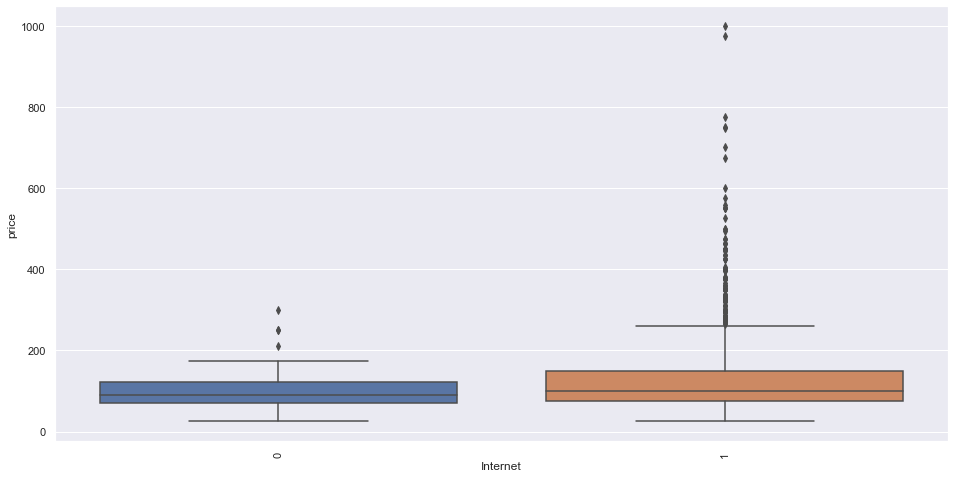

In [140]:
#creating a new feature called Internet which involves amenities like Internet and Wireless Internet
list_for_internet=["Internet","Wireless Internet"]
internet=[]
for i in range(2399):
    internet.append(0)
for i in range(2399):
    for j in list_for_internet:
        if (amenitieslist[j].iloc[i]==1):
            internet[i]=1
        elif(internet[i]!=1):
            internet[i]=0
amenities_groups["Internet"]=pd.Series(internet)
#plotting a boxplot of it vs price
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Internet', y = 'price', data = amenities_groups)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

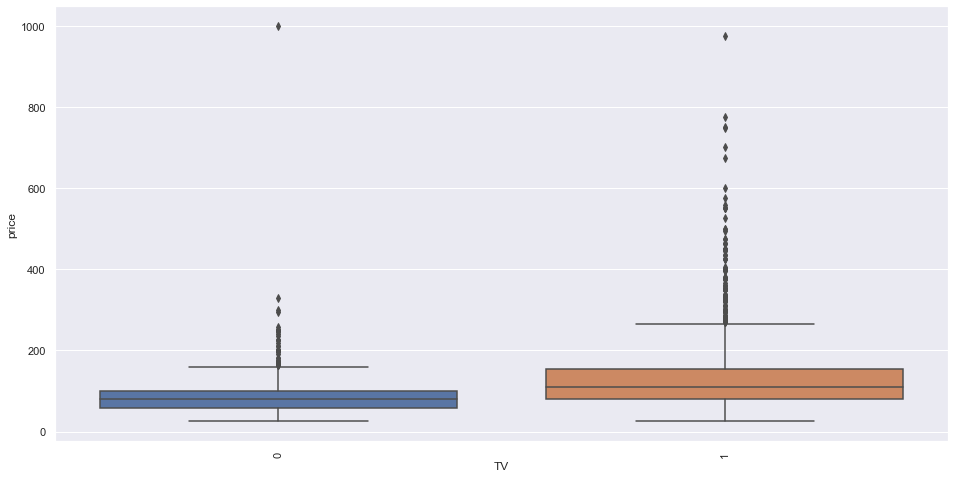

In [141]:
#creating a new feature called TV which includes amenities like TV or Cable TV
list_for_tv=["TV","Cable TV"]
TV=[]
for i in range(2399):
    TV.append(0)
for i in range(2399):
    for j in list_for_tv:
        if (amenitieslist[j].iloc[i]==1):
            TV[i]=1
        elif(TV[i]!=1):
            TV[i]=0
amenities_groups["TV"]=pd.Series(TV)
#plotting a boxplot of it vs price
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'TV', y = 'price', data = amenities_groups)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

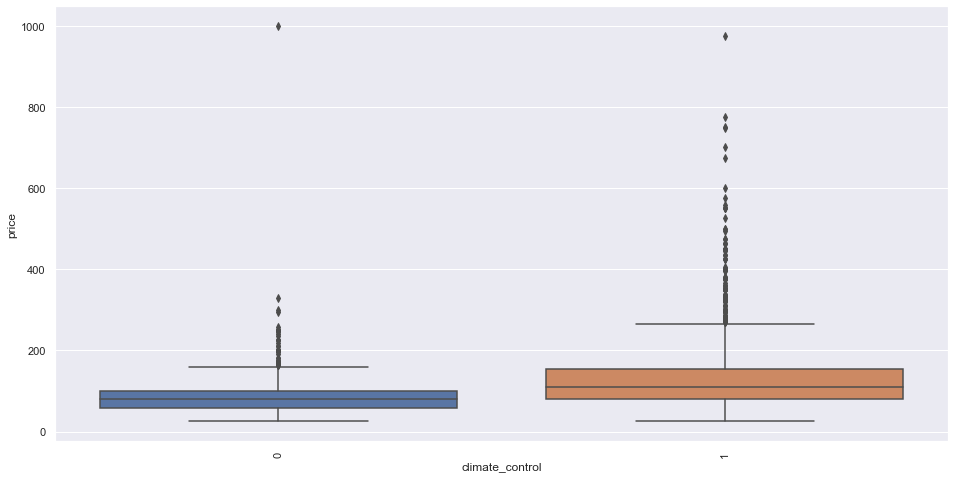

In [142]:
#creating a new feature called climate_control which has amenities like Air Conditioning, Heating and Indoor Fireplace
list_for_temp=["Air Conditioning","Heating", "Indoor Fireplace"]
temp=[]
for i in range(2399):
    temp.append(0)
for i in range(2399):
    for j in list_for_tv:
        if (amenitieslist[j].iloc[i]==1):
            temp[i]=1
        elif(temp[i]!=1):
            temp[i]=0
amenities_groups["climate_control"]=pd.Series(temp)
#making a boxplot of it vs price
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'climate_control', y = 'price', data = amenities_groups)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

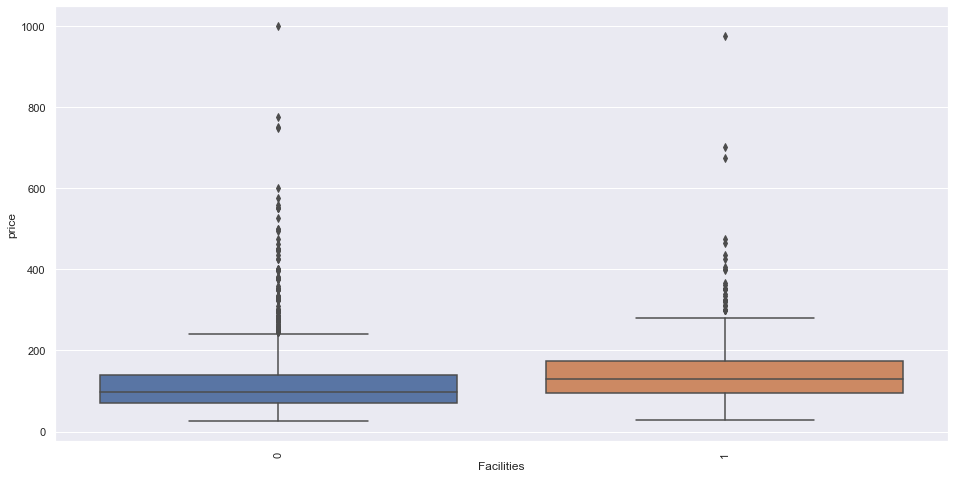

In [143]:
#creating a new feature called Facilities which includes amenities like Gym, Pool and Hot Tub
list_for_facilities=["Gym","Pool", "Hot Tub"]
temp=[]
for i in range(2399):
    temp.append(0)
for i in range(2399):
    for j in list_for_facilities:
        if (amenitieslist[j].iloc[i]==1):
            temp[i]=1
        elif(temp[i]!=1):
            temp[i]=0
amenities_groups["Facilities"]=pd.Series(temp)
#plotting boxplot of it against price
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Facilities', y = 'price', data = amenities_groups)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

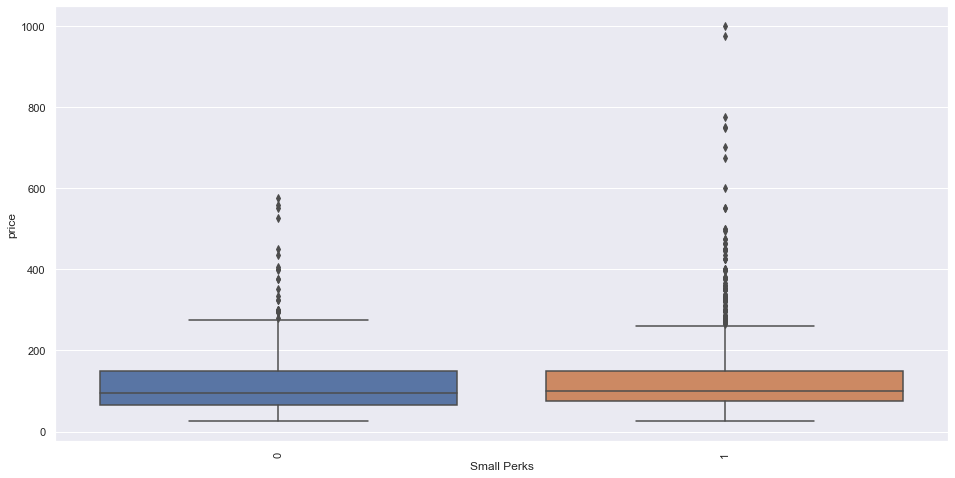

In [144]:
#creating a new feature called Small Perks including amenities like Hangers, Hair Dryer, Shampoo and Iron
list_for_perks=["Hangers","Hair Dryer", "Shampoo", "Iron"]
temp=[]
for i in range(2399):
    temp.append(0)
for i in range(2399):
    for j in list_for_perks:
        if (amenitieslist[j].iloc[i]==1):
            temp[i]=1
        elif(temp[i]!=1):
            temp[i]=0
amenities_groups["Small Perks"]=pd.Series(temp)
#making boxplot of it vs price
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Small Perks', y = 'price', data = amenities_groups)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

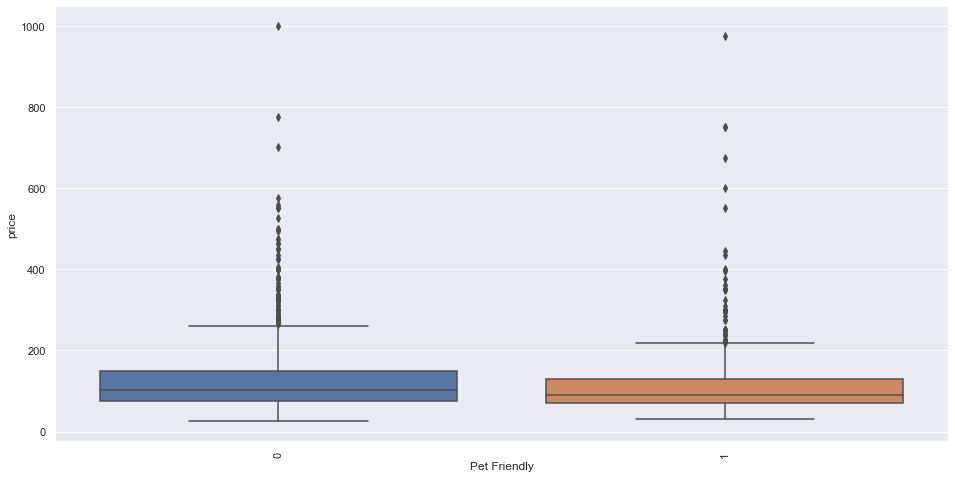

In [145]:
#making a new feature called Pet Friendly including amenities like Pets Allowed, Cat(s), Dog(s) and Other pet(s)
list_for_pets=["Cat(s)","Dog(s)", "Pets Allowed", "Other pet(s)"]
temp=[]
for i in range(2399):
    temp.append(0)
for i in range(2399):
    for j in list_for_pets:
        if (amenitieslist[j].iloc[i]==1):
            temp[i]=1
        elif(temp[i]!=1):
            temp[i]=0
amenities_groups["Pet Friendly"]=pd.Series(temp)
#making a boxplot of it vs price
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Pet Friendly', y = 'price', data = amenities_groups)
plt.xticks(rotation=90)

In [146]:
amenities_groups=amenities_groups.drop(columns=["price","Small Perks","Pet Friendly"])
amenities_groups
#ameniies_groups is the dataframe with the newly made features

Safety/Security  Internet  TV  climate_control  Facilities
0                   0         1   1                1           0
1                   1         1   1                1           0
2                   1         1   1                1           1
3                   1         1   0                0           0
4                   0         1   0                0           0
...               ...       ...  ..              ...         ...
2394                1         1   1                1           0
2395                1         1   1                1           0
2396                1         1   0                0           0
2397                1         1   1                1           0
2398                1         1   1                1           0

[2399 rows x 5 columns]

## Machine learning models of regression: Random Forest, Gradient Boosting, SGDRegressor and Bayesian Regression

In [147]:
predictors_from_numerical=pd.DataFrame(numerical_listings[["guests_included"]])
predictors_from_categorical=pd.DataFrame(data_to_predict)
X=pd.concat([predictors_from_numerical,predictors_from_categorical, amenities_groups], axis=1).reindex()

X.head()
#creating the dataframe with the predictor variables

guests_included  Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  \
0                2        1.0              0.0   0.0       0.0    0.0   
1                1        1.0              0.0   0.0       0.0    0.0   
2               10        0.0              0.0   0.0       0.0    0.0   
3                1        0.0              0.0   0.0       0.0    0.0   
4                1        0.0              0.0   0.0       0.0    1.0   

   Camper/RV  Chalet  Condominium  Dorm  ...   21   29   30   31  1000  \
0        0.0     0.0          0.0   0.0  ...  0.0  0.0  0.0  0.0   0.0   
1        0.0     0.0          0.0   0.0  ...  0.0  0.0  0.0  0.0   0.0   
2        0.0     0.0          0.0   0.0  ...  0.0  0.0  0.0  0.0   0.0   
3        0.0     0.0          0.0   0.0  ...  0.0  0.0  0.0  0.0   0.0   
4        0.0     0.0          0.0   0.0  ...  0.0  0.0  0.0  0.0   0.0   

   Safety/Security  Internet  TV  climate_control  Facilities  
0                0         1   1                1           0  
1                1         1   1                1           0  
2                1         1   1                1           1  
3                1         1   0                0           0  
4                0         1   0                0           0  

[5 rows x 167 columns]

In [148]:
y=pd.DataFrame(numerical_listings["price"])
y.head()
#the response dataframe 

price
0   85.0
1  150.0
2  975.0
3   80.0
4   60.0

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
#using train_test_split to get a random split into train and test set

In [150]:
#using the Random Forest Regression Model to predict prices
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
forest = RandomForestRegressor(n_estimators=700, 
                               criterion='mse', 
                                random_state=3,
                               n_jobs=-1)
forest.fit(X_train, y_train)#fitting the random forest
y_train_pred = forest.predict(X_train)#predicting the train set
y_test_pred = forest.predict(X_test)#predicting the test set
#printing MSE and explained variance for train and test
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

C:\Users\Aratrika\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


MSE train: 462.885, test: 1877.602
R^2 train: 0.936, test: 0.696


In [151]:
y_test

price
2280   45.0
2318   45.0
1212  249.0
799   229.0
68    120.0
...     ...
909   183.0
2393  120.0
1381   70.0
1555  135.0
1590   28.0

[600 rows x 1 columns]

In [152]:
y_test_pred

array([ 64.94438095,  64.42828231, 245.93415834, 155.41842366,
       113.96642857, 142.24767857, 142.41565306, 134.25560817,
       105.65879932,  97.75428571,  59.18006803, 121.19285714,
       122.97857143, 103.59285714,  58.56547619,  80.46547619,
        97.52687951, 106.29380952,  92.75895238,  87.3       ,
        55.47116443,  77.38919048, 124.23190476, 154.39938435,
       102.31095238,  66.67184524,  82.99095238,  93.95071429,
        83.10807143, 218.88809524, 154.60285714, 270.51166667,
        36.13630824, 231.97333333, 159.07602003, 111.24039456,
       117.3897619 ,  82.27281293,  95.67848299,  95.42714286,
        90.57542857, 109.70952381,  97.67571429, 127.32571429,
        94.56714286,  57.25809524,  77.95642857,  86.30892857,
       100.82904762, 234.37285714, 141.31171978, 136.00928571,
        62.2622449 , 111.47285714,  54.23142857, 103.04585714,
       149.89222552,  65.59133333,  94.97880952, 161.24357143,
        96.57      ,  96.80030952, 103.04678571, 137.08

In [153]:
y_train

price
2288   39.0
756   250.0
54    125.0
2137   95.0
1784  100.0
...     ...
1830  104.0
1148   85.0
1130   95.0
612    90.0
1383   99.0

[1799 rows x 1 columns]

In [154]:
y_train_pred

array([ 45.46190476, 229.81428571, 140.3272619 , ...,  92.93685714,
        82.59428571, 111.19142857])

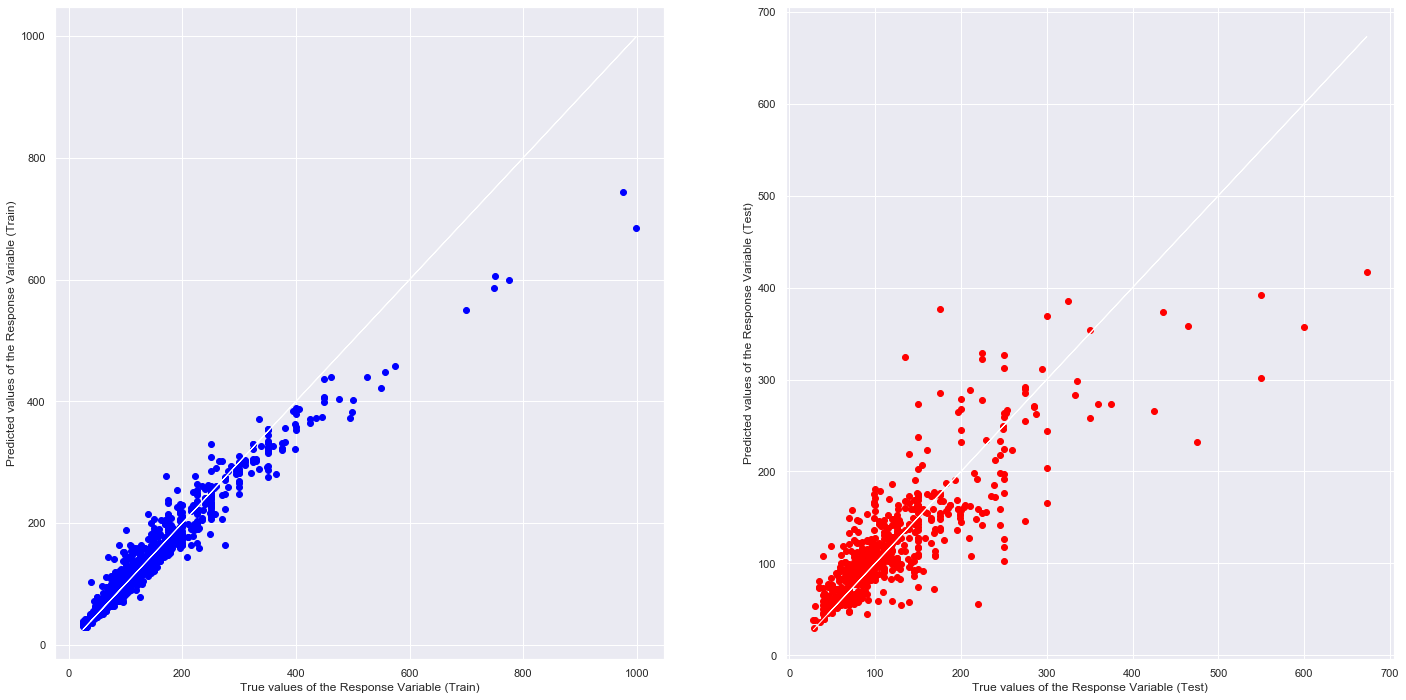

In [155]:
#graphical visualisation of actual and predicted values of price for train and test datasets
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "red")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [156]:
from sklearn.ensemble import GradientBoostingRegressor
boost=GradientBoostingRegressor(n_estimators=700, 
                               criterion='mse', 
                                random_state=3,
                               )
boost.fit(X_train, y_train)#fitting 
y_train_pred = boost.predict(X_train)#predicting the train set
y_test_pred = boost.predict(X_test)#predicting the test set
#printing MSE and explained variance for train and test
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

C:\Users\Aratrika\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE train: 882.955, test: 2236.468
R^2 train: 0.878, test: 0.638


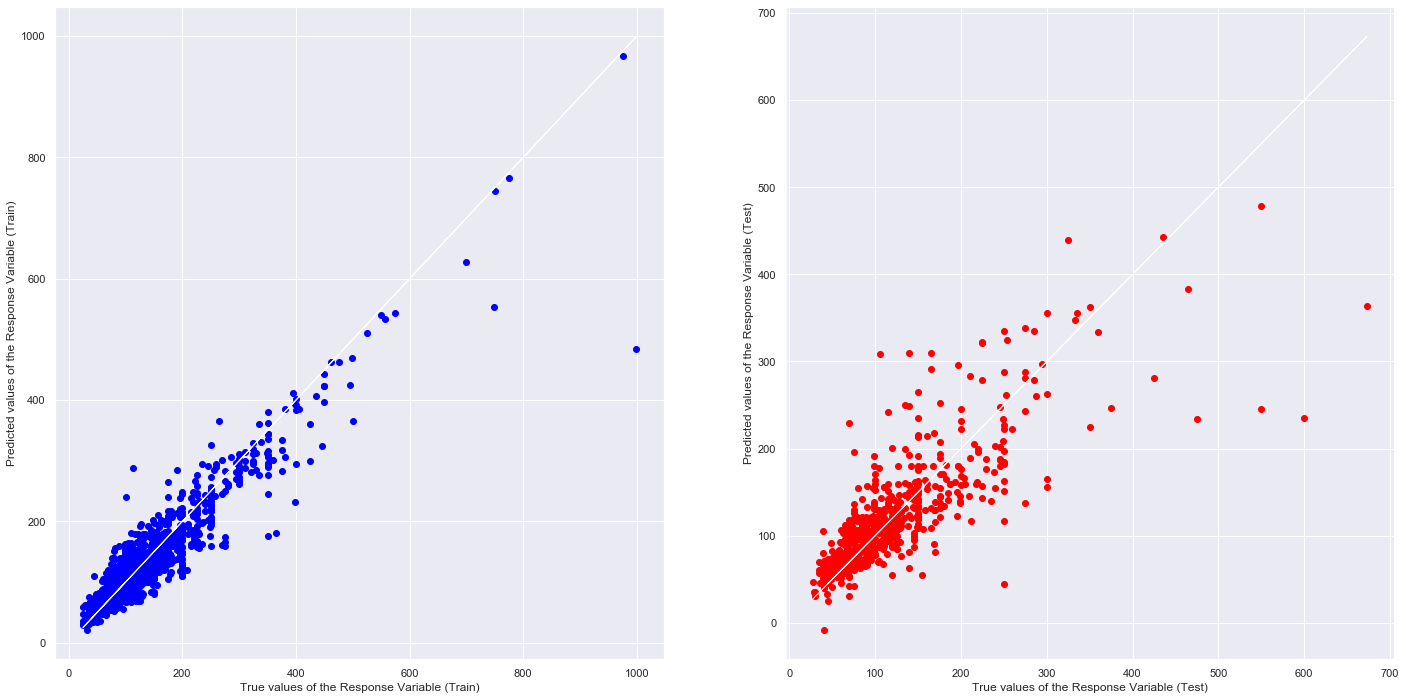

In [157]:
#graphical visualisation of actual and predicted values of price for train and test datasets
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "red")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [158]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(random_state=3,loss="squared_loss", max_iter=1000)
sgd.fit(X_train,y_train)
y_train_pred =sgd.predict(X_train)#predicting the train set
y_test_pred = sgd.predict(X_test)#predicting the test set
#printing MSE and explained variance for train and test
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

C:\Users\Aratrika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE train: 2661.842, test: 1966.607
R^2 train: 0.632, test: 0.682


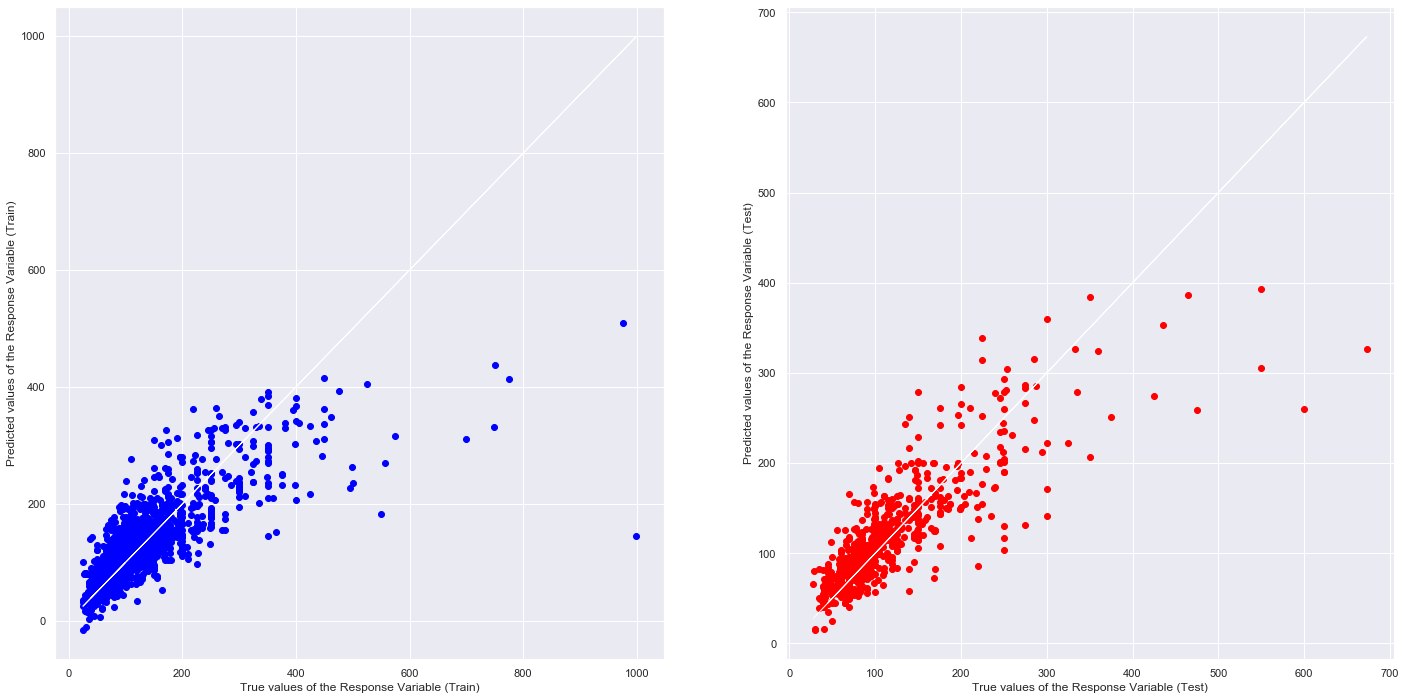

In [159]:
#graphical visualisation of actual and predicted values of price for train and test datasets
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "red")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [160]:
from sklearn import linear_model
reg= linear_model.BayesianRidge()
reg.fit(X_train, y_train)
y_train_pred=reg.predict(X_train)
y_test_pred=reg.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))   

MSE train: 2328.748, test: 1772.668
R^2 train: 0.678, test: 0.713


C:\Users\Aratrika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


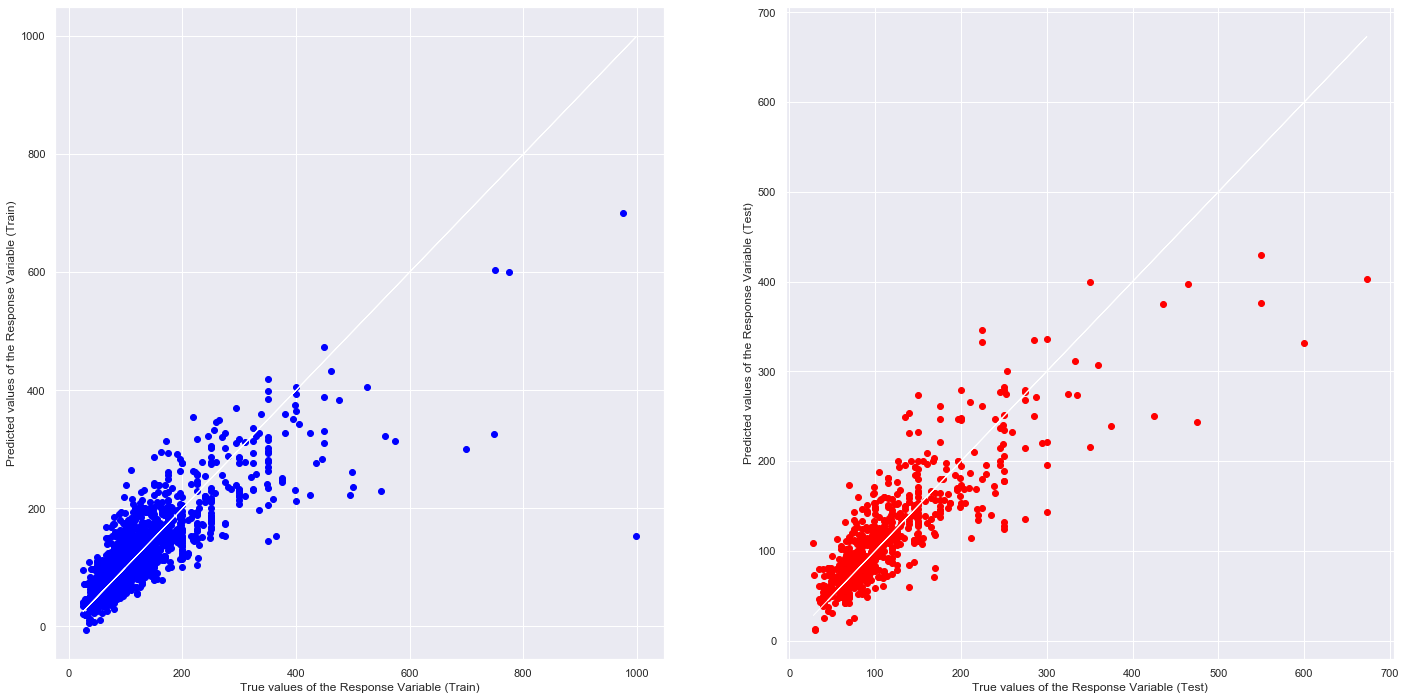

In [161]:
#graphical visualisation of actual and predicted values of price for train and test datasets
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "red")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## SubProblem: Predicting review_scores_rating based on the other 6 types of review scores using regression

In [78]:
#creating a dataframe with the reviews on accuracy, cleanliness, checkin, value, location, communication and overall rating
review_listings = pd.DataFrame(listings[["review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "review_scores_rating" ]])

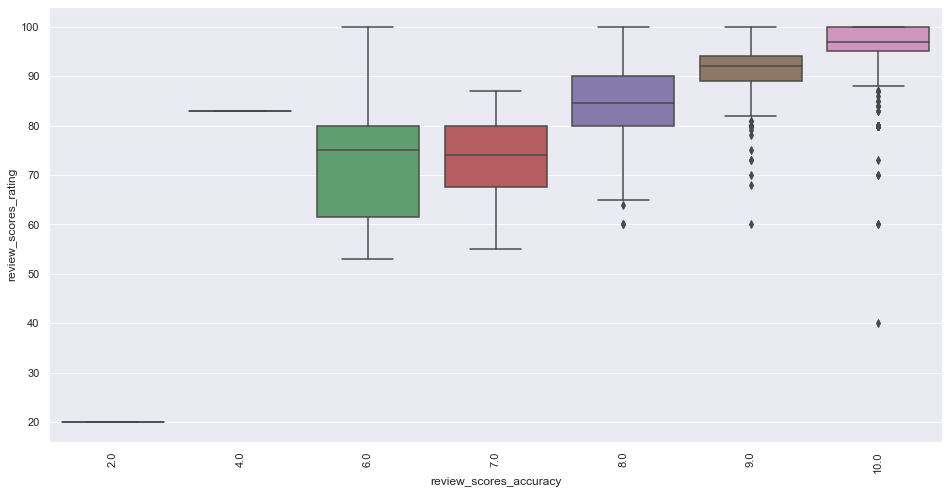

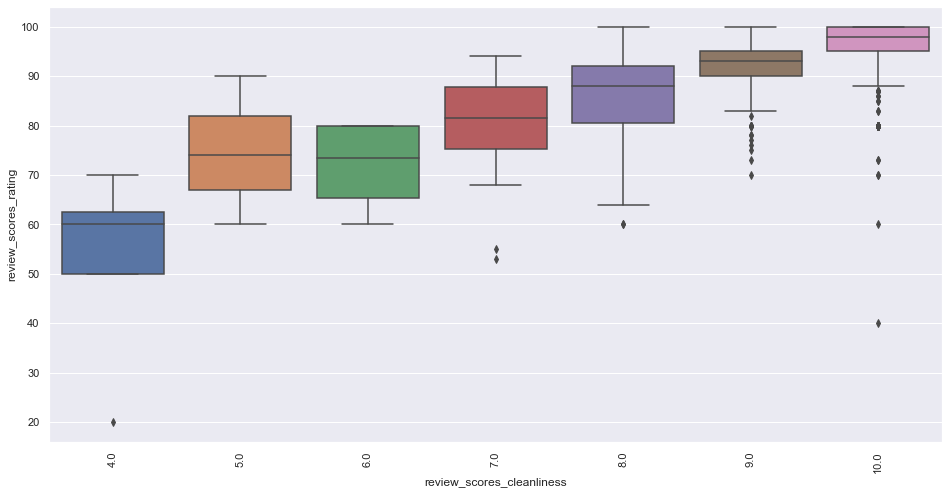

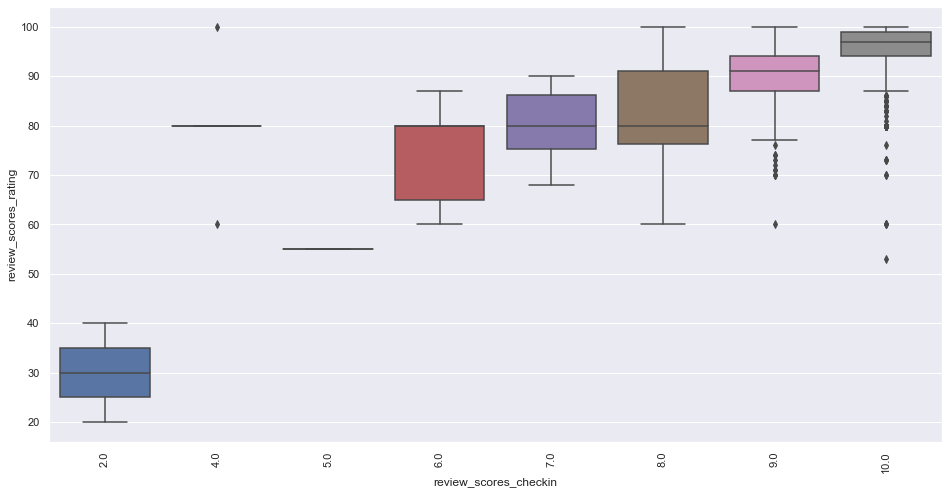

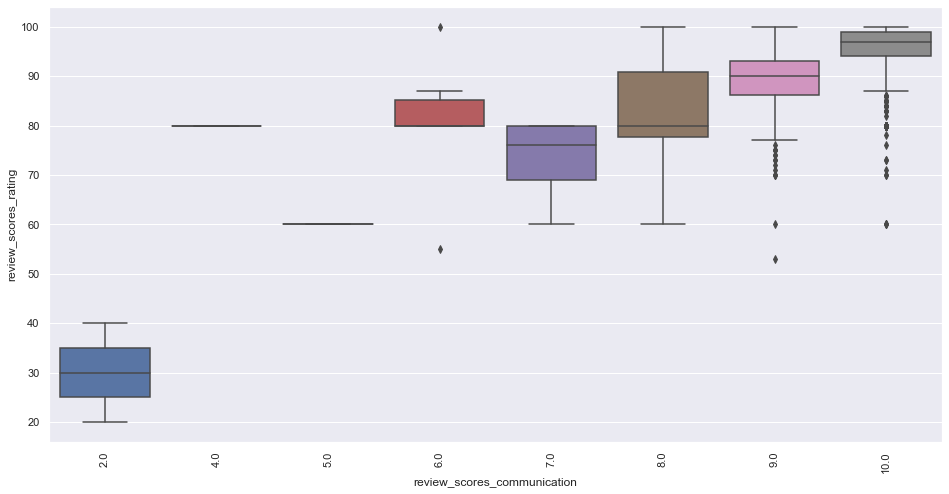

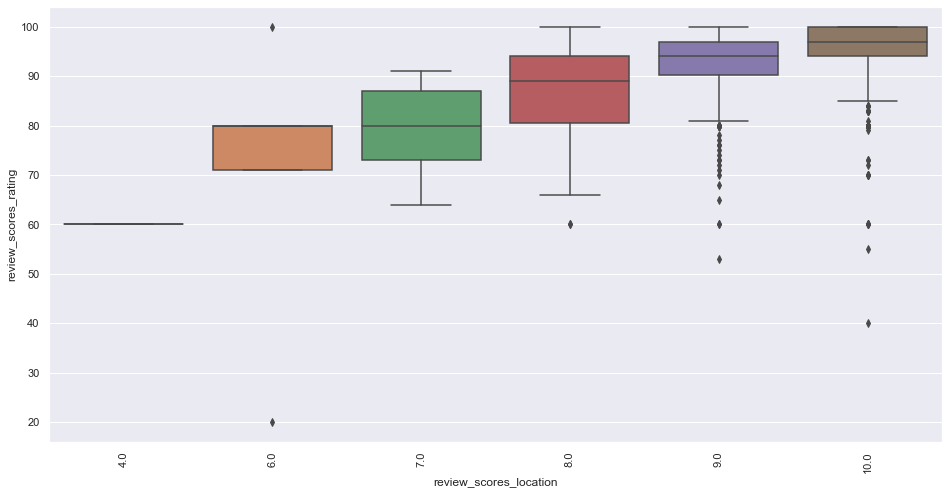

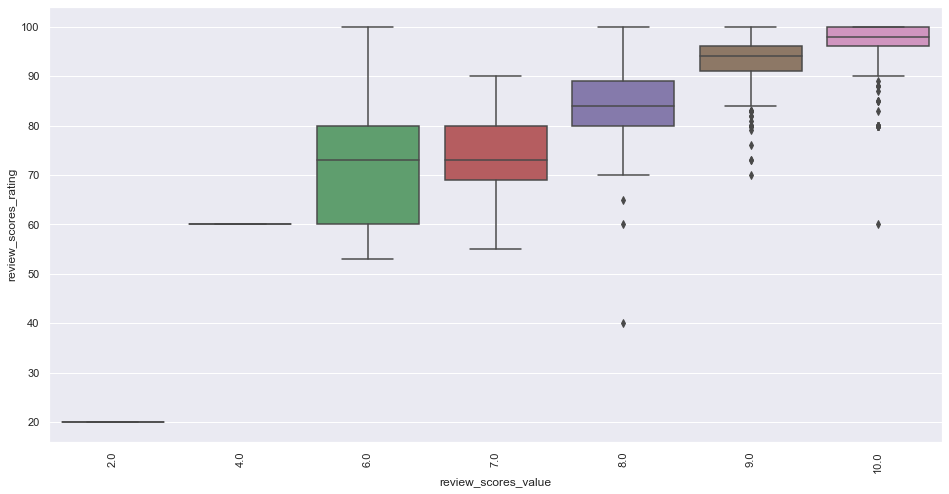

In [79]:
#printing boxplots of each vs review_scores_rating
for (column_name, column_data) in review_listings.iteritems():
  if(column_name!="review_scores_rating"):
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    sb.boxplot(x = column_name, y = 'review_scores_rating', data = review_listings)
    plt.xticks(rotation=90)

In [80]:
y=pd.DataFrame(review_listings["review_scores_rating"])
y.head()#response

review_scores_rating
0                  95.0
1                  96.0
2                  97.0
3                  99.0
4                  97.0

In [81]:
X=review_listings.drop(["review_scores_rating"], axis=1)#predictors
X.head()

review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                   10.0                      10.0                  10.0   
1                   10.0                      10.0                  10.0   
2                   10.0                      10.0                  10.0   
3                   10.0                      10.0                  10.0   
4                   10.0                      10.0                  10.0   

  review_scores_communication review_scores_location review_scores_value  
0                        10.0                    9.0                10.0  
1                        10.0                   10.0                10.0  
2                        10.0                   10.0                10.0  
3                        10.0                   10.0                10.0  
4                        10.0                    9.0                10.0

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
y_test.shape
#random split using train_test_split

(600, 1)

In [83]:
#using Random Forest Regression to predict review_scores_rating
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
forest = RandomForestRegressor(n_estimators=700, 
                               criterion='mse', 
                                random_state=3,
                               n_jobs=-1)
forest.fit(X_train, y_train)#fitting random forest
y_train_pred = forest.predict(X_train)#predicting for train data
y_test_pred = forest.predict(X_test)#predicting for test data
#printing the MSE and explained variance
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

C:\Users\Aratrika\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


MSE train: 8.699, test: 12.166
R^2 train: 0.784, test: 0.660


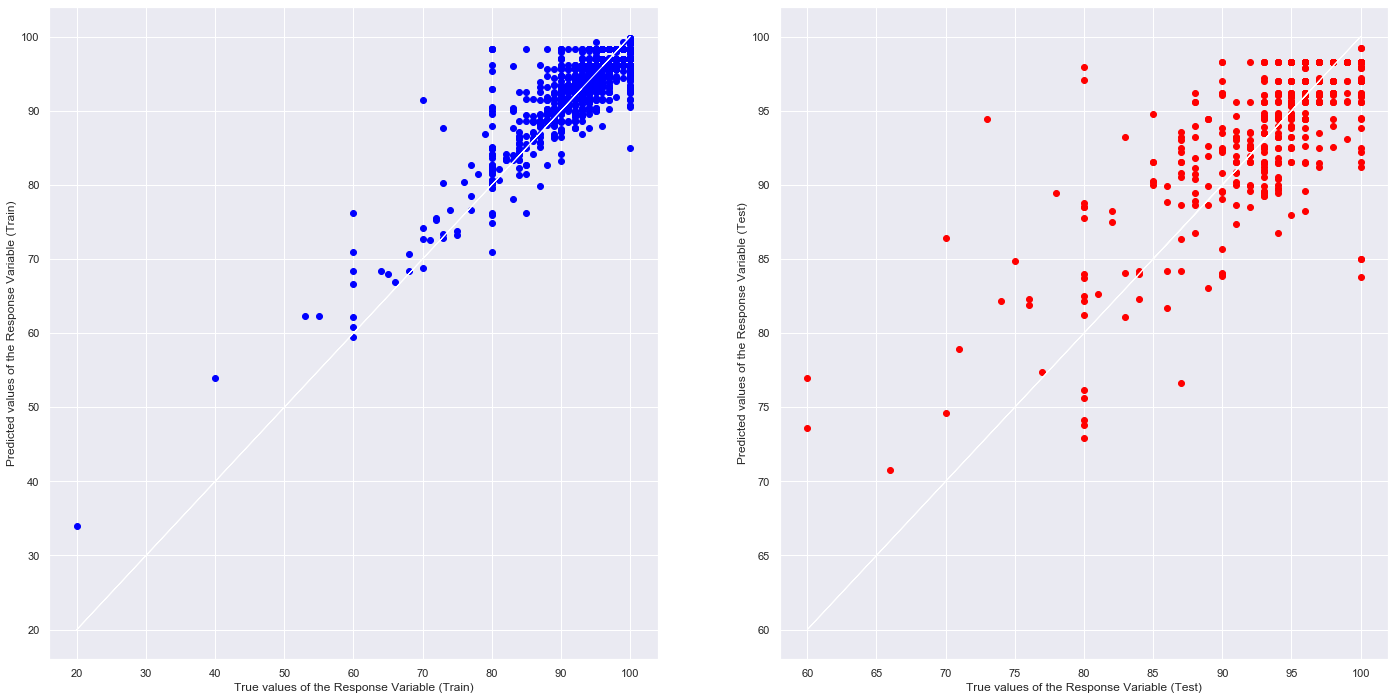

In [185]:
#graphical visualisation of actual vs predicted
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "red")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()